
# Customer Segmentation Report for Arvato Financial Services

In this project, we analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population in Germany. 

The aim is to find which individuals are most likely to convert into becoming customers for the company.

The demographic data which has been provided by Udacity partners at Bertelsmann Arvato Analytics is unlabelled. Thus we will use unsupervised learning techniques such as principal component analysis (PCA) and clustering to perform customer segmentation, thereby identifying the parts of the general population in Germany that best describes the core customer base of the company. This process will prepare the data for supervised learning technique.

We will then apply our findings from the unsupervised learning to a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company.


## OUTLINE
- Part 0: Get to Know the Data
 - 0.1: Import Libraries
 - 0.2: Load Data
 - 0.3: Exploratory Data Analysis
- Part 1: Data Preprocessing

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood.

#### Target:

- To use information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), 

- Then use our analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.


### 0.1. Import Libraries

In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#================================================================
import sklearn
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV


%matplotlib inline


### 0.2. Load data

- The .csv datasets in this project are semicolon (`;`) delimited, so an additional argument in the [`read_csv()`] call has been included to read in the data properly [(see link for more information on this.)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

- Our earlier analysis indicated that columns 18 & 19 had mixed data type, thus we have specified a string data type for the columns below when loading the data. 

- For the purpose of backup, we will create copies of the demographics datasets.

In [2]:
# load in the data, specifying datatype for columns 18 & 19 in both datasets
azdias = pd.read_csv('Udacity_AZDIAS_052018.csv', sep=';',dtype={18:'str',19:'str'})
customers = pd.read_csv('Udacity_CUSTOMERS_052018.csv', sep=';',dtype={18:'str',19:'str'})

In [3]:
#create copies for backup
df_azdias = azdias.copy()
df_customers = customers.copy()

### 0.3. Exploratory Data Analysis
Let us now have a look at the structure of the data 

#### a) General population (AZDIAS) data

In [4]:
print(df_azdias.shape)
df_azdias.head() #print few lines of dataset

(891221, 366)


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [5]:
# a look at summary statistics
df_azdias.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,8.912210e+05,891221.000000,817722.000000,817722.000000,81058.000000,29499.000000,6170.000000,1205.000000,628274.000000,798073.000000,...,770025.000000,815304.000000,815304.000000,815304.000000,783619.000000,817722.000000,798073.000000,891221.000000,891221.000000,891221.000000
mean,6.372630e+05,-0.358435,4.421928,10.864126,11.745392,13.402658,14.476013,15.089627,13.700717,8.287263,...,2.417322,6.001214,7.532130,5.945972,3.933406,7.908791,4.052836,3.362438,1.522098,2.777398
std,2.572735e+05,1.198724,3.638805,7.639683,4.097660,3.243300,2.712427,2.452932,5.079849,15.628087,...,1.166572,2.856091,3.247789,2.771464,1.964701,1.923137,1.949539,1.352704,0.499512,1.068775
min,1.916530e+05,-1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,7.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,4.144580e+05,-1.000000,1.000000,0.000000,8.000000,11.000000,13.000000,14.000000,11.000000,1.000000,...,2.000000,3.000000,5.000000,4.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,6.372630e+05,-1.000000,3.000000,13.000000,12.000000,14.000000,15.000000,15.000000,14.000000,4.000000,...,2.000000,6.000000,8.000000,6.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,8.600680e+05,-1.000000,9.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,9.000000,...,3.000000,9.000000,10.000000,8.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,1.082873e+06,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,595.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


#### Customer's dataset

In [6]:
print(df_customers.shape)
df_customers.head()

(191652, 369)


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [7]:
df_customers.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,191652.000000,191652.000000,145056.000000,145056.000000,11766.000000,5100.000000,1275.000000,236.000000,139810.000000,141725.000000,...,143781.000000,143781.000000,143781.000000,137910.000000,145056.000000,141725.000000,191652.000000,191652.000000,191652.000000,191652.000000
mean,95826.500000,0.344359,1.747525,11.352009,12.337243,13.672353,14.647059,15.377119,10.331579,4.965863,...,4.374417,4.564769,3.168868,4.152716,8.646371,3.723133,2.576806,0.090247,1.376432,3.060907
std,55325.311233,1.391672,1.966334,6.275026,4.006050,3.243335,2.753787,2.307653,4.134828,14.309694,...,2.924355,2.887035,2.233516,1.974375,1.154001,2.095540,1.168486,0.286536,0.484492,1.086254
min,1.000000,-1.000000,1.000000,0.000000,2.000000,2.000000,5.000000,8.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,47913.750000,-1.000000,1.000000,8.000000,9.000000,11.000000,13.000000,14.000000,9.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,9.000000,2.000000,1.000000,0.000000,1.000000,3.000000
50%,95826.500000,0.000000,1.000000,11.000000,13.000000,14.000000,15.000000,16.000000,10.000000,1.000000,...,4.000000,4.000000,3.000000,5.000000,9.000000,3.000000,3.000000,0.000000,1.000000,3.000000
75%,143739.250000,2.000000,1.000000,16.000000,16.000000,16.000000,17.000000,17.000000,13.000000,4.000000,...,7.000000,7.000000,4.000000,6.000000,9.000000,5.000000,3.000000,0.000000,2.000000,4.000000
max,191652.000000,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,523.000000,...,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,1.000000,2.000000,9.000000


#### Comment

- The datasets have missing values and will definitely need to be cleaned. 

- df_azdias dataframe has 366 columns while df_customers has 369 columns. So there are 3 more columns in the customer dataset. Given that part of our goal in this project is to compare population of customers in mail-order company with the general population in Germany. Thus it is neccessary that we have equal features in the datasets describing each group. Let's find out what these columns are, we will drop them from the customer's dataset during the data preprocessing stage.

- There are definitely outiers in the dataset which we will have to detect and remove. For example in **ANZ_HAUSHALTE_AKTIV**, the majority of data centers around 8.32 with at least one outlier of 595. 

#### Description of Attributes

Something we also observe in our demographic datasets is that features are encoded and to understand the data values, we will look over the informational spreadsheets which are loaded below as `attributes_values` and `attributes_info`. 

Again our goal is to make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. 

In [8]:
#load excel file into pandas dataframe
attributes_values = pd.read_excel('DIAS Attributes - Values 2017.xlsx', header=1)
attributes_info = pd.read_excel('DIAS Information Levels - Attributes 2017.xlsx',header=1)   

print("There are {} unique attributes in attributes_values dataset".format(attributes_values['Attribute'].nunique()))

There are 314 unique attributes in attributes_values dataset


In [9]:
attributes_val = attributes_values.copy()
attributes_in = attributes_info.copy()

In [10]:
#we had earlier noted irrelevant colimns so we are dropping them here
attributes_val.drop(['Unnamed: 0'], axis=1, inplace=True)
attributes_in.drop(['Unnamed: 0'], axis=1, inplace=True)

### 0.3.1. Explore datasets to find common columns (Attributes)

#### Azdias vs Customer

In [11]:
# compare columns in azdias and customers datasets
col_diff = [col for col in customers.columns if col not in azdias.columns]
print("Additional features in Customers data not in Azdias data:\n")
print(col_diff)

Additional features in Customers data not in Azdias data:

['PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE']


#### Azdias vs Customers vs Attributes_values

In [12]:
attributes_col  = attributes_values['Attribute'].unique().tolist()
azdias_col = list(df_azdias.columns)
customers_col = list(df_customers.columns)

common_col = (set(attributes_col) & set(azdias_col) & set(customers_col))
print("There are {} number of columns common to the three datasets".format(len(common_col)))

There are 272 number of columns common to the three datasets


#### Azdias vs Attributes_values

Given that there are 272 features common to the three datasets, this implies that there are 94 features in azdias datasets that are not in attributes_values. Let us explore them

In [13]:
col_diff_az = [col for col in df_azdias.columns if col not in attributes_values['Attribute'].unique()]
print("There are {} attributes in azdias dataset which are not in attributes_values: \n".format(len(col_diff_az)))
print(col_diff_az)

There are 94 attributes in azdias dataset which are not in attributes_values: 

['LNR', 'AKT_DAT_KL', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN', 'ANZ_KINDER', 'ANZ_STATISTISCHE_HAUSHALTE', 'ARBEIT', 'CAMEO_INTL_2015', 'CJT_KATALOGNUTZER', 'CJT_TYP_1', 'CJT_TYP_2', 'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6', 'D19_BANKEN_DIREKT', 'D19_BANKEN_GROSS', 'D19_BANKEN_LOKAL', 'D19_BANKEN_REST', 'D19_BEKLEIDUNG_GEH', 'D19_BEKLEIDUNG_REST', 'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD', 'D19_DIGIT_SERV', 'D19_DROGERIEARTIKEL', 'D19_ENERGIE', 'D19_FREIZEIT', 'D19_GARTEN', 'D19_HANDWERK', 'D19_HAUS_DEKO', 'D19_KINDERARTIKEL', 'D19_KONSUMTYP_MAX', 'D19_KOSMETIK', 'D19_LEBENSMITTEL', 'D19_LETZTER_KAUF_BRANCHE', 'D19_LOTTO', 'D19_NAHRUNGSERGAENZUNG', 'D19_RATGEBER', 'D19_REISEN', 'D19_SAMMELARTIKEL', 'D19_SCHUHE', 'D19_SONSTIGE', 'D19_SOZIALES', 'D19_TECHNIK', 'D19_TELKO_MOBILE', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_TELKO_REST', 'D19_TIERARTIKEL', 'D19_VERS

In [14]:
col_diff_att = [col for col in attributes_values['Attribute'].unique() if col not in df_azdias.columns]
print("There are {} attributes in attributes_values which are not in azdias dataset: \n".format(len(col_diff_att)))
print(col_diff_att)

There are 43 attributes in attributes_values which are not in azdias dataset: 

[nan, 'BIP_FLAG', 'CAMEO_DEUINTL_2015', 'D19_BANKEN_DIREKT_RZ', 'D19_BANKEN_GROSS_RZ', 'D19_BANKEN_LOKAL_RZ', 'D19_BANKEN_REST_RZ', 'D19_BEKLEIDUNG_GEH_RZ', 'D19_BEKLEIDUNG_REST_RZ', 'D19_BILDUNG_RZ', 'D19_BIO_OEKO_RZ', 'D19_BUCH_RZ', 'D19_DIGIT_SERV_RZ', 'D19_DROGERIEARTIKEL_RZ', 'D19_ENERGIE_RZ', 'D19_FREIZEIT_RZ', 'D19_GARTEN_RZ', 'D19_HANDWERK_RZ', 'D19_HAUS_DEKO_RZ', 'D19_KINDERARTIKEL_RZ', 'D19_KK_KUNDENTYP', 'D19_KOSMETIK_RZ', 'D19_LEBENSMITTEL_RZ', 'D19_LOTTO_RZ', 'D19_NAHRUNGSERGAENZUNG_RZ', 'D19_RATGEBER_RZ', 'D19_REISEN_RZ', 'D19_SAMMELARTIKEL_RZ', 'D19_SCHUHE_RZ', 'D19_SONSTIGE_RZ', 'D19_TECHNIK_RZ', 'D19_TELKO_MOBILE_RZ', 'D19_TELKO_REST_RZ', 'D19_TIERARTIKEL_RZ', 'D19_VERSAND_REST_RZ', 'D19_VERSICHERUNGEN_RZ', 'D19_VOLLSORTIMENT_RZ', 'D19_WEIN_FEINKOST_RZ', 'GEOSCORE_KLS7', 'HAUSHALTSSTRUKTUR', 'KBA13_CCM_1400_2500', 'SOHO_FLAG', 'WACHSTUMSGEBIET_NB']


#### Comment

Since we will have to give interpretation of our results later in this notebook, it makes sence to work with only attributes in the demographic data that have descriptions. For this reason, we will drop features in demographic dataset that do not have descriptions in attributes_values dataset. 

Before then, we need to pay particular attention to the features we wish to drop:

- Some features in azdias/customers datasets are encoded differently in attributes_values. Such as attributes starting with D19...for example 'D19_BANKEN_DIREKT_RZ' in attributes_values is encoded as 'D19_BANKEN_DIREKT' inazdias/custmers dataset. 

- Also CAMEO_INTL_2015 and 'KK_KUNDENTYP'in azdias are encoded as CAMEO_DEUINTL_2015 and 'D19_KK_KUNDENTYP' respectively in attributes_values. 

There are some attributes in azdias which are not in attributes_values that we will likely drop. These are

'ALTERSKATEGORIE_FEIN','ALTER_KIND1','ALTER_KIND2','ALTER_KIND3','ALTER_KIND4','ARBEIT',
'CJT_KATALOGNUTZER','CJT_TYP_1','CJT_TYP_2','CJT_TYP_3','CJT_TYP_4','CJT_TYP_5','CJT_TYP_6',
'EXTSEL992','FIRMENDICHTE','GEMEINDETYP','KBA13_ANTG1','KBA13_ANTG2','KBA13_ANTG3','KBA13_ANTG4','KBA13_BAUMAX','KBA13_GBZ','KBA13_HHZ','KOMBIALTER', 'KONSUMZELLE', 'MOBI_RASTER', 'RT_KEIN_ANREIZ', 'RT_SCHNAEPPCHEN', 'RT_UEBERGROESSE', 'STRUKTURTYP', 'UMFELD_ALT', 'UMFELD_JUNG', 'UNGLEICHENN_FLAG', 'VERDICHTUNGSRAUM', 'VHA', 'VHN', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11'
        

## 0.4. Data Preprocessing: Part 1

In the next steps, we will be preprocessing df_azdias dataset alone, then we will create a pre-processing function wich would be applied on customer's dataset and the mailout datasets.

#### Shape of general population data before preprocessing

In [15]:
print("Shape of azdias dataset before preprocessing is {}".format(df_azdias.shape))

Shape of azdias dataset before preprocessing is (891221, 366)


### 0.4.1. Unknown columns 
In this section, we will drop columns with no description as we seen earlier in our EDA process

In [16]:
cols_with_no_desc = ['ALTERSKATEGORIE_FEIN','ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 
                     'ALTER_KIND4', 'ARBEIT','CJT_KATALOGNUTZER','CJT_TYP_1', 'CJT_TYP_2',
                     'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6','EXTSEL992', 
                     'FIRMENDICHTE', 'GEMEINDETYP', 'KBA13_ANTG1','KBA13_ANTG2', 'KBA13_ANTG3', 'KBA13_ANTG4', 'KBA13_BAUMAX',
        'KBA13_GBZ','KBA13_HHZ','KOMBIALTER', 'KONSUMZELLE', 'MOBI_RASTER', 'RT_KEIN_ANREIZ', 
        'RT_SCHNAEPPCHEN', 'RT_UEBERGROESSE', 'STRUKTURTYP', 'UMFELD_ALT', 'UMFELD_JUNG',
        'UNGLEICHENN_FLAG', 'VERDICHTUNGSRAUM', 'VHA', 'VHN', 'VK_DHT4A', 'VK_DISTANZ', 
        'VK_ZG11']



df_azdias.drop(columns=cols_with_no_desc,inplace=True)

df_azdias.shape

(891221, 327)

### 0.4.2. Missing values

There are two targets in this section

- manually encode missing values
- assess and remove missing value outliers both along columns and accross rows in dataset.

#### a) Manually encode missing/unknown Values

Before assessment, let's see how many missing values in the azdias dataset using the code below. 

The first .sum() will sum across all columns and the second .sum() is used to aggregate all NAs

In [17]:
#missing nans before assessment
df_azdias.isnull().sum().sum()

26933346

In [17]:
#attributes_values["Attribute"] = attributes_values["Attribute"].ffill()
#attributes_info["Attribute"] = attributes_info["Attribute"].ffill()

Let us create a dataframe of all observations with unknown values. These can be identified from the attributes_values dataset

In [18]:
missing_or_unknown = attributes_val[(attributes_val['Meaning'].str.contains("unknown") | attributes_val['Meaning'].str.contains("no "))]

#Attributes in attributes_values and in azdias
missing_or_unknown_dias = missing_or_unknown[missing_or_unknown['Attribute'].isin(azdias.columns)]

print(missing_or_unknown_dias.shape[0])
missing_or_unknown_dias.head(10)

236


,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
11,ALTER_HH,main age within the household,0,unknown / no main age detectable
33,ANREDE_KZ,gender,"-1, 0",unknown
40,BALLRAUM,distance to next urban centre,-1,unknown
51,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,-1,unknown
131,CJT_GESAMTTYP,customer journey typology,0,unknown
138,D19_BANKEN_ANZ_12,transaction activity BANKS in the last 12 months,0,no transactions known
145,D19_BANKEN_ANZ_24,transaction activity BANKS in the last 24 months,0,no transactions known
206,D19_BANKEN_ONLINE_QUOTE_12,amount of online transactions within all trans...,0,no Online-transactions within the last 12 months


The function below puts all unknown values of attributes in a list

In [19]:
def get_unknown_repr(df):
    """Returns the representation (a list) of unknown values in a feature of df
    INPUT:
        df: dataframe of all attributes with unknown/missing codes
    OUTPUT:
        a dataframe with two columns, all attributes and the corresponding list of missing codes.
    """
    unknown_val = []
    for attrib in df['Attribute'].unique():
        val = df[df["Attribute"] == attrib]["Value"].astype(str).str.cat(sep=",").split(',')
        unknown_val.append(val)
    
    attributes_unknown_or_missing = pd.concat([pd.Series(df['Attribute'].unique()), pd.Series(unknown_val)], axis=1)

    attributes_unknown_or_missing.columns = ['attribute', 'missing_or_unknown']
 
    return attributes_unknown_or_missing

unknown_df = get_unknown_repr(missing_or_unknown_dias)

In [20]:
unknown_df.tail(10)

,attribute,missing_or_unknown
226,SEMIO_SOZ,"[-1, 9]"
227,SEMIO_TRADV,"[-1, 9]"
228,SEMIO_VERT,"[-1, 9]"
229,SHOPPER_TYP,[-1]
230,TITEL_KZ,"[-1, 0]"
231,VERS_TYP,[-1]
232,WOHNDAUER_2008,"[-1, 0]"
233,WOHNLAGE,[-1]
234,W_KEIT_KIND_HH,"[-1, 0]"
235,ZABEOTYP,"[-1, 9]"


Finally the function below does the mapping of unknown/missing values to np.nan

In [21]:
def missing_to_nan(df):
    """A function to replace all unknown/missing values in dataframe df with np.nan
    
    INPUT: 
        df - Pandas dataframe
    OUTPUT:
        df - with all unknown values replaced with np.nan
    """
    unknown_df = get_unknown_repr(missing_or_unknown_dias)
    for item in range (len (unknown_df['missing_or_unknown'])): 
        column_name = unknown_df.iloc[item]['attribute'] #saving column name
        for i in range(0, len(unknown_df['missing_or_unknown'][item])):
            unknown_df['missing_or_unknown'][item][i] = int(unknown_df['missing_or_unknown'][item][i])
        df[column_name].replace (to_replace = unknown_df['missing_or_unknown'][item], value = np.NaN, regex = True, inplace = True)
        return df

In [22]:
#apply function to azdias dataset
df_azdias = missing_to_nan(df_azdias)

Let's now see how many missing values in the azdias dataset using the code below.

In [23]:
#missing values after assessment
df_azdias.isnull().sum().sum()

27610849

So all together we have 677,503 more enteries of missing nans after this assessment. 

#### b) Assessing missing values in each column 

Our goal here is to assess how much data is missing in each column and row to understand how much data we should drop and the possible implications.

In [24]:
azdias_null_mean = df_azdias.isnull().mean()

Number of columns with missing values are 236


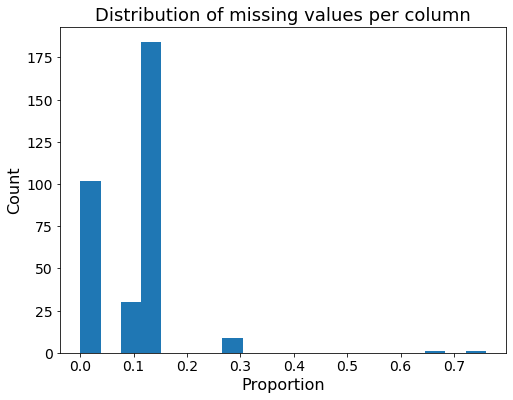

In [25]:
plt.figure(figsize=(8,6))
length = len(df_azdias.columns[df_azdias.isnull().any()])
print("Number of columns with missing values are {}".format(length))
#plot proportion
plt.hist(azdias_null_mean, bins=20)
plt.title("Distribution of missing values per column",fontsize=18)
plt.xlabel("Proportion",fontsize=16)
plt.ylabel("Count",fontsize=16);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [26]:
azdias_null_maj =( (df_azdias.isnull().mean() ) > 0) & ((df_azdias.isnull().mean() ) < 0.2)
azdias_null_maj.sum()

225

So out of 366 columns in the azdias dataset, 
- 236 has missing values
- 225 columns have missing values < 20%

Although majority of missing values are less than 20% implying that values beyond 20% are outliers, we will rather drop values >= 60% to conserve data as we have other cleaning processes to complete. Let us find which columns and assign them to a variable we will call **col_to_drop**.

In [27]:
azdias_null = (df_azdias.isnull().mean() ) >= 0.6

In [28]:
col_to_drop = azdias_null[azdias_null].index
col_to_drop

Index(['AGER_TYP', 'KK_KUNDENTYP'], dtype='object')

In [29]:
df_azdias.drop(columns=col_to_drop,inplace=True)
print(df_azdias.shape)

(891221, 325)


There are 2 columns with missing values >= 60% which were dropped from the dataset. Next we will assess missing values in each row.

#### c) Assessing missing values in each row

We note that this process will not be applicable during our prediction stage in the supervised learning model.

In [30]:
azdias_row_null_mean = df_azdias.isnull().mean(axis=1)

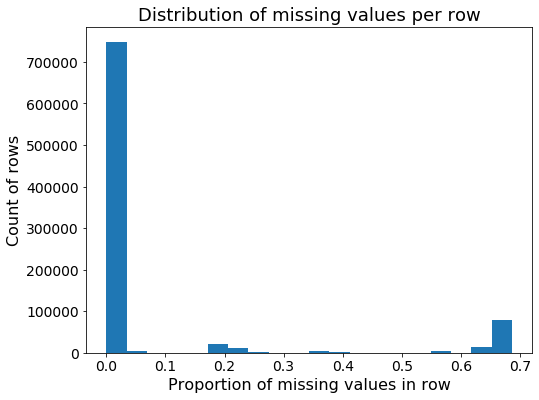

In [31]:
plt.figure(figsize=(8,6))
plt.hist(azdias_row_null_mean, bins=20)
plt.title("Distribution of missing values per row",fontsize=18)
plt.xlabel("Proportion of missing values in row",fontsize=16)
plt.ylabel("Count of rows",fontsize=16);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

More than 700,000 thousand rows have less than 10% missing values. Others represent outliers but we will drop rows with nan values greater than 50%.

In [32]:
#print number of rows with missing values >= 0.5
azdias_row_null = df_azdias.isnull().mean(axis=1)>=0.5
azdias_row_null.sum()

99234

In [33]:
#assign to a variable row_to_drop
row_to_drop = azdias_row_null[azdias_row_null].index

In [34]:
df_azdias.drop(row_to_drop, inplace=True)

In [35]:
print("shape before cleaning: ", azdias.shape)
print("shape after cleaning: ", df_azdias.shape)

shape before cleaning:  (891221, 366)
shape after cleaning:  (791987, 325)


#### Summary on data preprocessing: part 1

To summarize what we have done in this section, 

- We manually encoded NA values so that the original 269,333,46 known missing values in azdias dataset became 276,108,49 known missing values

- Next we found 2 columns with missing values >= 60%. These were outliers with number of missing values much more than other columns, and were subsequently removed.

> col_to_drop = ['AGER_TYP', 'KK_KUNDENTYP']
       
- Finally, we assesed the dataset for missing values accross rows. A total of 99,234 observations were found to have missing values >50%, and were subsequently dropped.

So from a dataset with shape (891221, 366), we arrived at a dataset with (791987, 325).

## 0.5. Preprocessing Data: Part 2

Goal is to prepare data for unsupervised learning.

### 0.5.1. Selecting, Re-Encoding and Engineering Features

In this section, we will examine the data types. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, we will need to make a few encoding changes or additional assumptions to be able to make progress. Special handling may be necessary for categorical, and 'mixed' data types. We will make a decision on each of them, whether to keep, drop, or re-encode each.

In [36]:
#show datatypes and corresponding number of columns
df_azdias.dtypes.value_counts()

float64    228
int64       91
object       6
dtype: int64

So there are 6 categorical variables in the dataset. Let us have a closer look at them.

In [37]:
# Print categorical columns
df_azdias.select_dtypes(['object']).columns

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ'],
      dtype='object')

When we take a closer look at these columns

In [38]:
# Print categorical columns
df_azdias.select_dtypes(['object']).head(3)

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
1,8A,8,51,NaN,1992-02-10 00:00:00,W
2,4C,4,24,D19_UNBEKANNT,1992-02-12 00:00:00,W
3,2A,2,12,D19_UNBEKANNT,1997-04-21 00:00:00,W


In [39]:
for col in ['CAMEO_DEU_2015','CAMEO_INTL_2015', 'CAMEO_DEUG_2015', 'D19_LETZTER_KAUF_BRANCHE','OST_WEST_KZ']:
    print('\n',df_azdias[col].unique())


 ['8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D'
 '9E' '9B' '1B' '3D' nan '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C'
 '9C' '7D' '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F'
 '5F' '1C' 'XX']

 ['51' '24' '12' '43' '54' '22' '14' '13' '15' '33' '41' '34' '55' '25' nan
 '23' '31' '52' '35' '45' '44' '32' 'XX']

 ['8' '4' '2' '6' '1' '9' '5' '7' '3' nan 'X']

 [nan 'D19_UNBEKANNT' 'D19_SCHUHE' 'D19_ENERGIE' 'D19_KOSMETIK'
 'D19_VOLLSORTIMENT' 'D19_SONSTIGE' 'D19_BANKEN_GROSS'
 'D19_DROGERIEARTIKEL' 'D19_HANDWERK' 'D19_BUCH_CD' 'D19_VERSICHERUNGEN'
 'D19_VERSAND_REST' 'D19_TELKO_REST' 'D19_BANKEN_DIREKT' 'D19_BANKEN_REST'
 'D19_FREIZEIT' 'D19_LEBENSMITTEL' 'D19_HAUS_DEKO' 'D19_BEKLEIDUNG_REST'
 'D19_SAMMELARTIKEL' 'D19_TELKO_MOBILE' 'D19_REISEN' 'D19_BEKLEIDUNG_GEH'
 'D19_TECHNIK' 'D19_NAHRUNGSERGAENZUNG' 'D19_DIGIT_SERV' 'D19_LOTTO'
 'D19_RATGEBER' 'D19_TIERARTIKEL' 'D19_KINDERARTIKEL' 'D19_BIO_OEKO'
 'D19_WEIN_FEINKOST' 'D19_GARTEN' 'D19_BILDU

- The first observation is the mixed datatypes in "CAMEO_DEU_2015","CAMEO_DEUG_2015", and "CAMEO_INTL_2015" respectively. We will replace the 'X' and 'XX' values with np.nan.

- CAMEO_DEUG_2015 column has too many features so we will use other encoded methods instead dummies

- Although CAMEO_INTL_2015 has too many values, it represents encoded information about wealth and life-stage of customers.  We will create two features that encodes this.

- EINGEFUEGT_AM should be a datetime variable. We will do data conversion later.

- OST_WEST_KZ is binary with values 'W' and 'O': we will get dummies for this variable later.

- D19_LETZTER_KAUF_BRANCHE does not have a description in attributes_values and will be dropped. 

- CAMEO_DEU_2015 has too many independent values and will be dropped.

#### Replace 'X' and 'XX' values with np.nan

In [40]:
def fix_unknown(df):
    """
    Function to replace 'X', 'XX' in columns ['CAMEO_DEUG_2015', 'CAMEO_INTL_2015'] with np.nan 
    
    INPUT:
        df- dataframe in which the columns to be corrected exist.
    OUTPUT:
        df- dataframe with fixed column data types
    """
    cols = ["CAMEO_DEU_2015","CAMEO_DEUG_2015", "CAMEO_INTL_2015"]
    
    df[cols] = df[cols].replace({"X": np.nan, "XX": np.nan})
    df["CAMEO_DEUG_2015"] = df["CAMEO_DEUG_2015"].astype(float)
    
    return df

df_azdias = fix_unknown(df_azdias)

In [41]:
#print transformed df_azdias["CAMEO_DEUG_2015"]
df_azdias["CAMEO_DEUG_2015"].unique()

array([ 8.,  4.,  2.,  6.,  1.,  9.,  5.,  7.,  3., nan])

#### Convert datetime variable

In [42]:
#convert dtype of EINGEFUEGT_AM column from object to datetime
df_azdias["EINGEFUEGT_AM"]=pd.to_datetime(df_azdias["EINGEFUEGT_AM"])
# extract only year
df_azdias["EINGEFUEGT_AM"]=pd.DatetimeIndex(df_azdias["EINGEFUEGT_AM"]).year

#test
df_azdias["EINGEFUEGT_AM"].unique()

array([1992, 1997, 2005, 2009, 1995, 1996, 2002, 2004, 2000, 2008, 1994,
       1993, 2003, 2007, 1999, 2010, 2001, 1998, 2006, 2012, 2011, 2013,
       1991])

#### Encode binary variable

In [43]:
# getting dummy column for OST_WEST_KZ
df_azdias = df_azdias.replace({'OST_WEST_KZ': {'W': 1, 'O': 0}})

#test
df_azdias['OST_WEST_KZ'].unique()

array([1, 0])

#### Feature Engineering
Here we will investigate two features: 'CAMEO_INTL_2015', and 'PRAEGENDE_JUGENDJAHRE' 

In [44]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)  

In [43]:
attributes_val

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,NaN,NaN,0,no classification possible
2,NaN,NaN,1,passive elderly
3,NaN,NaN,2,cultural elderly
4,NaN,NaN,3,experience-driven elderly
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
6,NaN,NaN,1,< 30 years
7,NaN,NaN,2,30 - 45 years
8,NaN,NaN,3,46 - 60 years
9,NaN,NaN,4,> 60 years


We notice from the attributes_val dataframe that these two features have too many information packed in them. Thus we will engineer features


In [45]:
# Investigating "CAMEO_INTL_2015" and engineering two new variables.
# credit: https://ksatola.github.io/projects/Identify_Customer_Segments10new_final.html       


# Wealth variable

def wealth(val):
    try:
    # In case value is NaN
        if pd.isnull(val):
            return np.nan
        else:
        # Return first digit
            return int(str(val)[0])
    except ValueError:
        return np.nan

# Life stage variable

def lifestage(val):
    try:
    # In case value is NaN
        if pd.isnull(val):
            return np.nan
        else:
        # Return second digit
            return int(str(val)[1])
    except ValueError:
        return np.nan

In [46]:
# Apply function to engineer wealth column
df_azdias['CAMEO_INTL_2015_WEALTH'] = df_azdias['CAMEO_INTL_2015'].apply(wealth)

# Engineer life stage column
df_azdias['CAMEO_INTL_2015_LIFESTAGE'] = df_azdias['CAMEO_INTL_2015'].apply(lifestage)

In [47]:
df_azdias.loc[:,['CAMEO_INTL_2015_WEALTH','CAMEO_INTL_2015_LIFESTAGE','CAMEO_INTL_2015']].head(5)

,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFESTAGE,CAMEO_INTL_2015
1,5.0,1.0,51
2,2.0,4.0,24
3,1.0,2.0,12
4,4.0,3.0,43
5,5.0,4.0,54


#### More on Feature engineering

An attribute from the integer datatype is of particular interest and that is **PRAEGENDE_JUGENDJAHRE"**.

When we take a closer look at the description of its values in the attributes_values dataset, we observe too many information are clustered under the column. We will now free up the column by engineering new feature.

In [48]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

# Generation 
generations = {0: [1, 2],  1: [3, 4], 2: [5, 6, 7], 3: [8, 9], 4: [10, 11, 12, 13], 5:[14, 15]} 

def generation(val):
    try:
        for key, values in generations.items():
            if val in values:
                return key
    # In case value is NaN
    except ValueError:
        return np.nan
    
# Movement ( Mainstream, O+W) = 1, (Avantgarde, O+W) = 0 )

list_val = [1, 3, 5, 8, 10, 12, 14]

def movement(val):
    try:
        if val in list_val:
            return 1
        else:
            return 0
    # In case value is NaN
    except ValueError:
        return np.nan

In [49]:
# Engineer generation column
df_azdias['PRAEGENDE_JUGENDJAHRE_GENERATION'] = df_azdias['PRAEGENDE_JUGENDJAHRE'].apply(generation)

# Engineer movement column
df_azdias['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = df_azdias['PRAEGENDE_JUGENDJAHRE'].apply(movement)


In [50]:
df_azdias.loc[:,['PRAEGENDE_JUGENDJAHRE_GENERATION','PRAEGENDE_JUGENDJAHRE_MOVEMENT','PRAEGENDE_JUGENDJAHRE']].head()

,PRAEGENDE_JUGENDJAHRE_GENERATION,PRAEGENDE_JUGENDJAHRE_MOVEMENT,PRAEGENDE_JUGENDJAHRE
1,5.0,1,14
2,5.0,0,15
3,3.0,1,8
4,3.0,1,8
5,1.0,1,3


Drop features

In [51]:
df_azdias.drop(['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE','CAMEO_DEU_2015','D19_LETZTER_KAUF_BRANCHE'],axis=1,inplace=True)

In [52]:
df_azdias.shape

(791987, 325)

#### 0.5.2. Summary on Selecting and Re-Encoding Features

- We dropped features with many values.

- We converted datetime variable from object to datetime

- 
### 0.5.3. Categories with many features

We have 366 columns in azdias dataset which through our preprocessing steps have been reduced to 327. However creating dummy variables of categorical variables would likely increase the number of columns. It makes sense to drop categorical variables with many features. We will set a threshold of 25. Let's explore!

In [53]:
def var_with_many_feat(df):
    """
    Function to find variables with more than 25 features. 
    Input: 
          df is dataframe
    Output:
          List of variables with values > 25.
    """
    features = []
    for col in df.columns:
        if df[col].nunique()>25:
            features.append((col, df[col].nunique(), df[col].dtypes))
    return features

In [54]:
#apply function on azdias dataset
var_with_many_feat(df_azdias)

[('LNR', 791987, dtype('int64')),
 ('ANZ_HAUSHALTE_AKTIV', 292, dtype('float64')),
 ('ANZ_PERSONEN', 29, dtype('float64')),
 ('ANZ_STATISTISCHE_HAUSHALTE', 268, dtype('float64')),
 ('EINGEZOGENAM_HH_JAHR', 37, dtype('float64')),
 ('GEBURTSJAHR', 117, dtype('int64')),
 ('KBA13_ANZAHL_PKW', 1261, dtype('float64')),
 ('LP_LEBENSPHASE_FEIN', 41, dtype('float64')),
 ('MIN_GEBAEUDEJAHR', 29, dtype('float64'))]

Going through the description of these features in the attributes_values dataset, it is justifible to drop some of them from our dataset. Some explantions are given below


- 'ANZ_HAUSHALTE_AKTIV' describes the number of households in the building, it is encoded numerically 1-10 however we see 292.

- 'ANZ_PERSONEN'is expected to be 1-3 but we find 29 thus will be dropped.

- ''ANZ_STATISTISCHE_HAUSHALTE' has no description and will be dropped

- 'LP_LEBENSPHASE_FEIN' describes lifestage of individuals which we have already encoded in the feature **CAMEO_INTL_2015_LIFESTAGE**

- 'EINGEZOGENAM_HH_JAHR' has no decription and will be dropped

In [56]:
# dropping columns that have too many features and the one with no description
df_azdias.drop(columns=["LP_LEBENSPHASE_FEIN",'EINGEZOGENAM_HH_JAHR'], inplace=True)
df_azdias.shape

(791987, 323)

### 0.4.1. Imputing missing values

In this step, we impute the missing values by using mode values for each column.

In [57]:
print("Total number of missing values in azdias before imputing: ", df_azdias.isnull().sum().sum())

Total number of missing values in azdias before imputing:  4656436


In [58]:
imputer = SimpleImputer(strategy='most_frequent')

In [59]:
# fit and transform of imputer on dataframe

df_azdias = pd.DataFrame(imputer.fit_transform(df_azdias), columns = df_azdias.columns)

In [60]:
print("number of missing values in azdias after imputing: ", df_azdias.isnull().sum().sum())

number of missing values in azdias after imputing:  0


### 0.4.2. Identify and remove correlated features

If we have highly correlated features, we think about getting rid of them otherwise they might cause overfitting 

In [61]:
# getting absolute value correlation matrix by using corr from pandas
corr_mat = df_azdias.corr().abs()

In [62]:
corr_mat.head()

,LNR,AKT_DAT_KL,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,CJT_GESAMTTYP,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SP

In [63]:
# upper triangle of correlation matrix
corr_upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
corr_upper_tri.head()

,LNR,AKT_DAT_KL,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,CJT_GESAMTTYP,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SP

In [64]:
# Select columns whose correlation are above the threshold of 0.85 and assign to new variable cols_to_drop
threshold=0.85
cols_to_drop = [column for column in corr_upper_tri.columns if any(corr_upper_tri[column] > threshold)]

print("{} Correlated columns that would be dropped are:".format(len(cols_to_drop)))
print()
print(cols_to_drop)

36 Correlated columns that would be dropped are:

['ANZ_STATISTISCHE_HAUSHALTE', 'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ONLINE_QUOTE_12', 'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM', 'D19_GESAMT_ONLINE_DATUM', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_KONSUMTYP_MAX', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_ANZ_24', 'D19_VERSAND_DATUM', 'D19_VERSAND_ONLINE_DATUM', 'D19_VERSAND_ONLINE_QUOTE_12', 'KBA05_KRSAQUOT', 'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_SEG2', 'KBA05_SEG5', 'KBA05_SEG6', 'KBA05_SEG9', 'KBA05_ZUL4', 'KBA13_HALTER_40', 'KBA13_HALTER_55', 'KBA13_HALTER_66', 'KBA13_HERST_SONST', 'KBA13_KMH_250', 'KBA13_SITZE_5', 'KBA13_VW', 'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_GROB', 'LP_STATUS_GROB', 'MIN_GEBAEUDEJAHR', 'ANREDE_KZ', 'CAMEO_INTL_2015_WEALTH', 'PRAEGENDE_JUGENDJAHRE_MOVEMENT']


In [65]:
# drop the 46 most correlated columns
df_azdias.drop(columns=cols_to_drop, inplace=True)

In [66]:
#new dataset shape
df_azdias.shape

(791987, 287)

### 0.6. Detect and remove outliers

To detect these outliers in our dataset, we will use a module called stats in scipy library which will help us in finding z-scores. A z-score is calculated by subtracting the mean from the original data points then divided by standard deviations. Consequently, the distribution would haveamean of 0 and standard deviation of 1.

Z-scores range from -3 standard deviations (which would fall to the far left of the normal distribution curve) up to +3 standard deviations (which would fall to the far right of the normal distribution curve). Our goal is to keep values that z-score < 6 for all values in a row.

In [67]:
# calculate z score for each value in dataset
z = np.abs(stats.zscore(df_azdias))

In [68]:
# filter all rows whose z score less than 6
df_azdias = df_azdias[(z < 6).all(axis=1)]

In [69]:
# reset index for new dataframe
df_azdias.reset_index(drop=True, inplace=True)

In [70]:
df_azdias.shape

(688712, 287)

### 0.4.5.  Scale the dataset

In this step, sklearn StandardScaler() is used for the normalization of the dataset. It standardizes features by removing the mean and scaling to unit variance



In [71]:
scaler = StandardScaler()

In [72]:
# we dont want to scale the ID column **LNR**, so let's keep assign toa variable lnr_col
lnr_col = df_azdias['LNR']

In [73]:
# fit and transform of scaler on dataframe
df_azdias =pd.DataFrame(scaler.fit_transform(df_azdias), columns = df_azdias.columns)

In [74]:
# get back LNR column again
df_azdias['LNR']=lnr_col

# set index LNR column
df_azdias.set_index("LNR", inplace=True)

In [75]:
df_azdias.head()

,AKT_DAT_KL,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,CJT_GESAMTTYP,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_OFFLINE_DATUM,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG3,KBA05_SEG4,KBA05_SEG7,KBA05_SEG8,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_6,KBA13_TOYOTA,KBA13_VORB_0,KBA13_VORB_1,KBA13_VORB_1_2,KBA13_VORB_2,KBA13_VORB_3,KKK,KONSUMNAEHE,LP_FAMILIE_FEIN,LP_STATUS_FEIN,MOBI_REGIO,NATIONALITAET_KZ,ONLINE_AFFINITAET,ORTSGR_KLS9,OST_WEST_KZ,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_GBZ,PLZ8_HHZ,REGIOTYP,RELAT_AB,RETOURTYP_BK_S,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT

## 0.5: ETL pipeline

In this section, we will put all the data preprocessing steps together in a function. 

### 0.5.1. Create an ETL pipeline

In [76]:
def data_preprocessing(df, df_name = None):
    """
    Perform cleaning of demographics dataset by converting data types, 
    dropping missing values in columns and rows, re-encoding variables, 
    computing missing values, removing outliers, dropping correlated features and standardizing
    
    INPUT: 
        df: Demographic dataset (DataFrame)
        df_name: Name of dataframe (str)
    
    Output:
        df_clean: Cleaned dataset (DataFrame)
    """
    # Get copy of df
    df_clean = df.copy()
    
    # Drop columns from customer dataset, which are not found in azdias dataset 
    if df_name == 'customers':
        df_clean.drop(columns= ['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'], inplace=True)
    
    #Drop some columns with no description in attributes_values dataset
    cols_with_no_desc =['ALTERSKATEGORIE_FEIN','ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 
                     'ALTER_KIND4', 'ARBEIT','CJT_KATALOGNUTZER','CJT_TYP_1', 'CJT_TYP_2',
                     'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6','EXTSEL992', 
                     'FIRMENDICHTE', 'GEMEINDETYP', 'KBA13_ANTG1','KBA13_ANTG2', 'KBA13_ANTG3',
                        'KBA13_ANTG4', 'KBA13_BAUMAX',
        'KBA13_GBZ','KBA13_HHZ','KOMBIALTER', 'KONSUMZELLE', 'MOBI_RASTER', 'RT_KEIN_ANREIZ', 
        'RT_SCHNAEPPCHEN', 'RT_UEBERGROESSE', 'STRUKTURTYP', 'UMFELD_ALT', 'UMFELD_JUNG',
        'UNGLEICHENN_FLAG', 'VERDICHTUNGSRAUM', 'VHA', 'VHN', 'VK_DHT4A', 'VK_DISTANZ', 
        'VK_ZG11']

    df_clean.drop(columns=cols_with_no_desc,inplace=True)

    
    def get_unknown_repr(df):
        """Returns the representation (a list) of unknown values
        INPUT:
            df: dataframe of all attributes with unknown/missing codes
        OUTPUT:
            a dataframe with two columns, all attributes and the corresponding list of missing codes.
        """
        unknown_val = []
        for attrib in df['Attribute'].unique():
            val = df[df["Attribute"] == attrib]["Value"].astype(str).str.cat(sep=",").split(',')
            unknown_val.append(val)
    
        attributes_unknown_or_missing = pd.concat([pd.Series(df['Attribute'].unique()), pd.Series(unknown_val)], axis=1)
        attributes_unknown_or_missing.columns = ['attribute', 'missing_or_unknown']
 
        return attributes_unknown_or_missing



    def missing_to_nan(df):
        """A function to replace all unknown/missing values in dataframe df with np.nan
    
        INPUT: 
            df - Pandas dataframe
        OUTPUT:
            df - with all unknown values replaced with np.nan
        """
        unknown_df = get_unknown_repr(missing_or_unknown_dias)
        for item in range (len (unknown_df['missing_or_unknown'])): 
            column_name = unknown_df.iloc[item]['attribute'] #saving column name
            for i in range(0, len(unknown_df['missing_or_unknown'][item])):
                unknown_df['missing_or_unknown'][item][i] = int(unknown_df['missing_or_unknown'][item][i])
            df[column_name].replace (to_replace = unknown_df['missing_or_unknown'][item], value = np.NaN, regex = True, inplace = True)
            return df
    
    df_clean = missing_to_nan(df_clean)
    
     
    # Drop columns which involve >= 60% missing values
    df_clean.drop(columns= ['AGER_TYP','KK_KUNDENTYP'],inplace=True)
    
    # Find the rows that include too many missing values and drop them if ratio of missing values more than 0.5
    df_row_nan_mean=df_clean.isnull().mean(axis=1)
    rows_to_drop=df_row_nan_mean[df_row_nan_mean>0.5].index
    df_clean.drop(rows_to_drop, inplace=True)
    
    #Engineer and re-encode features
    #convert datatypes in columns 18 and 19 to float
    #cols = ["CAMEO_DEUG_2015", "CAMEO_INTL_2015"]
    def fix_unknown(df):
        """
        Function to replace 'X', 'XX' in columns ['CAMEO_DEUG_2015', 'CAMEO_INTL_2015'] with np.nan 
    
        INPUT:
            df- dataframe in which the columns to be corrected exist.
        OUTPUT:
            df- dataframe with fixed column data types
        """
        cols = ["CAMEO_DEU_2015","CAMEO_DEUG_2015", "CAMEO_INTL_2015"]
    
        df[cols] = df[cols].replace({"X": np.nan, "XX": np.nan})
        df["CAMEO_DEUG_2015"] = df["CAMEO_DEUG_2015"].astype(float)
    
        return df

    df_clean = fix_unknown(df_clean)
    
    
    # Change dtype of EINGEFUEGT_AM column from object to datetime and extract only year
    df_clean["EINGEFUEGT_AM"]=pd.to_datetime(df_clean["EINGEFUEGT_AM"])
    df_clean["EINGEFUEGT_AM"]=pd.DatetimeIndex(df_clean["EINGEFUEGT_AM"]).year
      

    #df_clean = fix_cols_with_error_warning(df_clean)
    
    
    
   
    # getting dummy column for OST_WEST_KZ
    df_clean = df_clean.replace({'OST_WEST_KZ': {'W': 1, 'O': 0}})

    # Investigate "CAMEO_INTL_2015" and engineer two new variables.  
    # Wealth 
    def wealth(val):
        try:
    # In case value is NaN
            if pd.isnull(val):
                return np.nan
            else:
        # Return first digit
                return int(str(val)[0])
        except ValueError:
            return np.nan

# Life stage
    def lifestage(val):
        try:
    # In case value is NaN
            if pd.isnull(val):
                return np.nan
            else:
        # Return second digit
                return int(str(val)[1])
        except ValueError:
            return np.nan
        
        # Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
# Engineer wealth column
    df_clean['CAMEO_INTL_2015_WEALTH'] = df_clean['CAMEO_INTL_2015'].apply(wealth)

# Engineer life stage column
    df_clean['CAMEO_INTL_2015_LIFESTAGE'] = df_clean['CAMEO_INTL_2015'].apply(lifestage)


# Generation 
    generations = {0: [1, 2],  1: [3, 4], 2: [5, 6, 7], 3: [8, 9], 4: [10, 11, 12, 13], 5:[14, 15]} 

    def generation(val):
        try:
            for key, values in generations.items():
                if val in values:
                    return key
    # In case value is NaN
        except ValueError:
            return np.nan
    
# Movement 
    list_val = [1, 3, 5, 8, 10, 12, 14]

    def movement(val):
        try:
            if val in list_val:
                return 1
            else:
                return 0
    # In case value is NaN
        except ValueError:
            return np.nan
    
# Engineer generation column
    df_clean['PRAEGENDE_JUGENDJAHRE_GENERATION'] = df_clean['PRAEGENDE_JUGENDJAHRE'].apply(generation)

# Engineer movement column
    df_clean['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = df_clean['PRAEGENDE_JUGENDJAHRE'].apply(movement)

    #drop columns
    
    df_clean.drop(['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'],axis=1,inplace=True)

    
    # dropping columns that have too many features and the one with no description
    df_clean.drop(columns=["CAMEO_DEU_2015", "D19_LETZTER_KAUF_BRANCHE","LP_LEBENSPHASE_FEIN",'EINGEZOGENAM_HH_JAHR'], inplace=True)


    # Convert categorical column to encoded
    
    #df_clean=pd.get_dummies(df_clean, drop_first=True)
        
    # Impute missing values with mode value
    imputer = SimpleImputer(strategy='most_frequent')
    df_clean=pd.DataFrame(imputer.fit_transform(df_clean), columns = df_clean.columns)
    
    # Identify and remove 36 correlated features
    
    df_clean.drop(columns=['ANZ_STATISTISCHE_HAUSHALTE', 'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ONLINE_QUOTE_12',
                           'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM', 'D19_GESAMT_ONLINE_DATUM', 'D19_GESAMT_ONLINE_QUOTE_12',
                           'D19_KONSUMTYP_MAX', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_ANZ_24', 'D19_VERSAND_DATUM', 
                           'D19_VERSAND_ONLINE_DATUM', 'D19_VERSAND_ONLINE_QUOTE_12', 'KBA05_KRSAQUOT', 'KBA05_KRSHERST1',
                           'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_SEG2', 'KBA05_SEG5', 'KBA05_SEG6', 'KBA05_SEG9', 
                           'KBA05_ZUL4', 'KBA13_HALTER_40', 'KBA13_HALTER_55', 'KBA13_HALTER_66', 'KBA13_HERST_SONST',
                           'KBA13_KMH_250', 'KBA13_SITZE_5', 'KBA13_VW', 'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_GROB', 'LP_STATUS_GROB', 
                           'MIN_GEBAEUDEJAHR', 'ANREDE_KZ', 'CAMEO_INTL_2015_WEALTH', 'PRAEGENDE_JUGENDJAHRE_MOVEMENT'], inplace=True)
    
    # Remove outliers from dataset by using z score
    z = np.abs(stats.zscore(df_clean))
    df_clean = df_clean[(z < 6).all(axis=1)]
    df_clean.reset_index(drop=True, inplace=True)

    # Standardization of dataset
    lnr=df_clean['LNR']
    scaler = StandardScaler()
    df_clean=pd.DataFrame(scaler.fit_transform(df_clean), columns = df_clean.columns)
    df_clean['LNR']=lnr
   
    # set index LNR column
    df_clean.set_index("LNR", inplace=True)

    return df_clean

### 0.5.2. Preprocessing customers dataset

We will now apply the function to customer's dataset

In [77]:
df_customer_clean = data_preprocessing(customers, df_name = "customers")

In [78]:
print(df_customer_clean.shape)

(122334, 286)


In [79]:
df_customer_clean.head()

,AKT_DAT_KL,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,CJT_GESAMTTYP,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_OFFLINE_DATUM,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG3,KBA05_SEG4,KBA05_SEG7,KBA05_SEG8,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_6,KBA13_TOYOTA,KBA13_VORB_0,KBA13_VORB_1,KBA13_VORB_1_2,KBA13_VORB_2,KBA13_VORB_3,KKK,KONSUMNAEHE,LP_FAMILIE_FEIN,LP_STATUS_FEIN,MOBI_REGIO,NATIONALITAET_KZ,ONLINE_AFFINITAET,ORTSGR_KLS9,OST_WEST_KZ,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_GBZ,PLZ8_HHZ,REGIOTYP,RELAT_AB,RETOURTYP_BK_S,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT

### 0.5.3. Preprocessing Azdias dataset

In [80]:
df_azdias_clean = data_preprocessing (azdias, df_name = "azdias")

In [81]:
print(df_azdias_clean.shape)

(688712, 286)


In [82]:
df_azdias_clean.head()

,AKT_DAT_KL,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,CJT_GESAMTTYP,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_OFFLINE_DATUM,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG3,KBA05_SEG4,KBA05_SEG7,KBA05_SEG8,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_6,KBA13_TOYOTA,KBA13_VORB_0,KBA13_VORB_1,KBA13_VORB_1_2,KBA13_VORB_2,KBA13_VORB_3,KKK,KONSUMNAEHE,LP_FAMILIE_FEIN,LP_STATUS_FEIN,MOBI_REGIO,NATIONALITAET_KZ,ONLINE_AFFINITAET,ORTSGR_KLS9,OST_WEST_KZ,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_GBZ,PLZ8_HHZ,REGIOTYP,RELAT_AB,RETOURTYP_BK_S,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT

So we have processed the customer and azdias datasets respectively. Two datasets have equal number of columns which is necessary for future analysis.

We will now go ahead with the next part of this project, which is the customer segmentations report.

## Part 1: Customer Segmentation Report

In this section, our aim is to use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. We hope by the end of this part, we are able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

As we know, unsupervised learning allows us to find patterns in data. Using suitable algorithms, we will discover hidden structures and assign labels to our unlabeled data. Two types of unsupervised learning techniques are used to achieve our aim

1) PCA
2) Clustering

### 1.1. Reduction of dimensionality

We will work with unsupervised learning methods such as Principal Component Analysis (PCA) and clustering. You will learn why and how we can reduce the dimensionality of the original data and what the main approaches are for grouping similar data points.

#### Principal Component Axis (PCA)

Principal Component Analysis is one of the easiest, most intuitive, and most frequently used methods for dimensionality reduction, projecting data onto its orthogonal feature subspace.

Use Principal component analysis from (PCA) from sklearn. 

In this section, we want to see how we could turn all our 286 features to a smaller dimension so that we really get to the heart of the information they convey. So the task is to find the comosite features or what we call principal components that more directly probes the underlying phenomena. 

When we perform compression on our data, the principal components would be the direction that has the largest variance as it retains maximum amount of information in the original data and minimize information loss.

- Systemized way to transform input features to principal components
- Use principal components as new features
- the more variance we have along a pc, the higher the pc is ranked
- the pc are perpendicular to each other so you can treat them as independent features


In [83]:
pca = PCA(n_components = 0.95).fit(df_azdias_clean)
print("The number of features we are able to explain with 95% confidence is {}".format(pca.n_components_))

The number of features we are able to explain with 95% confidence is 196


So the number of component for 95% threshold is 196.

#### 1.1.1. Dimension reduction function

In [84]:
def pca_reduction(df, n_components):
    """
    Perform PCA dimension reduction to dataset
    
    Input: 
    df: Demographic dataset (DataFrame)
    n_components: Number of components for PCA
    
    Output:
    df_reduced: PCA applied dataset (DataFrame)
    pca: PCA object
    """
    # PCA
    pca = PCA(n_components=n_components)
    # fit and transform of PCA
    df_reduced = pd.DataFrame(pca.fit_transform(df), columns=["PC"+str(i) for i in range(n_components)])
    
    return df_reduced, pca

In [85]:
azdias_reduced, azdias_pca = pca_reduction(df_azdias_clean, 196)

In [86]:
print(azdias_reduced.shape)
azdias_reduced.head()

(688712, 196)


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195
0,2.053707,2.225666,-1.327359,-0.220196,3.514410,-3.981283,-4.320292,-0.645904,-2.095806,-0.035036,-0.792940,1.811877,1.585855,0.669269,-2.655424,-0.266764,1.592053,0.332884,-0.302974,-0.069146,0.846275,-1.304494,0.421125,0.980371,-1.565962,0.556805,0.665992,0.691679,-1.065528,0.109097,-2.079068,0.398825,-2.372954,-1.391040,-0.378899,-0.497595,-1.351424,-0.491477,0.881461,-0.631496,-0.774673,-1.064729,-0.945347,-0.185253,0.888930,-1.871828,1.255595,1.124553,0.924875,0.899809,-0.867655,2.240687,1.019695,0.605257,-1.979090,0.404487,-0.009747,0.424155,0.010341,0.137488,-0.515767,-1.157194,0.764488,0.199736,-0.269225,0.198083,-1.002682,0.293554,-0.147980,0.109540,0.474163,0.060356,-0.935779,0.852607,0.859271,0.239645,-0.460662,-0.858607,0.265483,0.318136,-0.407282,-0.021499,-1.375134,0.179685,-1.101138,0.316989,0.469266,-0.324700,-0.451717,-0.144883,0.357868,-0.317311,0.273485,0.256062,1.792731,0.860708,-0.308850,-0.032396,0.049089,-0.803840,0.755459,0.165617,-1.250993,0.301323,0.045536,-0.358831,0.321920,-0.340046,-0.196575,-0.723594,-0.367784,-0.105543,0.553887,-0.735426,-1.076177,0.605035,-0.163576,-1.868071,-0.946245,0.734195,0.245322,-0.514622,-0.350561,2.354027,-1.273209,-0.201938,-1.283392,0.696874,1.386300,0.614251,0.514723,0.537035,-0.188237,1.270894,1.449541,1.067563,-0.299306,0.075465,-0.180998,-1.125991,-1.021443,-1.038765,-1.096561,-0.037367,-1.032038,-0.644343,0.215127,1.086257,0.561907,0.108645,-0.188187,0.497176,-0.626143,-1.425201,-0.333213,0.725770,0.118557,0.038273,-0.749562,-0.061130,0.211826,0.948547,-0.961991,0.486630,0.787548,1.059183,0.305802,-0.013533,0.530454,-0.130780,0.138898,0.417670,-0.643436,-1.040559,0.366909,-0.056617,0.538797,-0.209983,0.792124,-0.377433,-0.211527,-0.562175,-0.479775,0.008846,0.192334,-0.849203,0.361590,0.381165,-0.142863,0.400508,-0.005152,0.317209,-0.615471,-0.109134,0.421039,0.095018
1,4.922291,0.225342,-3.454347,-1.912705,-0.710712,-0.078434,0.127134,-0.958328,3.942796,-0.685508,0.829213,-2.019365,0.511739,-0.306634,-0.750310,1.380958,0.908651,0.957082,-1.377055,0.021889,0.951676,0.426402,0.063146,-0.326275,1.007076,-0.937499,-1.302167,2.070966,-2.096860,0.493629,1.152238,0.085044,1.142573,-0.437008,-3.044712,0.771915,-0.303382,2.628715,1.784622,1.516543,-1.967714,-0.222670,0.767807,0.908941,0.811730,-1.827289,-1.218844,0.792476,1.019082,0.940194,1.273774,1.470583,-0.331009,-0.144069,-0.594426,-1.549453,1.073998,-0.773471,-0.204241,1.754226,-0.363346,-0.339028,-0.022719,-0.133591,0.335819,-0.035561,-0.361560,0.507583,0.032727,0.007355,0.426695,0.761592,-0.207061,-0.500455,1.509406,-0.383353,0.529251,0.360858,0.788566,0.528392,-0.266755,-0.292806,-0.154342,-2.052709,0.525425,-0.922207,0.048049,0.046920,-0.089268,-0.892941,0.326974,0.145494,0.044070,-1.793720,-0.029302,-0.406225,0.905751,-0.464350,-0.570554,0.081333,2.016795,0.141619,-0.706652,-1.305772,-0.273857,0.890000,0.742283,1.606389,1.234697,-1.002047,0.353522,0.371097,0.4948

In [87]:
azdias_pca

PCA(copy=True, iterated_power='auto', n_components=196, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [88]:
customers_reduced, customers_pca = pca_reduction(df_customer_clean, 196)

In [89]:
print(customers_reduced.shape)
customers_reduced.head()

(122334, 196)


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195
0,-4.165634,2.903231,-4.196856,-0.589602,-1.774068,1.200092,0.223440,-1.123307,-1.366767,0.487322,2.075393,1.828260,-0.584177,0.625375,1.757718,-2.042763,-0.103878,1.193981,-0.229553,0.647993,-1.873642,0.460655,-0.898064,0.432458,-1.198639,0.684268,2.073784,-0.803280,1.756560,-1.131432,-0.694581,0.212836,2.155192,-1.023452,0.067419,-0.896803,-0.032768,1.275958,-1.164928,-0.450402,0.121207,-1.177816,-1.251734,0.446491,0.543153,0.453157,1.056263,0.719312,-0.315074,-1.992386,-0.847086,-0.831467,-0.657007,0.360442,-1.054144,1.244824,0.425770,-1.673179,0.502835,-0.076473,-1.023654,-0.125098,-0.354811,0.837630,-0.198781,0.369605,0.904032,0.366186,0.204785,0.348518,0.851329,0.284034,0.182997,0.327035,-1.021209,0.575990,0.040433,0.424516,-0.886686,-0.356166,-0.022701,-0.945911,-1.373718,-0.795359,1.677896,0.128419,-0.158934,0.745329,0.980037,0.121525,-0.048645,0.649648,0.681319,1.057039,-0.482684,-1.193438,0.693754,-0.751389,-0.827842,-0.383369,0.403156,2.428204,-0.094752,0.706604,-1.568179,-0.108363,-1.226486,0.700871,-0.476002,-0.186837,-0.937014,1.132707,-0.767706,-0.696542,-0.014285,0.074352,-0.591695,0.033563,-0.431396,0.016792,0.906696,-0.656025,-0.376643,0.083198,-0.281586,-0.554532,-0.312026,0.483602,-0.131108,0.315009,0.765356,0.943571,-0.457285,-0.222597,1.363443,0.039331,1.642177,-0.946402,-0.339612,-0.681680,-0.651037,-1.238529,1.298459,-2.198287,-0.665269,-0.220361,-0.391267,-0.153315,0.461013,0.367845,0.536538,-0.204530,0.142746,-0.829502,-0.468645,0.650965,0.286166,-1.321281,-0.637131,-0.334867,0.397714,-0.392579,-0.138988,-0.027765,1.034696,-0.745126,1.068594,0.222047,-0.726525,0.392679,0.418388,-0.008457,0.670866,0.127579,-1.070842,-0.776021,-0.219786,0.095463,0.635186,-0.326360,-0.019648,0.168324,0.764024,-0.063502,-0.271563,0.247732,-0.345454,0.345362,0.247357,-0.196779,-0.175276,-0.332819,-0.649866,-0.336103,0.177596,-0.234515
1,4.133332,0.347172,-2.531253,-1.447120,-4.757659,-3.057850,0.111165,-0.242131,5.501584,-0.095236,-3.028846,1.784887,1.714860,1.744962,-0.588555,1.686105,0.052031,-0.622187,0.125389,0.389415,2.004846,0.288183,0.823366,-0.306050,-0.335039,-0.184687,-0.424947,0.040013,1.913052,0.065390,0.821106,-1.977674,-0.856602,-0.548078,-1.984529,0.639045,-1.265431,0.554062,1.176289,1.692660,0.095857,-0.001929,-0.887579,0.420182,1.192705,-1.065687,0.224293,-0.094253,0.940955,0.482236,-1.484185,-0.624012,-1.672329,-0.640271,-0.020314,0.231163,-0.953011,0.703720,0.919075,-0.896167,-0.558345,2.525057,0.672257,-0.398817,-0.979176,-1.609149,0.554256,-0.629136,-1.007584,-0.465479,-0.590108,-0.426323,1.010363,0.610766,1.953614,-0.709254,-0.231110,-0.910583,-0.856649,0.547989,-0.186181,0.430441,0.092554,0.967988,2.002535,-0.899930,-1.480766,-1.135477,0.478964,0.225944,0.660615,1.039112,-0.577164,-0.770739,1.878054,-1.321790,-0.722077,0.032849,-0.756260,-0.247498,-0.338877,-0.828365,0.107949,0.440432,-0.037524,-0.073697,0.140025,-0.110875,0.106052,1.654879,0.626776,-0.3

In [90]:
# Let's see in numbers how variability coverage grows
# when adding more and more components
for i in np.arange(1, 6, 1):
    print('{} components explain {} of variance.'.format(i, round(100*azdias_pca.explained_variance_ratio_[i],2)))

1 components explain 5.25 of variance.
2 components explain 3.73 of variance.
3 components explain 3.26 of variance.
4 components explain 2.76 of variance.
5 components explain 2.1 of variance.


#### 1.1.2. PCA plot function

In [91]:
def scree_plot(pca):
    """
    Perform cumulative sum of PCA explained_variance_ratio_ then plot
    cumulative explained variance ratio vs number of components
    
    INPUT: 
         pca: PCA object
    
    OUTPUT:
         return None
    """

    vals = pca.explained_variance_ratio_
    
    n_comp = pca.n_components_
    ind = np.arange(n_comp)
 
    plt.figure(figsize=(18, 8))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component",fontsize=16)
    ax.set_ylabel("Cummulative Proportion of Variance Explained",fontsize=16)
    plt.title('Explained Variance Per Principal Component',fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
 

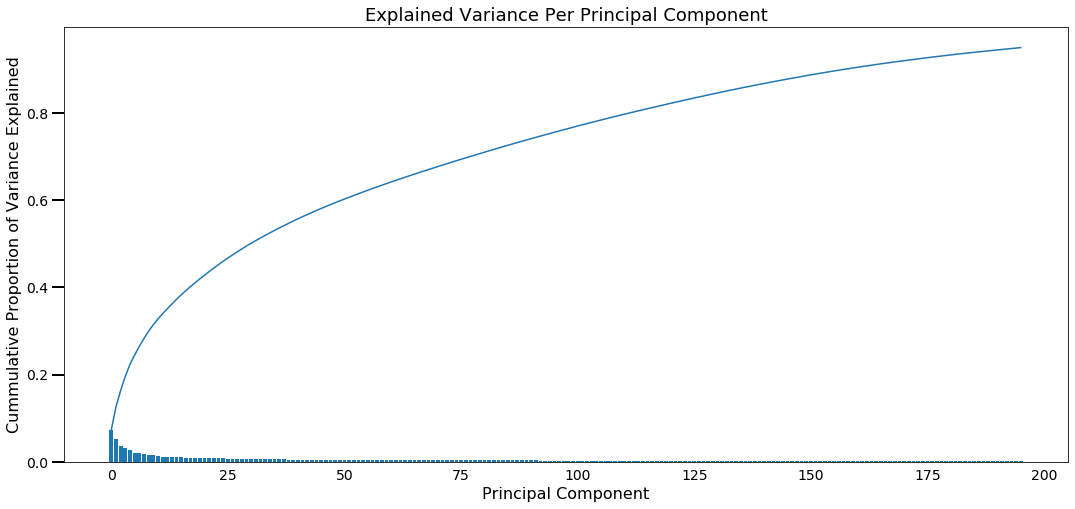

In [92]:
scree_plot(azdias_pca)

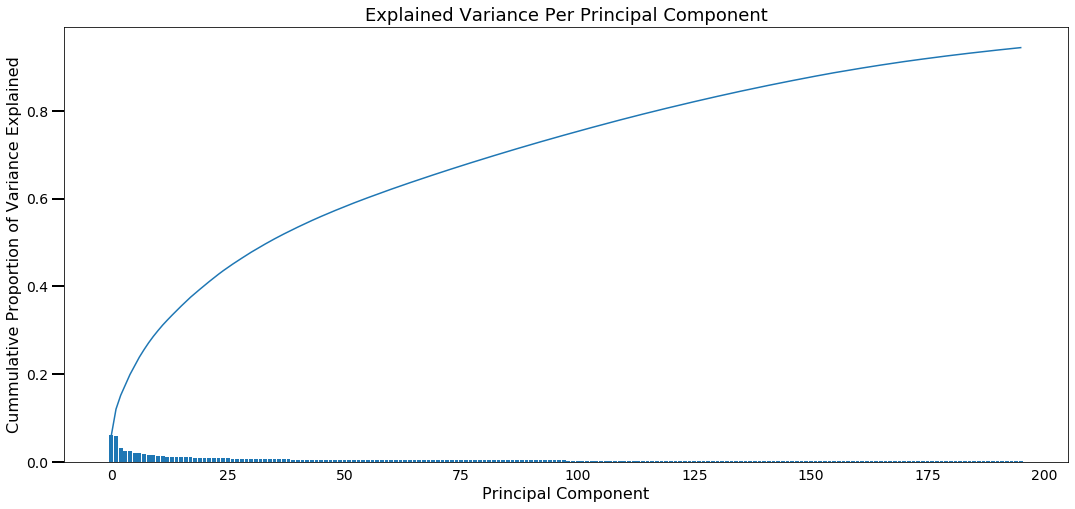

In [93]:
scree_plot(customers_pca)

#### Discussion 2.2: Perform Dimensionality Reduction

We observe that we are fine reducing the dimension of our dataset from 286 features to 196 PCA components. This reduction will still allow us to capture almost 95% of data variability.

#### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increase in one is expected to be associated with increase in the other. 

To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, ww will map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. 

- We will investigate and interpret feature associations from the first five principal components in this substep. To help facilitate this, we will write a function that we can call at any time to print the sorted list of feature weights, for the i-th principal component. 


#### 1.1.3. PCA feature importance
PCA is also important to determine the feature importance. I prepared functions. One of them creates a matrix which shows feature weights for each principal components. 
In the final dataframe, principal components are sorted according to importance. So, PC 0 is the most important one.

In [96]:
def pca_feature_importance(pca, df_clean):

    """
    This function generates a dataframe of feature weights for every PCs
    INPUT: 
          pca: PCA object for df
          df_clean: The cleaned demographic dataframe
    
    OUTPUT:
         df_feature_importance: A Dataframe showing the feature weights for each PC
    
    """
    # number of principal components
    n_comp = pca.n_components_
    
    # index column of dataframe
    idx=["PC"+str(i) for i in range(n_comp)]
    
    # create dataframe with principal axes pca.components_ and corresponding data features
    df_feature_importance = pd.DataFrame((pca.components_), columns=df_clean.columns, index=idx)
    
    return df_feature_importance

In [97]:
azdias_pca_feature_importance = pca_feature_importance(azdias_pca, df_azdias_clean)

In [98]:
print(azdias_pca_feature_importance.shape)
azdias_pca_feature_importance.head()

(196, 286)


,AKT_DAT_KL,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,CJT_GESAMTTYP,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_OFFLINE_DATUM,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG3,KBA05_SEG4,KBA05_SEG7,KBA05_SEG8,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_6,KBA13_TOYOTA,KBA13_VORB_0,KBA13_VORB_1,KBA13_VORB_1_2,KBA13_VORB_2,KBA13_VORB_3,KKK,KONSUMNAEHE,LP_FAMILIE_FEIN,LP_STATUS_FEIN,MOBI_REGIO,NATIONALITAET_KZ,ONLINE_AFFINITAET,ORTSGR_KLS9,OST_WEST_KZ,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_GBZ,PLZ8_HHZ,REGIOTYP,RELAT_AB,RETOURTYP_BK_S,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT

In [99]:
customers_pca_feature_importance = pca_feature_importance(customers_pca, df_customer_clean)

In [100]:
print(customers_pca_feature_importance.shape)
customers_pca_feature_importance.head()

(196, 286)


,AKT_DAT_KL,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,CJT_GESAMTTYP,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_OFFLINE_DATUM,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG3,KBA05_SEG4,KBA05_SEG7,KBA05_SEG8,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_6,KBA13_TOYOTA,KBA13_VORB_0,KBA13_VORB_1,KBA13_VORB_1_2,KBA13_VORB_2,KBA13_VORB_3,KKK,KONSUMNAEHE,LP_FAMILIE_FEIN,LP_STATUS_FEIN,MOBI_REGIO,NATIONALITAET_KZ,ONLINE_AFFINITAET,ORTSGR_KLS9,OST_WEST_KZ,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_GBZ,PLZ8_HHZ,REGIOTYP,RELAT_AB,RETOURTYP_BK_S,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT

Second function creates a dataframe involves top feature weights with feature description for specific principal component.

In [101]:
def most_important_features(df_pca,df_attribute, component_number):
    """
    Create a dataframe involves top feature weights with feature description for spesific principal component
    
    Input: 
    df_pca: pca_feature_importance_matrix: PCA feature importance for 
                                    each principal component matrix (DataFrame)
    df: Demographic dataset (DataFrame)
    df_attribute: Dataset which includes descriptions and meanings of features
    component_number: number of the component (int)
    
    Output:
    pc_tops: top 5 positive and negative features with description and meaning for principal component given
    
    """
    # select top 3 and bottom 3 features from pca_feature_importance_matrix
    pc_tops=pd.DataFrame(df_pca.iloc[component_number].sort_values(ascending=False).iloc[[0,1,2,3,4,-5,-4,-3,-2,-1]])
    
    # merge pc_tops with attributes dataset
    pc_tops = pd.merge(left=pc_tops, right=df_attribute, how='left', left_on=pc_tops.index, right_on='Attribute')
    
    # set index attribute column
    pc_tops=pc_tops.set_index("Attribute").drop(columns=["Meaning","Value"])
    
    
    
    return pc_tops

In [102]:
def plot_pca_feature_importance(col,n_comp):
    df = most_important_features(customers_pca_feature_importance, attributes_values, n_comp)
    df[col].plot(kind='bar',figsize=(12,6))
    plt.show()

We can interpret the principal components through the plot_oca_eature_importance function. We can see most correlated and most uncorrelated features for each principal components. 

In [94]:
pd.options.display.max_colwidth=100

In [104]:
most_important_features(customers_pca_feature_importance, attributes_val, 0)

,PC0,Description
Attribute,,
PLZ8_ANTG3,0.176224,number of 6-10 family houses in the PLZ8
PLZ8_BAUMAX,0.169044,most common building-type within the PLZ8
PLZ8_ANTG4,0.164153,number of >10 family houses in the PLZ8
FINANZ_HAUSBAUER,0.162514,financial typology: main focus is the own house
EWDICHTE,0.158531,density of inhabitants per square kilometer
KBA05_GBZ,-0.165371,number of buildings in the microcell
KBA05_AUTOQUOT,-0.165482,share of cars per household
KBA05_ANTG1,-0.166285,number of 1-2 family houses in the cell
PLZ8_ANTG1,-0.171066,number of 1-2 family houses in the PLZ8


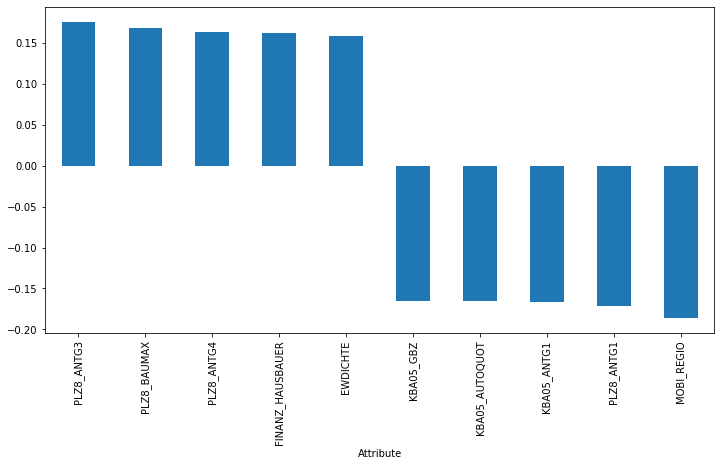

In [105]:
plot_pca_feature_importance('PC0',0)

In [107]:
most_important_features(customers_pca_feature_importance, attributes_val,1)

,PC1,Description
Attribute,,
KBA13_HERST_BMW_BENZ,0.175113,share of BMW & Mercedes Benz within the PLZ8
KBA13_SEG_OBEREMITTELKLASSE,0.149827,"share of upper middle class cars and upper class cars (BMW5er, BMW7er etc.)"
KBA13_KMH_211,0.145366,share of cars with a greater max speed than 210 km/h within the PLZ8
KBA13_MERCEDES,0.144604,share of MERCEDES within the PLZ8
KBA13_BMW,0.141647,share of BMW within the PLZ8
KBA13_HERST_FORD_OPEL,-0.127112,share of Ford & Opel/Vauxhall within the PLZ8
KBA13_SEG_KLEINWAGEN,-0.135918,"share of small and very small cars (Ford Fiesta, Ford Ka etc.) in the PLZ8"
KBA13_KMH_140_210,-0.142301,share of cars with max speed between 140 and 210 km/h within the PLZ8
KBA13_KW_0_60,-0.152916,share of cars up to 60 KW engine power - PLZ8


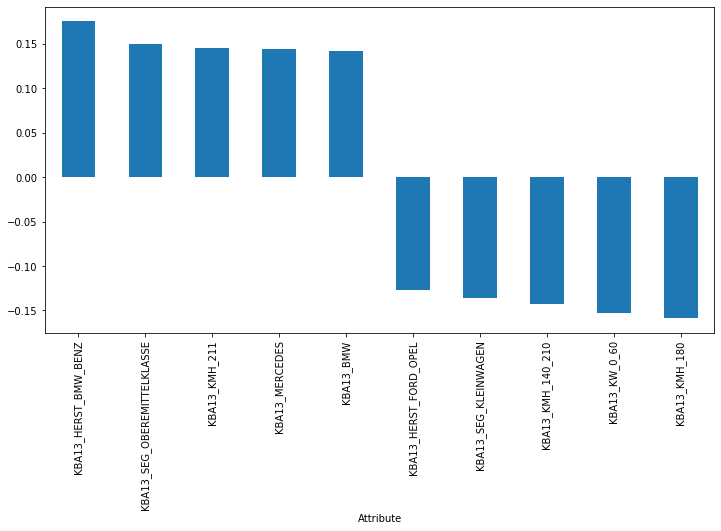

In [108]:
plot_pca_feature_importance('PC1',1)

PC1 has positive correlation with luxury cars and negative correlation with regular cars.

In [109]:
most_important_features(customers_pca_feature_importance,attributes_val, 2)

,PC2,Description
Attribute,,
ONLINE_AFFINITAET,0.198096,online affinity
PRAEGENDE_JUGENDJAHRE_GENERATION,0.192079,NaN
D19_GESAMT_ANZ_12,0.183983,transaction activity TOTAL POOL in the last 12 months
FINANZ_SPARER,0.180355,financial typology: money saver
ALTER_HH,0.161108,main age within the household
D19_TELKO_DATUM,-0.130662,actuality of the last transaction for the segment telecommunication TOTAL
D19_BANKEN_DATUM,-0.137297,actuality of the last transaction for the segment banks TOTAL
ALTERSKATEGORIE_GROB,-0.160761,age classification through prename analysis
FINANZ_VORSORGER,-0.172628,financial typology: be prepared


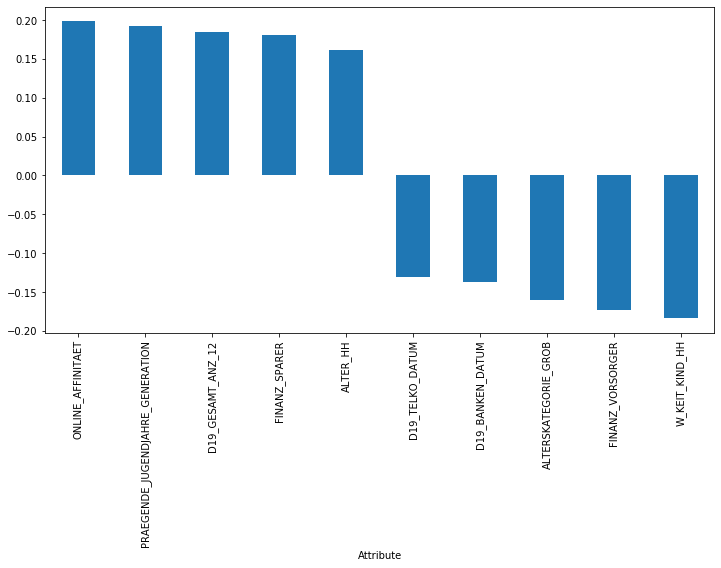

In [110]:
plot_pca_feature_importance('PC2',2)

PC2 has positive correlation with onine shoppers who are older

### Discussion 2.3: Interpret Principal Components

#### Dimension 1

- The first principal component is associated with households, surroundings, moving patterns and income / wealth level.
- Positive correlation between social status, household net income, and relatively larger family homes.
- Contrast this to a negative correlation with movement patterns smaller family homes, and low financial interest.


#### Dimension 2
The second principal component is positively associated with (top-down) luxury cars and negatively associated with regular cars within the PLZ8 region.

#### Dimension 3

It appears that the third component is influenced by transaction activites. It is positively corrrelated with transactions and negatively correlated with actuality of transactions.

### 1.2. Clustering
#### K-Means

Here we will apply the K-means clustering approach; a simple and elegant approach for partitioning a data set into K distinct, non-overlapping clusters.  First we have to specify the desired number of clusters K, we will use the elbow method; then the K-means algorithm will assign each observation to exactly one of the K clusters.

To determine the optimal number of clusters, we need to select K at the point that slope of the curve has sharp decrease. That is called "elbow".

In [111]:
import time
scores =[]
clusters = np.arange(3,16)
for i in clusters:
    start=time.time()
    model = KMeans(i)
    model.fit(azdias_reduced)
    # Score is sum of squared distances to a sample's assigned centroid
    scores.append(abs(model.score(azdias_reduced)))
    end = time.time()
    print(f'Running Score for {i} Clusters: {abs(model.score(azdias_reduced)):.3f}')
    print(f'Time taken: {end-start:.2f} seconds.')

Running Score for 3 Clusters: 168535372.389
Time taken: 283.66 seconds.
Running Score for 4 Clusters: 165340384.392
Time taken: 204.36 seconds.
Running Score for 5 Clusters: 162417523.274
Time taken: 209.78 seconds.
Running Score for 6 Clusters: 160478012.700
Time taken: 270.76 seconds.
Running Score for 7 Clusters: 158870181.750
Time taken: 356.50 seconds.
Running Score for 8 Clusters: 157596856.406
Time taken: 465.13 seconds.
Running Score for 9 Clusters: 156473202.431
Time taken: 575.67 seconds.
Running Score for 10 Clusters: 155632243.189
Time taken: 635.31 seconds.
Running Score for 11 Clusters: 154835817.205
Time taken: 838.06 seconds.
Running Score for 12 Clusters: 154129754.709
Time taken: 1031.51 seconds.
Running Score for 13 Clusters: 153410065.189
Time taken: 912.89 seconds.
Running Score for 14 Clusters: 152820149.635
Time taken: 902.09 seconds.
Running Score for 15 Clusters: 152290954.818
Time taken: 731.58 seconds.


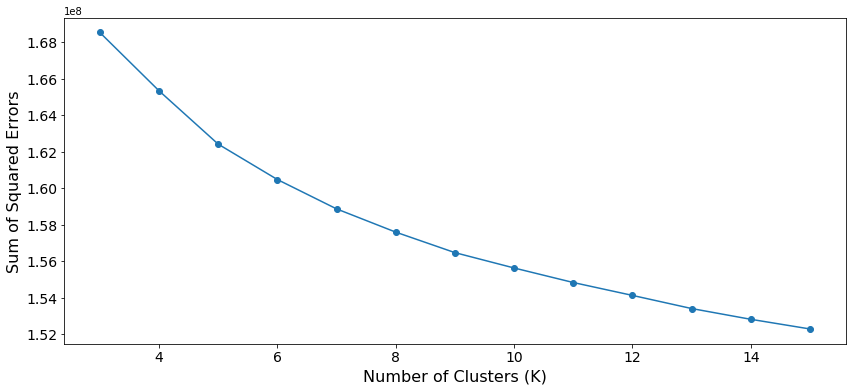

In [113]:
plt.figure(figsize=(14,6))
plt.plot(clusters,scores,marker="o")
plt.xlabel("Number of Clusters (K)", fontsize = 16)
plt.ylabel("Sum of Squared Errors",fontsize=16);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);


### Clustering for k=11

**General population**

In [114]:
# kmeans for clustering with n_clusters=11 and fit the model on PC from azdias data
km = KMeans(n_clusters=11)
km.fit(azdias_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [115]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Clustering result: Predictions

In [116]:
# predict azdias dataset
azdias_predicted = km.predict(azdias_reduced)
azdias_predicted.shape

(688712,)

In [117]:
# predict customer dataset
customer_predicted = km.predict(customers_reduced)
customer_predicted.shape

(122334,)

### 3.2.1. Comparing Customer Data to Demographics Data

So far, we have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. 

In this final substep, our goal will be to compare the two cluster distributions to see where the strongest customer base for the company is. 

Things we will consider:
- The proportion of persons in each cluster for the general population, and 
- The proportions for the customers. 


Now that we have both our demographics data and our customer data clustered let's compare them!

In [119]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
azdias_clusters = pd.Series(azdias_predicted)
azdias_clusters_value = azdias_clusters.value_counts().sort_index()
azdias_clusters_value = pd.Series(azdias_clusters_value)
#popc

customer_clusters = pd.Series(customer_predicted)
customers_clusters_value = customer_clusters.value_counts().sort_index()
customers_clusters_value = pd.Series(customers_clusters_value)
#custc



In [120]:
# Create a dataset summarizing clustering information
dem_clusters = pd.concat([azdias_clusters_value, customers_clusters_value], axis=1).reset_index()
dem_clusters.columns = ['cluster', 'general_population', 'customers']

# Sort by cluster (index)
dem_clusters.sort_index(inplace=True)

# Calculate proprotions
dem_clusters['cust_prop'] = dem_clusters['customers'] / dem_clusters['customers'].sum()
dem_clusters['gen_pop_prop'] = dem_clusters['general_population'] / dem_clusters['general_population'].sum()
dem_clusters['prop_diff'] = dem_clusters['gen_pop_prop'] - dem_clusters['cust_prop']
dem_clusters

,cluster,general_population,customers,cust_prop,gen_pop_prop,prop_diff
0,0,43297,10876,0.088904,0.062867,-0.026038
1,1,77960,10993,0.089861,0.113197,0.023336
2,2,93043,10869,0.088847,0.135097,0.046250
3,3,75981,11556,0.094463,0.110323,0.015861
4,4,49930,4500,0.036785,0.072498,0.035713
5,5,62357,8906,0.072801,0.090541,0.017741
6,6,62872,15991,0.130716,0.091289,-0.039427
7,7,62727,10078,0.082381,0.091079,0.008698
8,8,27520,2008,0.016414,0.039959,0.023545
9,9,88214,28604,0.233819,0.128085,-0.105733


#### Comment

The following points can be noted from the table above:
- The cluster assignment between general population and customers is fairly similar in cluster 8 where we note a cluster difference in proportion of 0.022% far less than 1% 

- Customers in clusters 0, 3 and 4 respectivly are overrepresented suggesting that they are target audience for the company. Customers in Cluster 3 with proportion difference of 10.56% is a stronger target, then cluster 4 and finally cluster 0. 

- On the other hand, customers in others clusters not mentioned above are underrepresented in the demographic data, which suggests that the group of persons to be outside of the target demographics. This is especially true for customers in cluster 0.

#### Plot of customer and azdias clusters

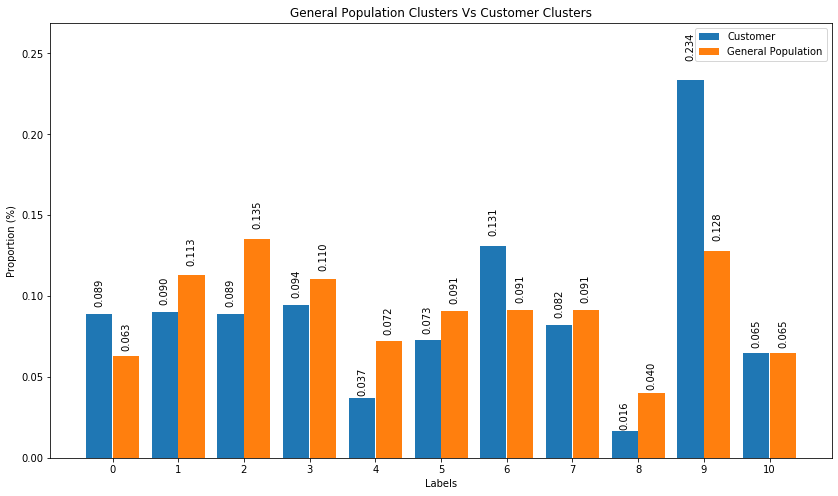

In [124]:
fig,ax = plt.subplots(figsize=(14,8))
width = 0.4

cust = ax.bar(dem_clusters['cust_prop'].index-.51*width,dem_clusters['cust_prop'], width)
gen = ax.bar(dem_clusters['gen_pop_prop'].index+.51*width, dem_clusters['gen_pop_prop'], width)





ax.set_ylabel('Proportion (%)')
ax.set_xlabel('Labels')
ax.set_title('General Population Clusters Vs Customer Clusters')
ax.set_xticks(dem_clusters['cust_prop'].index)
ax.set_ylim(top=max(dem_clusters['cust_prop'].append(dem_clusters['gen_pop_prop']))*1.15)
ax.legend(('Customer','General Population'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.3f' % float(height),
                ha='center', va='bottom',rotation=90)

autolabel(cust)
autolabel(gen)
#plt.savefig("add_text_bar_matplotlib_03.png", bbox_inches='tight')

#### Comment

From the figure ablove, we observe that Customer's population is overrepresented more in cluster 3 and underrepresented in cluster 1. Let us now see which PCA component has the highest influence on these labels/clusters. 

### Overrepresentation in customers data (Cluster 3)
Since we have determined that customer's in cluster 3 are overrepresented, we want to check which pricipal component axis has the higheest impact on this cluster.

In [125]:
centroid = km.cluster_centers_[9]
centroid_df = pd.DataFrame(centroid,columns=['pca_weights'])

# Sorting the centroid in descending absolute value order
    # Note indexes correspond to principal components
centroid_df.reindex(centroid_df.abs().sort_values('pca_weights',ascending=False).index).head()

,pca_weights
2,-2.791918
0,-1.941442
4,-1.263716
8,-1.006190
9,-0.892876


So the PC2 and PC0 has highest impact on cluster 9. Let us see a description of these PCA's in customers dataset

Calling on our function `most_important_features`

In [128]:
pd.set_option('display.max_rows', None)

In [127]:
most_important_features(customers_pca_feature_importance,attributes_val, 2)

,PC2,Description
Attribute,,
ONLINE_AFFINITAET,0.198096,online affinity
PRAEGENDE_JUGENDJAHRE_GENERATION,0.192079,NaN
D19_GESAMT_ANZ_12,0.183983,transaction activity TOTAL POOL in the last 12 months
FINANZ_SPARER,0.180355,financial typology: money saver
ALTER_HH,0.161108,main age within the household
D19_TELKO_DATUM,-0.130662,actuality of the last transaction for the segment telecommunication TOTAL
D19_BANKEN_DATUM,-0.137297,actuality of the last transaction for the segment banks TOTAL
ALTERSKATEGORIE_GROB,-0.160761,age classification through prename analysis
FINANZ_VORSORGER,-0.172628,financial typology: be prepared


In [128]:
most_important_features(customers_pca_feature_importance,attributes_val, 0)

,PC0,Description
Attribute,,
PLZ8_ANTG3,0.176224,number of 6-10 family houses in the PLZ8
PLZ8_BAUMAX,0.169044,most common building-type within the PLZ8
PLZ8_ANTG4,0.164153,number of >10 family houses in the PLZ8
FINANZ_HAUSBAUER,0.162514,financial typology: main focus is the own house
EWDICHTE,0.158531,density of inhabitants per square kilometer
KBA05_GBZ,-0.165371,number of buildings in the microcell
KBA05_AUTOQUOT,-0.165482,share of cars per household
KBA05_ANTG1,-0.166285,number of 1-2 family houses in the cell
PLZ8_ANTG1,-0.171066,number of 1-2 family houses in the PLZ8


PC 2 (negatively weighted by cluster 9)

- Positively explains customer's level of online affinity, different generations of customers, transaction activity TOTAL POOL, main age within househols, and money savers,

- Negatively explains likelihood of child present in househols, financial typology,  age classification, bank and telecommunications transactions 

PC 0 (negatively weighted by cluster 9)

- Positively explains customers who live innumbers of family hu the PLZ8 areas with 6-10 number of family houses, most common building types,  PLZ8 with >10 family houses

- Negatively explais mobility, PLZ 8 and microcells with 1-2 number of family houses.

It follows that cluster 9 reflects older and wealthier households who are money savers and likely live in bigger and wealthier areas in Germany.

### Underrepresentation in customers data (cluster 2)

In [129]:
centroid = km.cluster_centers_[2]
centroid_df = pd.DataFrame(centroid,columns=['pca_weights'])

# Sorting the centroid in descending absolute value order
    # Note indexes correspond to principal components
centroid_df.reindex(centroid_df.abs().sort_values('pca_weights',ascending=False).index).head()

,pca_weights
3,-3.241177
2,2.064174
4,1.309134
1,0.730154
5,-0.621248


So the PC3 and PC2 has highest impact on cluster 2. Let us see a description of these PCA's in customers dataset

In [131]:
most_important_features(customers_pca_feature_importance,attributes_val, 3)

,PC3,Description
Attribute,,
SEMIO_VERT,0.154656,affinity indicating in what way the person is dreamily
KBA05_VORB0,0.146969,share of cars with no preowner
GREEN_AVANTGARDE,0.133732,Green avantgarde
KBA13_SEG_KLEINST,0.130676,share of very small cars (Ford Ka etc.) in the PLZ8
KBA13_HERST_ASIEN,0.122854,share of Asian Manufacturers within the PLZ8
SEMIO_KAEM,-0.124541,affinity indicating in what way the person is of a fightfull attitude
SEMIO_KRIT,-0.130235,affinity indicating in what way the person is critical minded
KBA05_MAXVORB,-0.131818,most common preowner structure in the microcell
FINANZ_ANLEGER,-0.143316,financial typology: investor


In [132]:
most_important_features(customers_pca_feature_importance,attributes_val, 2)

,PC2,Description
Attribute,,
ONLINE_AFFINITAET,0.198096,online affinity
PRAEGENDE_JUGENDJAHRE_GENERATION,0.192079,NaN
D19_GESAMT_ANZ_12,0.183983,transaction activity TOTAL POOL in the last 12 months
FINANZ_SPARER,0.180355,financial typology: money saver
ALTER_HH,0.161108,main age within the household
D19_TELKO_DATUM,-0.130662,actuality of the last transaction for the segment telecommunication TOTAL
D19_BANKEN_DATUM,-0.137297,actuality of the last transaction for the segment banks TOTAL
ALTERSKATEGORIE_GROB,-0.160761,age classification through prename analysis
FINANZ_VORSORGER,-0.172628,financial typology: be prepared


PC 3 (negatively weighted by cluster 2)

- Positively explains wealthy customers of good behaviour and high dreams. 
- Negatively explains investors, poorer people with preowned cars etc

PC 2 (negatively weighted by cluster 3 but positively weighted by cluster 2)

- Positively explains customer's level of online affinity, different generations of customers, transaction activity TOTAL POOL, main age within househols, and money savers,

- Negatively explains likelihood of child present in househols, financial typology,  age classification, bank and telecommunications transactions 



My intuition suggests to me that cluster 9 reflects older and wealthier households that likely live in bigger and wealthier areas in Germany.

Cluster 2 is one of the clusters underrepresented, living in 6-10 family houses, saving money and preferring online shopping. They do not look like the perfect fit for a mail-order-sales company.



Create a dataframe by using inverse transform

In [133]:

cluster_clean = pd.DataFrame(azdias_pca.inverse_transform(km.cluster_centers_), 
                           columns=df_azdias_clean.columns)

In [134]:
cluster_clean

,AKT_DAT_KL,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,CJT_GESAMTTYP,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_OFFLINE_DATUM,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG3,KBA05_SEG4,KBA05_SEG7,KBA05_SEG8,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_6,KBA13_TOYOTA,KBA13_VORB_0,KBA13_VORB_1,KBA13_VORB_1_2,KBA13_VORB_2,KBA13_VORB_3,KKK,KONSUMNAEHE,LP_FAMILIE_FEIN,LP_STATUS_FEIN,MOBI_REGIO,NATIONALITAET_KZ,ONLINE_AFFINITAET,ORTSGR_KLS9,OST_WEST_KZ,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_GBZ,PLZ8_HHZ,REGIOTYP,RELAT_AB,RETOURTYP_BK_S,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT

## Part 2: Supervised Learning Model

Now that we've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, we can verify our model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [161]:
mailout_train = pd.read_csv('Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [162]:
print(mailout_train.shape)
mailout_train.head()

(42962, 367)


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LETZTER_KAUF_BRANCHE,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,

In [163]:
# number of responses in response column
mailout_train['RESPONSE'].value_counts()

0    42430
1      532
Name: RESPONSE, dtype: int64

In [164]:
# number of responses in response column
mailout_train['RESPONSE'].value_counts()/mailout_train.shape[0]

0    0.987617
1    0.012383
Name: RESPONSE, dtype: float64

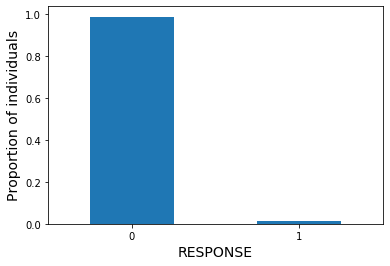

In [174]:
prop = mailout_train['RESPONSE'].value_counts()/mailout_train.shape[0]
prop.plot(kind="bar");
plt.ylabel("Proportion of individuals",fontsize=14)
plt.xlabel("RESPONSE",fontsize=14)
plt.xticks(rotation=360);

As we can see bar chart above, there is a huge difference between response (0) and no response (1). Our dataset is highly imbalanced. Therefore suitable evaluation metrics would be applied.

Before we proceed to build our model, we will pre-process the mailout_train. The data_preprocessing function is modified related to response column. Outliers in response columns are not dropped and response column is not scaled.

In [175]:
def data_preprocessing(df, df_name = None):
    """
    Perform cleaning of demographics dataset by converting data types, 
    dropping missing values in columns and rows, re-encoding variables, 
    computing missing values, removing outliers, dropping correlated features and standardizing
    
    INPUT: 
        df: Demographic dataset (DataFrame)
        df_name: Name of dataframe (str)
    
    Output:
        df_clean: Cleaned dataset (DataFrame)
    """
    # Get copy of df
    df_clean = df.copy()
    
    # Drop columns from customer dataset, which are not found in azdias dataset 
    if df_name == 'customers':
        df_clean.drop(columns= ['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'], inplace=True)
    
    #Drop some columns with no description in attributes_values dataset
    cols_with_no_desc =['ALTERSKATEGORIE_FEIN','ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 
                     'ALTER_KIND4', 'ARBEIT','CJT_KATALOGNUTZER','CJT_TYP_1', 'CJT_TYP_2',
                     'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6','EXTSEL992', 
                     'FIRMENDICHTE', 'GEMEINDETYP', 'KBA13_ANTG1','KBA13_ANTG2', 'KBA13_ANTG3',
                        'KBA13_ANTG4', 'KBA13_BAUMAX',
        'KBA13_GBZ','KBA13_HHZ','KOMBIALTER', 'KONSUMZELLE', 'MOBI_RASTER', 'RT_KEIN_ANREIZ', 
        'RT_SCHNAEPPCHEN', 'RT_UEBERGROESSE', 'STRUKTURTYP', 'UMFELD_ALT', 'UMFELD_JUNG',
        'UNGLEICHENN_FLAG', 'VERDICHTUNGSRAUM', 'VHA', 'VHN', 'VK_DHT4A', 'VK_DISTANZ', 
        'VK_ZG11']

    df_clean.drop(columns=cols_with_no_desc,inplace=True)

    
    def get_unknown_repr(df):
        """Returns the representation (a list) of unknown values
        INPUT:
            df: dataframe of all attributes with unknown/missing codes
        OUTPUT:
            a dataframe with two columns, all attributes and the corresponding list of missing codes.
        """
        unknown_val = []
        for attrib in df['Attribute'].unique():
            val = df[df["Attribute"] == attrib]["Value"].astype(str).str.cat(sep=",").split(',')
            unknown_val.append(val)
    
        attributes_unknown_or_missing = pd.concat([pd.Series(df['Attribute'].unique()), pd.Series(unknown_val)], axis=1)
        attributes_unknown_or_missing.columns = ['attribute', 'missing_or_unknown']
 
        return attributes_unknown_or_missing



    def missing_to_nan(df):
        """A function to replace all unknown/missing values in dataframe df with np.nan
    
        INPUT: 
            df - Pandas dataframe
        OUTPUT:
            df - with all unknown values replaced with np.nan
        """
        unknown_df = get_unknown_repr(missing_or_unknown_dias)
        for item in range (len (unknown_df['missing_or_unknown'])): 
            column_name = unknown_df.iloc[item]['attribute'] #saving column name
            for i in range(0, len(unknown_df['missing_or_unknown'][item])):
                unknown_df['missing_or_unknown'][item][i] = int(unknown_df['missing_or_unknown'][item][i])
            df[column_name].replace (to_replace = unknown_df['missing_or_unknown'][item], value = np.NaN, regex = True, inplace = True)
            return df
    
    df_clean = missing_to_nan(df_clean)
    
     
    # Drop columns which involve >= 60% missing values
    df_clean.drop(columns= ['AGER_TYP','KK_KUNDENTYP'],inplace=True)
    
    # Find the rows that include too many missing values and drop them if ratio of missing values more than 0.5
    df_row_nan_mean=df_clean.isnull().mean(axis=1)
    rows_to_drop=df_row_nan_mean[df_row_nan_mean>0.5].index
    df_clean.drop(rows_to_drop, inplace=True)
    
    #Engineer and re-encode features
    #convert datatypes in columns 18 and 19 to float
    #cols = ["CAMEO_DEUG_2015", "CAMEO_INTL_2015"]
    def fix_unknown(df):
        """
        Function to replace 'X', 'XX' in columns ['CAMEO_DEUG_2015', 'CAMEO_INTL_2015'] with np.nan 
    
        INPUT:
            df- dataframe in which the columns to be corrected exist.
        OUTPUT:
            df- dataframe with fixed column data types
        """
        cols = ["CAMEO_DEU_2015","CAMEO_DEUG_2015", "CAMEO_INTL_2015"]
    
        df[cols] = df[cols].replace({"X": np.nan, "XX": np.nan})
        df["CAMEO_DEUG_2015"] = df["CAMEO_DEUG_2015"].astype(float)
    
        return df

    df_clean = fix_unknown(df_clean)
    
    
    # Change dtype of EINGEFUEGT_AM column from object to datetime and extract only year
    df_clean["EINGEFUEGT_AM"]=pd.to_datetime(df_clean["EINGEFUEGT_AM"])
    df_clean["EINGEFUEGT_AM"]=pd.DatetimeIndex(df_clean["EINGEFUEGT_AM"]).year
      

    #df_clean = fix_cols_with_error_warning(df_clean)
    
    
    
   
    # getting dummy column for OST_WEST_KZ
    df_clean = df_clean.replace({'OST_WEST_KZ': {'W': 1, 'O': 0}})

    # Investigate "CAMEO_INTL_2015" and engineer two new variables.  
    # Wealth 
    def wealth(val):
        try:
    # In case value is NaN
            if pd.isnull(val):
                return np.nan
            else:
        # Return first digit
                return int(str(val)[0])
        except ValueError:
            return np.nan

# Life stage
    def lifestage(val):
        try:
    # In case value is NaN
            if pd.isnull(val):
                return np.nan
            else:
        # Return second digit
                return int(str(val)[1])
        except ValueError:
            return np.nan
        
        # Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
# Engineer wealth column
    df_clean['CAMEO_INTL_2015_WEALTH'] = df_clean['CAMEO_INTL_2015'].apply(wealth)

# Engineer life stage column
    df_clean['CAMEO_INTL_2015_LIFESTAGE'] = df_clean['CAMEO_INTL_2015'].apply(lifestage)


# Generation 
    generations = {0: [1, 2],  1: [3, 4], 2: [5, 6, 7], 3: [8, 9], 4: [10, 11, 12, 13], 5:[14, 15]} 

    def generation(val):
        try:
            for key, values in generations.items():
                if val in values:
                    return key
    # In case value is NaN
        except ValueError:
            return np.nan
    
# Movement 
    list_val = [1, 3, 5, 8, 10, 12, 14]

    def movement(val):
        try:
            if val in list_val:
                return 1
            else:
                return 0
    # In case value is NaN
        except ValueError:
            return np.nan
    
# Engineer generation column
    df_clean['PRAEGENDE_JUGENDJAHRE_GENERATION'] = df_clean['PRAEGENDE_JUGENDJAHRE'].apply(generation)

# Engineer movement column
    df_clean['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = df_clean['PRAEGENDE_JUGENDJAHRE'].apply(movement)

    #drop columns
    
    df_clean.drop(['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'],axis=1,inplace=True)

    
    # dropping columns that have too many features and the one with no description
    df_clean.drop(columns=["CAMEO_DEU_2015", "D19_LETZTER_KAUF_BRANCHE","LP_LEBENSPHASE_FEIN",'EINGEZOGENAM_HH_JAHR'], inplace=True)


    # Convert categorical column to encoded
    
    #df_clean=pd.get_dummies(df_clean, drop_first=True)
        
    # Impute missing values with mode value
    imputer = SimpleImputer(strategy='most_frequent')
    df_clean=pd.DataFrame(imputer.fit_transform(df_clean), columns = df_clean.columns)
    
    # Identify and remove 36 correlated features
    
    df_clean.drop(columns=['ANZ_STATISTISCHE_HAUSHALTE', 'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ONLINE_QUOTE_12',
                           'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM', 'D19_GESAMT_ONLINE_DATUM', 'D19_GESAMT_ONLINE_QUOTE_12',
                           'D19_KONSUMTYP_MAX', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_ANZ_24', 'D19_VERSAND_DATUM', 
                           'D19_VERSAND_ONLINE_DATUM', 'D19_VERSAND_ONLINE_QUOTE_12', 'KBA05_KRSAQUOT', 'KBA05_KRSHERST1',
                           'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_SEG2', 'KBA05_SEG5', 'KBA05_SEG6', 'KBA05_SEG9', 
                           'KBA05_ZUL4', 'KBA13_HALTER_40', 'KBA13_HALTER_55', 'KBA13_HALTER_66', 'KBA13_HERST_SONST',
                           'KBA13_KMH_250', 'KBA13_SITZE_5', 'KBA13_VW', 'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_GROB', 'LP_STATUS_GROB', 
                           'MIN_GEBAEUDEJAHR', 'ANREDE_KZ', 'CAMEO_INTL_2015_WEALTH', 'PRAEGENDE_JUGENDJAHRE_MOVEMENT'], inplace=True)
    
    # Remove outliers from dataset by using z score
    if "RESPONSE" in df_clean.columns:
        
        # drop RESPONSE and remove outliers from dataset by using z score 
        z = np.abs(stats.zscore(df_clean.drop(columns=['RESPONSE'])))
        df_clean = df_clean[(z < 6).all(axis=1)]
        df_clean.reset_index(drop=True, inplace=True)
        
        # Standardization of dataset
        lnr=df_clean['LNR']
        response=df_clean['RESPONSE']
        scaler = StandardScaler()    
        df_clean=pd.DataFrame(scaler.fit_transform(df_clean), columns = df_clean.columns)
        df_clean['RESPONSE']=response
        df_clean['LNR']=lnr
        
        
    else:
        # Remove outliers from dataset by using z score
        z = np.abs(stats.zscore(df_clean))
        df_clean = df_clean[(z < 6).all(axis=1)]
        df_clean.reset_index(drop=True, inplace=True)

        # Standardization of dataset
        lnr=df_clean['LNR']
        scaler = StandardScaler()
        df_clean=pd.DataFrame(scaler.fit_transform(df_clean), columns = df_clean.columns)
        df_clean['LNR']=lnr
   
    # set index LNR column
    df_clean.set_index("LNR", inplace=True)



    return df_clean

In [176]:
# preprocessing of train dataset
mailout_train_clean = data_preprocessing(mailout_train)

In [177]:
mailout_train_clean.shape

(30567, 287)

In [178]:
# number of responses in response column in cleaned train data
mailout_train_clean["RESPONSE"].value_counts()

0.0    30186
1.0      381
Name: RESPONSE, dtype: int64

In [180]:
prop = mailout_train_clean['RESPONSE'].value_counts()/mailout_train_clean.shape[0]
prop

0.0    0.987536
1.0    0.012464
Name: RESPONSE, dtype: float64

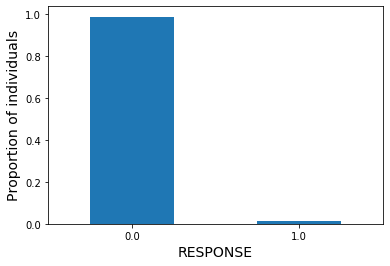

In [181]:
prop.plot(kind="bar");
plt.ylabel("Proportion of individuals",fontsize=14)
plt.xlabel("RESPONSE",fontsize=14)
plt.xticks(rotation=360);

### 2.2. Modelling

In [142]:
X = mailout_train_clean.drop(columns=['RESPONSE'])
y= mailout_train_clean['RESPONSE']

In [143]:
# spliting dataset as train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

It is requested to get probabilities rather than labels. So, we will use regression models instead of classification models.

#### 2.2.1. AUC-ROC XGBRegressor model

In [144]:
from sklearn.ensemble import RandomForestClassifier
#from xgboost.sklearn import XGBRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score

In [145]:
# fitting XGBRegressor model with train dataset
eval_set = [(X_train, y_train), (X_test, y_test)]
clf_reg = xgb.XGBRegressor(n_estimators=200, learning_rate=0.01)
clf_reg.fit(X_train, y_train, eval_set=eval_set,
          eval_metric="auc", verbose=True, early_stopping_rounds=100)

[0]	validation_0-auc:0.80520	validation_1-auc:0.74552
[1]	validation_0-auc:0.80522	validation_1-auc:0.74552
[2]	validation_0-auc:0.80768	validation_1-auc:0.74443
[3]	validation_0-auc:0.80764	validation_1-auc:0.74436
[4]	validation_0-auc:0.80755	validation_1-auc:0.74427
[5]	validation_0-auc:0.80764	validation_1-auc:0.74436
[6]	validation_0-auc:0.80755	validation_1-auc:0.74427
[7]	validation_0-auc:0.81228	validation_1-auc:0.74397
[8]	validation_0-auc:0.81220	validation_1-auc:0.74436
[9]	validation_0-auc:0.81228	validation_1-auc:0.74397
[10]	validation_0-auc:0.81540	validation_1-auc:0.74923
[11]	validation_0-auc:0.81537	validation_1-auc:0.74912
[12]	validation_0-auc:0.81651	validation_1-auc:0.75042
[13]	validation_0-auc:0.81575	validation_1-auc:0.75312
[14]	validation_0-auc:0.81796	validation_1-auc:0.75134
[15]	validation_0-auc:0.81678	validation_1-auc:0.75472
[16]	validation_0-auc:0.82115	validation_1-auc:0.75465
[17]	validation_0-auc:0.82130	validation_1-auc:0.75462
[18]	validation_0-au

[149]	validation_0-auc:0.95669	validation_1-auc:0.78003
[150]	validation_0-auc:0.95732	validation_1-auc:0.78032
[151]	validation_0-auc:0.95812	validation_1-auc:0.78024
[152]	validation_0-auc:0.95859	validation_1-auc:0.78138
[153]	validation_0-auc:0.95913	validation_1-auc:0.78035
[154]	validation_0-auc:0.95943	validation_1-auc:0.78047
[155]	validation_0-auc:0.95975	validation_1-auc:0.78136
[156]	validation_0-auc:0.95994	validation_1-auc:0.78109
[157]	validation_0-auc:0.96007	validation_1-auc:0.78012
[158]	validation_0-auc:0.96029	validation_1-auc:0.77858
[159]	validation_0-auc:0.96035	validation_1-auc:0.77780
[160]	validation_0-auc:0.96046	validation_1-auc:0.77710
[161]	validation_0-auc:0.96051	validation_1-auc:0.77700
[162]	validation_0-auc:0.96088	validation_1-auc:0.77880
[163]	validation_0-auc:0.96095	validation_1-auc:0.77827
[164]	validation_0-auc:0.96104	validation_1-auc:0.77764
[165]	validation_0-auc:0.96146	validation_1-auc:0.77553
[166]	validation_0-auc:0.96379	validation_1-auc:

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [146]:
roc_auc_score(y_train, clf_reg.predict(X_train))

0.9585861374960115

In [147]:
# roc_auc score for test data
roc_auc_score(y_test, clf_reg.predict(X_test))

0.7813769067080325

In [148]:
def plot_roc_curve(classifier, X_train, X_test, y_train, y_test):
    """
    Plot train and test roc curve for the classifier 
    
    Input: 
    X_train, X_test: Train and test dataset (DataFrame)
    y_train, y_test: Train and test labels (array)
    
    Output:
    return None
    """
    # predicted values for train and test datasets
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    
    # False positive and true positive rates calculation for predicted values
    fpr_train, tpr_train, _train = roc_curve(y_train,  y_pred_train)
    fpr_test, tpr_test, _test = roc_curve(y_test,  y_pred_test)
    
    # calculation of auc scores
    auc_train = round(roc_auc_score(y_train, y_pred_train),2)
    auc_test = round(roc_auc_score(y_test, y_pred_test),2)
      
    # plot
    plt.plot(fpr_train, tpr_train, label="Train ROC curve area = "+ str(auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC curve area = "+ str(auc_test))
    
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')


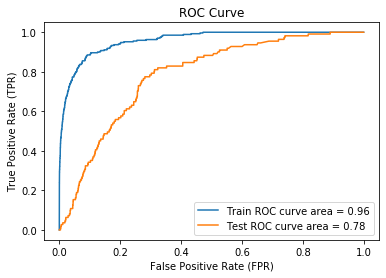

In [149]:
plot_roc_curve(clf_reg, X_train, X_test, y_train, y_test)

#### 2.2.3. Feature importance
We can see most important features by using plot_importance of xgboost. First 20 features are plotted in bar graph.

Text(0.5, 0, 'Feature Importance')

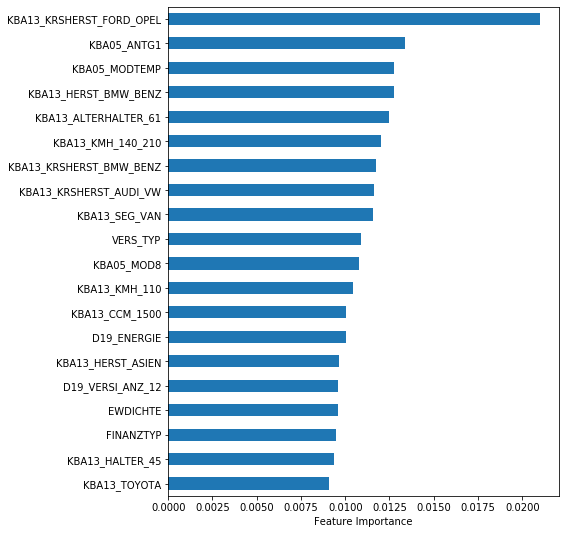

In [160]:
imp_features = clf_reg.feature_importances_

pd.Series(imp_features, index=X_train.columns).sort_values()[-20:].plot(kind='barh', figsize=(7,9))
plt.xlabel('Feature Importance');

#### 2.2.4. Improve the model

Fine tunning by using random search
RandomizedSearchCV from sklearn selects random combinations and mostly it finds best parameters in shorter time than grid search which is exhaustive search over specified parameters.

In [151]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [159]:
# create model with certain parameters
xgb_reg2 = xgb.XGBRegressor(learning_rate=0.02, n_estimators=500, objective='binary:logistic',
                nthread=1)

In [160]:
# create random search with the model in roc auc score and wtih 4-fold cross validation
random_search = RandomizedSearchCV(xgb_reg2, params, scoring='roc_auc', cv=4)

# fitting model
random_search = random_search.fit(X, y, eval_set=eval_set, eval_metric="auc", verbose=True, early_stopping_rounds=30)

[0]	validation_0-auc:0.76925	validation_1-auc:0.74963
[1]	validation_0-auc:0.76925	validation_1-auc:0.74963
[2]	validation_0-auc:0.76925	validation_1-auc:0.74963
[3]	validation_0-auc:0.76925	validation_1-auc:0.74963
[4]	validation_0-auc:0.76925	validation_1-auc:0.74963
[5]	validation_0-auc:0.76925	validation_1-auc:0.74963
[6]	validation_0-auc:0.76925	validation_1-auc:0.74963
[7]	validation_0-auc:0.76925	validation_1-auc:0.74963
[8]	validation_0-auc:0.76925	validation_1-auc:0.74963
[9]	validation_0-auc:0.76925	validation_1-auc:0.74963
[10]	validation_0-auc:0.76925	validation_1-auc:0.74963
[11]	validation_0-auc:0.76925	validation_1-auc:0.74963
[12]	validation_0-auc:0.76925	validation_1-auc:0.74963
[13]	validation_0-auc:0.76925	validation_1-auc:0.74963
[14]	validation_0-auc:0.76925	validation_1-auc:0.74963
[15]	validation_0-auc:0.76925	validation_1-auc:0.74963
[16]	validation_0-auc:0.76925	validation_1-auc:0.74963
[17]	validation_0-auc:0.76925	validation_1-auc:0.74963
[18]	validation_0-au

[29]	validation_0-auc:0.79028	validation_1-auc:0.77066
[30]	validation_0-auc:0.79028	validation_1-auc:0.77066
[31]	validation_0-auc:0.79034	validation_1-auc:0.77020
[32]	validation_0-auc:0.79034	validation_1-auc:0.77020
[33]	validation_0-auc:0.79034	validation_1-auc:0.77020
[34]	validation_0-auc:0.78809	validation_1-auc:0.76520
[35]	validation_0-auc:0.79190	validation_1-auc:0.76968
[36]	validation_0-auc:0.79190	validation_1-auc:0.76968
[37]	validation_0-auc:0.79144	validation_1-auc:0.77309
[38]	validation_0-auc:0.79144	validation_1-auc:0.77309
[39]	validation_0-auc:0.79374	validation_1-auc:0.77790
[40]	validation_0-auc:0.79544	validation_1-auc:0.77723
[41]	validation_0-auc:0.79770	validation_1-auc:0.77989
[42]	validation_0-auc:0.80038	validation_1-auc:0.78173
[43]	validation_0-auc:0.80045	validation_1-auc:0.78253
[44]	validation_0-auc:0.80213	validation_1-auc:0.78322
[45]	validation_0-auc:0.80445	validation_1-auc:0.78481
[46]	validation_0-auc:0.80695	validation_1-auc:0.78461
[47]	valid

[177]	validation_0-auc:0.86977	validation_1-auc:0.87688
[178]	validation_0-auc:0.86968	validation_1-auc:0.87662
[179]	validation_0-auc:0.87038	validation_1-auc:0.87677
[180]	validation_0-auc:0.87059	validation_1-auc:0.87767
[181]	validation_0-auc:0.87077	validation_1-auc:0.87764
[182]	validation_0-auc:0.87116	validation_1-auc:0.87804
[183]	validation_0-auc:0.87098	validation_1-auc:0.87778
[184]	validation_0-auc:0.87084	validation_1-auc:0.87848
[185]	validation_0-auc:0.87208	validation_1-auc:0.87910
[186]	validation_0-auc:0.87206	validation_1-auc:0.87897
[187]	validation_0-auc:0.87182	validation_1-auc:0.87866
[188]	validation_0-auc:0.87186	validation_1-auc:0.87898
[189]	validation_0-auc:0.87211	validation_1-auc:0.87866
[190]	validation_0-auc:0.87311	validation_1-auc:0.87949
[191]	validation_0-auc:0.87275	validation_1-auc:0.87998
[192]	validation_0-auc:0.87269	validation_1-auc:0.88022
[193]	validation_0-auc:0.87289	validation_1-auc:0.88130
[194]	validation_0-auc:0.87286	validation_1-auc:

[324]	validation_0-auc:0.89527	validation_1-auc:0.90753
[325]	validation_0-auc:0.89545	validation_1-auc:0.90801
[326]	validation_0-auc:0.89589	validation_1-auc:0.90805
[327]	validation_0-auc:0.89597	validation_1-auc:0.90861
[328]	validation_0-auc:0.89621	validation_1-auc:0.90875
[329]	validation_0-auc:0.89623	validation_1-auc:0.90915
[330]	validation_0-auc:0.89649	validation_1-auc:0.90970
[331]	validation_0-auc:0.89694	validation_1-auc:0.91051
[332]	validation_0-auc:0.89730	validation_1-auc:0.91091
[333]	validation_0-auc:0.89737	validation_1-auc:0.91119
[334]	validation_0-auc:0.89739	validation_1-auc:0.91120
[335]	validation_0-auc:0.89765	validation_1-auc:0.91174
[336]	validation_0-auc:0.89780	validation_1-auc:0.91178
[337]	validation_0-auc:0.89802	validation_1-auc:0.91238
[338]	validation_0-auc:0.89824	validation_1-auc:0.91260
[339]	validation_0-auc:0.89828	validation_1-auc:0.91270
[340]	validation_0-auc:0.89838	validation_1-auc:0.91254
[341]	validation_0-auc:0.89834	validation_1-auc:

[471]	validation_0-auc:0.91665	validation_1-auc:0.93650
[472]	validation_0-auc:0.91658	validation_1-auc:0.93692
[473]	validation_0-auc:0.91652	validation_1-auc:0.93702
[474]	validation_0-auc:0.91672	validation_1-auc:0.93730
[475]	validation_0-auc:0.91687	validation_1-auc:0.93763
[476]	validation_0-auc:0.91705	validation_1-auc:0.93826
[477]	validation_0-auc:0.91726	validation_1-auc:0.93859
[478]	validation_0-auc:0.91736	validation_1-auc:0.93871
[479]	validation_0-auc:0.91755	validation_1-auc:0.93868
[480]	validation_0-auc:0.91753	validation_1-auc:0.93907
[481]	validation_0-auc:0.91763	validation_1-auc:0.93929
[482]	validation_0-auc:0.91772	validation_1-auc:0.93966
[483]	validation_0-auc:0.91788	validation_1-auc:0.93994
[484]	validation_0-auc:0.91804	validation_1-auc:0.94007
[485]	validation_0-auc:0.91808	validation_1-auc:0.94017
[486]	validation_0-auc:0.91816	validation_1-auc:0.94046
[487]	validation_0-auc:0.91850	validation_1-auc:0.94049
[488]	validation_0-auc:0.91872	validation_1-auc:

[120]	validation_0-auc:0.86155	validation_1-auc:0.83748
[121]	validation_0-auc:0.86079	validation_1-auc:0.83793
[122]	validation_0-auc:0.86022	validation_1-auc:0.83849
[123]	validation_0-auc:0.86055	validation_1-auc:0.83937
[124]	validation_0-auc:0.86346	validation_1-auc:0.84118
[125]	validation_0-auc:0.86388	validation_1-auc:0.84226
[126]	validation_0-auc:0.86403	validation_1-auc:0.84292
[127]	validation_0-auc:0.86509	validation_1-auc:0.84351
[128]	validation_0-auc:0.86499	validation_1-auc:0.84331
[129]	validation_0-auc:0.86521	validation_1-auc:0.84315
[130]	validation_0-auc:0.86517	validation_1-auc:0.84376
[131]	validation_0-auc:0.86506	validation_1-auc:0.84404
[132]	validation_0-auc:0.86607	validation_1-auc:0.84457
[133]	validation_0-auc:0.86625	validation_1-auc:0.84478
[134]	validation_0-auc:0.86711	validation_1-auc:0.84526
[135]	validation_0-auc:0.86858	validation_1-auc:0.84704
[136]	validation_0-auc:0.86859	validation_1-auc:0.84682
[137]	validation_0-auc:0.86874	validation_1-auc:

[267]	validation_0-auc:0.89677	validation_1-auc:0.87373
[268]	validation_0-auc:0.89706	validation_1-auc:0.87367
[269]	validation_0-auc:0.89706	validation_1-auc:0.87368
[270]	validation_0-auc:0.89713	validation_1-auc:0.87423
[271]	validation_0-auc:0.89730	validation_1-auc:0.87491
[272]	validation_0-auc:0.89731	validation_1-auc:0.87514
[273]	validation_0-auc:0.89736	validation_1-auc:0.87548
[274]	validation_0-auc:0.89757	validation_1-auc:0.87576
[275]	validation_0-auc:0.89780	validation_1-auc:0.87635
[276]	validation_0-auc:0.89814	validation_1-auc:0.87672
[277]	validation_0-auc:0.89813	validation_1-auc:0.87670
[278]	validation_0-auc:0.89851	validation_1-auc:0.87706
[279]	validation_0-auc:0.89861	validation_1-auc:0.87690
[280]	validation_0-auc:0.89872	validation_1-auc:0.87701
[281]	validation_0-auc:0.89904	validation_1-auc:0.87700
[282]	validation_0-auc:0.89922	validation_1-auc:0.87739
[283]	validation_0-auc:0.89912	validation_1-auc:0.87749
[284]	validation_0-auc:0.89911	validation_1-auc:

[414]	validation_0-auc:0.91634	validation_1-auc:0.89129
[415]	validation_0-auc:0.91654	validation_1-auc:0.89145
[416]	validation_0-auc:0.91664	validation_1-auc:0.89135
[417]	validation_0-auc:0.91677	validation_1-auc:0.89155
[418]	validation_0-auc:0.91687	validation_1-auc:0.89199
[419]	validation_0-auc:0.91680	validation_1-auc:0.89190
[420]	validation_0-auc:0.91694	validation_1-auc:0.89170
[421]	validation_0-auc:0.91709	validation_1-auc:0.89182
[422]	validation_0-auc:0.91710	validation_1-auc:0.89204
[423]	validation_0-auc:0.91736	validation_1-auc:0.89217
[424]	validation_0-auc:0.91749	validation_1-auc:0.89262
[425]	validation_0-auc:0.91763	validation_1-auc:0.89262
[426]	validation_0-auc:0.91772	validation_1-auc:0.89255
[427]	validation_0-auc:0.91786	validation_1-auc:0.89255
[428]	validation_0-auc:0.91799	validation_1-auc:0.89248
[429]	validation_0-auc:0.91803	validation_1-auc:0.89245
[430]	validation_0-auc:0.91829	validation_1-auc:0.89238
[431]	validation_0-auc:0.91840	validation_1-auc:

[62]	validation_0-auc:0.82820	validation_1-auc:0.80277
[63]	validation_0-auc:0.82820	validation_1-auc:0.80277
[64]	validation_0-auc:0.82770	validation_1-auc:0.80186
[65]	validation_0-auc:0.83007	validation_1-auc:0.80287
[66]	validation_0-auc:0.82916	validation_1-auc:0.80174
[67]	validation_0-auc:0.82878	validation_1-auc:0.80111
[68]	validation_0-auc:0.82878	validation_1-auc:0.80111
[69]	validation_0-auc:0.82994	validation_1-auc:0.79992
[70]	validation_0-auc:0.83140	validation_1-auc:0.80484
[71]	validation_0-auc:0.83157	validation_1-auc:0.80410
[72]	validation_0-auc:0.83244	validation_1-auc:0.80562
[73]	validation_0-auc:0.83140	validation_1-auc:0.80703
[74]	validation_0-auc:0.83104	validation_1-auc:0.80616
[75]	validation_0-auc:0.83434	validation_1-auc:0.80664
[76]	validation_0-auc:0.83414	validation_1-auc:0.80774
[77]	validation_0-auc:0.83395	validation_1-auc:0.80773
[78]	validation_0-auc:0.83363	validation_1-auc:0.80743
[79]	validation_0-auc:0.83654	validation_1-auc:0.80917
[80]	valid

[209]	validation_0-auc:0.89665	validation_1-auc:0.87408
[210]	validation_0-auc:0.89632	validation_1-auc:0.87366
[211]	validation_0-auc:0.89666	validation_1-auc:0.87361
[212]	validation_0-auc:0.89717	validation_1-auc:0.87384
[213]	validation_0-auc:0.89796	validation_1-auc:0.87569
[214]	validation_0-auc:0.89800	validation_1-auc:0.87590
[215]	validation_0-auc:0.89800	validation_1-auc:0.87588
[216]	validation_0-auc:0.89845	validation_1-auc:0.87641
[217]	validation_0-auc:0.89831	validation_1-auc:0.87652
[218]	validation_0-auc:0.89825	validation_1-auc:0.87624
[219]	validation_0-auc:0.89807	validation_1-auc:0.87608
[220]	validation_0-auc:0.89783	validation_1-auc:0.87680
[221]	validation_0-auc:0.89782	validation_1-auc:0.87653
[222]	validation_0-auc:0.89793	validation_1-auc:0.87629
[223]	validation_0-auc:0.89814	validation_1-auc:0.87670
[224]	validation_0-auc:0.89856	validation_1-auc:0.87650
[225]	validation_0-auc:0.89845	validation_1-auc:0.87678
[226]	validation_0-auc:0.89841	validation_1-auc:

[356]	validation_0-auc:0.92012	validation_1-auc:0.89265
[357]	validation_0-auc:0.92046	validation_1-auc:0.89252
[358]	validation_0-auc:0.92068	validation_1-auc:0.89311
[359]	validation_0-auc:0.92093	validation_1-auc:0.89340
[360]	validation_0-auc:0.92090	validation_1-auc:0.89340
[361]	validation_0-auc:0.92146	validation_1-auc:0.89405
[362]	validation_0-auc:0.92149	validation_1-auc:0.89441
[363]	validation_0-auc:0.92179	validation_1-auc:0.89459
[364]	validation_0-auc:0.92195	validation_1-auc:0.89486
[365]	validation_0-auc:0.92228	validation_1-auc:0.89518
[366]	validation_0-auc:0.92253	validation_1-auc:0.89561
[367]	validation_0-auc:0.92270	validation_1-auc:0.89564
[368]	validation_0-auc:0.92286	validation_1-auc:0.89588
[369]	validation_0-auc:0.92286	validation_1-auc:0.89613
[370]	validation_0-auc:0.92316	validation_1-auc:0.89617
[371]	validation_0-auc:0.92334	validation_1-auc:0.89629
[372]	validation_0-auc:0.92365	validation_1-auc:0.89736
[373]	validation_0-auc:0.92412	validation_1-auc:

[3]	validation_0-auc:0.77326	validation_1-auc:0.74890
[4]	validation_0-auc:0.77326	validation_1-auc:0.74890
[5]	validation_0-auc:0.77326	validation_1-auc:0.74890
[6]	validation_0-auc:0.77326	validation_1-auc:0.74890
[7]	validation_0-auc:0.77326	validation_1-auc:0.74890
[8]	validation_0-auc:0.77326	validation_1-auc:0.74890
[9]	validation_0-auc:0.77530	validation_1-auc:0.74893
[10]	validation_0-auc:0.77326	validation_1-auc:0.74890
[11]	validation_0-auc:0.77326	validation_1-auc:0.74890
[12]	validation_0-auc:0.77328	validation_1-auc:0.74892
[13]	validation_0-auc:0.77328	validation_1-auc:0.74892
[14]	validation_0-auc:0.77328	validation_1-auc:0.74892
[15]	validation_0-auc:0.77328	validation_1-auc:0.74892
[16]	validation_0-auc:0.77656	validation_1-auc:0.75889
[17]	validation_0-auc:0.77656	validation_1-auc:0.75889
[18]	validation_0-auc:0.77656	validation_1-auc:0.75889
[19]	validation_0-auc:0.77656	validation_1-auc:0.75889
[20]	validation_0-auc:0.77451	validation_1-auc:0.75886
[21]	validation_0

[152]	validation_0-auc:0.89042	validation_1-auc:0.86475
[153]	validation_0-auc:0.89104	validation_1-auc:0.86575
[154]	validation_0-auc:0.89149	validation_1-auc:0.86629
[155]	validation_0-auc:0.89190	validation_1-auc:0.86781
[156]	validation_0-auc:0.89220	validation_1-auc:0.86840
[157]	validation_0-auc:0.89201	validation_1-auc:0.86838
[158]	validation_0-auc:0.89155	validation_1-auc:0.86747
[159]	validation_0-auc:0.89246	validation_1-auc:0.86840
[160]	validation_0-auc:0.89261	validation_1-auc:0.86841
[161]	validation_0-auc:0.89304	validation_1-auc:0.86832
[162]	validation_0-auc:0.89313	validation_1-auc:0.86830
[163]	validation_0-auc:0.89331	validation_1-auc:0.86831
[164]	validation_0-auc:0.89402	validation_1-auc:0.86843
[165]	validation_0-auc:0.89410	validation_1-auc:0.86920
[166]	validation_0-auc:0.89414	validation_1-auc:0.86939
[167]	validation_0-auc:0.89340	validation_1-auc:0.86912
[168]	validation_0-auc:0.89408	validation_1-auc:0.86990
[169]	validation_0-auc:0.89471	validation_1-auc:

[299]	validation_0-auc:0.91537	validation_1-auc:0.90441
[300]	validation_0-auc:0.91550	validation_1-auc:0.90462
[301]	validation_0-auc:0.91578	validation_1-auc:0.90476
[302]	validation_0-auc:0.91589	validation_1-auc:0.90457
[303]	validation_0-auc:0.91614	validation_1-auc:0.90443
[304]	validation_0-auc:0.91619	validation_1-auc:0.90472
[305]	validation_0-auc:0.91632	validation_1-auc:0.90507
[306]	validation_0-auc:0.91634	validation_1-auc:0.90518
[307]	validation_0-auc:0.91695	validation_1-auc:0.90542
[308]	validation_0-auc:0.91703	validation_1-auc:0.90583
[309]	validation_0-auc:0.91704	validation_1-auc:0.90620
[310]	validation_0-auc:0.91711	validation_1-auc:0.90650
[311]	validation_0-auc:0.91720	validation_1-auc:0.90669
[312]	validation_0-auc:0.91713	validation_1-auc:0.90675
[313]	validation_0-auc:0.91738	validation_1-auc:0.90676
[314]	validation_0-auc:0.91761	validation_1-auc:0.90688
[315]	validation_0-auc:0.91777	validation_1-auc:0.90662
[316]	validation_0-auc:0.91794	validation_1-auc:

[446]	validation_0-auc:0.94064	validation_1-auc:0.92885
[447]	validation_0-auc:0.94127	validation_1-auc:0.92913
[448]	validation_0-auc:0.94161	validation_1-auc:0.92938
[449]	validation_0-auc:0.94184	validation_1-auc:0.92971
[450]	validation_0-auc:0.94199	validation_1-auc:0.92979
[451]	validation_0-auc:0.94208	validation_1-auc:0.92974
[452]	validation_0-auc:0.94211	validation_1-auc:0.93007
[453]	validation_0-auc:0.94218	validation_1-auc:0.93015
[454]	validation_0-auc:0.94249	validation_1-auc:0.93057
[455]	validation_0-auc:0.94260	validation_1-auc:0.93072
[456]	validation_0-auc:0.94259	validation_1-auc:0.93072
[457]	validation_0-auc:0.94278	validation_1-auc:0.93136
[458]	validation_0-auc:0.94267	validation_1-auc:0.93125
[459]	validation_0-auc:0.94292	validation_1-auc:0.93154
[460]	validation_0-auc:0.94316	validation_1-auc:0.93192
[461]	validation_0-auc:0.94320	validation_1-auc:0.93230
[462]	validation_0-auc:0.94320	validation_1-auc:0.93224
[463]	validation_0-auc:0.94334	validation_1-auc:

[5]	validation_0-auc:0.77130	validation_1-auc:0.74966
[6]	validation_0-auc:0.77130	validation_1-auc:0.74966
[7]	validation_0-auc:0.77130	validation_1-auc:0.74966
[8]	validation_0-auc:0.77130	validation_1-auc:0.74966
[9]	validation_0-auc:0.77130	validation_1-auc:0.74966
[10]	validation_0-auc:0.77130	validation_1-auc:0.74966
[11]	validation_0-auc:0.77130	validation_1-auc:0.74966
[12]	validation_0-auc:0.77130	validation_1-auc:0.74966
[13]	validation_0-auc:0.77130	validation_1-auc:0.74966
[14]	validation_0-auc:0.77130	validation_1-auc:0.74966
[15]	validation_0-auc:0.77130	validation_1-auc:0.74966
[16]	validation_0-auc:0.77130	validation_1-auc:0.74966
[17]	validation_0-auc:0.77130	validation_1-auc:0.74966
[18]	validation_0-auc:0.77130	validation_1-auc:0.74966
[19]	validation_0-auc:0.77130	validation_1-auc:0.74966
[20]	validation_0-auc:0.77130	validation_1-auc:0.74966
[21]	validation_0-auc:0.77130	validation_1-auc:0.74966
[22]	validation_0-auc:0.77130	validation_1-auc:0.74966
[23]	validation

[124]	validation_0-auc:0.83159	validation_1-auc:0.79618
[125]	validation_0-auc:0.83204	validation_1-auc:0.79757
[126]	validation_0-auc:0.83173	validation_1-auc:0.79843
[127]	validation_0-auc:0.83195	validation_1-auc:0.80058
[128]	validation_0-auc:0.83231	validation_1-auc:0.80201
[129]	validation_0-auc:0.83306	validation_1-auc:0.80230
[130]	validation_0-auc:0.83346	validation_1-auc:0.80342
[131]	validation_0-auc:0.83447	validation_1-auc:0.80333
[132]	validation_0-auc:0.83379	validation_1-auc:0.80345
[133]	validation_0-auc:0.83422	validation_1-auc:0.80358
[134]	validation_0-auc:0.83403	validation_1-auc:0.80407
[135]	validation_0-auc:0.83399	validation_1-auc:0.80361
[136]	validation_0-auc:0.83405	validation_1-auc:0.80321
[137]	validation_0-auc:0.83381	validation_1-auc:0.80324
[138]	validation_0-auc:0.83397	validation_1-auc:0.80358
[139]	validation_0-auc:0.83424	validation_1-auc:0.80284
[140]	validation_0-auc:0.83426	validation_1-auc:0.80321
[141]	validation_0-auc:0.83458	validation_1-auc:

[271]	validation_0-auc:0.87798	validation_1-auc:0.88003
[272]	validation_0-auc:0.87812	validation_1-auc:0.88002
[273]	validation_0-auc:0.87871	validation_1-auc:0.88146
[274]	validation_0-auc:0.87959	validation_1-auc:0.88257
[275]	validation_0-auc:0.87985	validation_1-auc:0.88271
[276]	validation_0-auc:0.88027	validation_1-auc:0.88380
[277]	validation_0-auc:0.88038	validation_1-auc:0.88368
[278]	validation_0-auc:0.88054	validation_1-auc:0.88417
[279]	validation_0-auc:0.88106	validation_1-auc:0.88465
[280]	validation_0-auc:0.88151	validation_1-auc:0.88528
[281]	validation_0-auc:0.88152	validation_1-auc:0.88533
[282]	validation_0-auc:0.88157	validation_1-auc:0.88542
[283]	validation_0-auc:0.88153	validation_1-auc:0.88538
[284]	validation_0-auc:0.88159	validation_1-auc:0.88575
[285]	validation_0-auc:0.88196	validation_1-auc:0.88594
[286]	validation_0-auc:0.88201	validation_1-auc:0.88592
[287]	validation_0-auc:0.88251	validation_1-auc:0.88650
[288]	validation_0-auc:0.88263	validation_1-auc:

[418]	validation_0-auc:0.91008	validation_1-auc:0.92149
[419]	validation_0-auc:0.91012	validation_1-auc:0.92154
[420]	validation_0-auc:0.91004	validation_1-auc:0.92179
[421]	validation_0-auc:0.91032	validation_1-auc:0.92181
[422]	validation_0-auc:0.91050	validation_1-auc:0.92205
[423]	validation_0-auc:0.91063	validation_1-auc:0.92226
[424]	validation_0-auc:0.91088	validation_1-auc:0.92235
[425]	validation_0-auc:0.91108	validation_1-auc:0.92291
[426]	validation_0-auc:0.91110	validation_1-auc:0.92304
[427]	validation_0-auc:0.91126	validation_1-auc:0.92301
[428]	validation_0-auc:0.91131	validation_1-auc:0.92317
[429]	validation_0-auc:0.91137	validation_1-auc:0.92330
[430]	validation_0-auc:0.91144	validation_1-auc:0.92334
[431]	validation_0-auc:0.91170	validation_1-auc:0.92351
[432]	validation_0-auc:0.91181	validation_1-auc:0.92372
[433]	validation_0-auc:0.91200	validation_1-auc:0.92381
[434]	validation_0-auc:0.91206	validation_1-auc:0.92404
[435]	validation_0-auc:0.91215	validation_1-auc:

[66]	validation_0-auc:0.80654	validation_1-auc:0.77334
[67]	validation_0-auc:0.80639	validation_1-auc:0.77309
[68]	validation_0-auc:0.80646	validation_1-auc:0.77296
[69]	validation_0-auc:0.80620	validation_1-auc:0.77268
[70]	validation_0-auc:0.80591	validation_1-auc:0.77242
[71]	validation_0-auc:0.80652	validation_1-auc:0.77287
[72]	validation_0-auc:0.80607	validation_1-auc:0.77272
[73]	validation_0-auc:0.80681	validation_1-auc:0.77758
[74]	validation_0-auc:0.80835	validation_1-auc:0.77839
[75]	validation_0-auc:0.80861	validation_1-auc:0.77795
[76]	validation_0-auc:0.80904	validation_1-auc:0.78009
[77]	validation_0-auc:0.80918	validation_1-auc:0.77974
[78]	validation_0-auc:0.80960	validation_1-auc:0.78214
[79]	validation_0-auc:0.80928	validation_1-auc:0.78239
[80]	validation_0-auc:0.80957	validation_1-auc:0.78191
[81]	validation_0-auc:0.80932	validation_1-auc:0.78206
[82]	validation_0-auc:0.80978	validation_1-auc:0.78195
[83]	validation_0-auc:0.81313	validation_1-auc:0.78485
[84]	valid

[213]	validation_0-auc:0.87418	validation_1-auc:0.84921
[214]	validation_0-auc:0.87486	validation_1-auc:0.84964
[215]	validation_0-auc:0.87550	validation_1-auc:0.84993
[216]	validation_0-auc:0.87549	validation_1-auc:0.85060
[217]	validation_0-auc:0.87568	validation_1-auc:0.85096
[218]	validation_0-auc:0.87585	validation_1-auc:0.85116
[219]	validation_0-auc:0.87609	validation_1-auc:0.85148
[220]	validation_0-auc:0.87632	validation_1-auc:0.85126
[221]	validation_0-auc:0.87680	validation_1-auc:0.85144
[222]	validation_0-auc:0.87758	validation_1-auc:0.85316
[223]	validation_0-auc:0.87822	validation_1-auc:0.85328
[224]	validation_0-auc:0.87854	validation_1-auc:0.85348
[225]	validation_0-auc:0.87891	validation_1-auc:0.85402
[226]	validation_0-auc:0.87968	validation_1-auc:0.85426
[227]	validation_0-auc:0.88000	validation_1-auc:0.85445
[228]	validation_0-auc:0.88054	validation_1-auc:0.85466
[229]	validation_0-auc:0.88055	validation_1-auc:0.85473
[230]	validation_0-auc:0.88037	validation_1-auc:

[360]	validation_0-auc:0.91694	validation_1-auc:0.89251
[361]	validation_0-auc:0.91705	validation_1-auc:0.89234
[362]	validation_0-auc:0.91744	validation_1-auc:0.89256
[363]	validation_0-auc:0.91764	validation_1-auc:0.89267
[364]	validation_0-auc:0.91775	validation_1-auc:0.89310
[365]	validation_0-auc:0.91806	validation_1-auc:0.89329
[366]	validation_0-auc:0.91812	validation_1-auc:0.89345
[367]	validation_0-auc:0.91830	validation_1-auc:0.89318
[368]	validation_0-auc:0.91839	validation_1-auc:0.89332
[369]	validation_0-auc:0.91860	validation_1-auc:0.89324
[370]	validation_0-auc:0.91876	validation_1-auc:0.89346
[371]	validation_0-auc:0.91860	validation_1-auc:0.89394
[372]	validation_0-auc:0.91863	validation_1-auc:0.89430
[373]	validation_0-auc:0.91892	validation_1-auc:0.89462
[374]	validation_0-auc:0.91919	validation_1-auc:0.89453
[375]	validation_0-auc:0.91951	validation_1-auc:0.89452
[376]	validation_0-auc:0.91993	validation_1-auc:0.89508
[377]	validation_0-auc:0.92008	validation_1-auc:

[7]	validation_0-auc:0.77130	validation_1-auc:0.74966
[8]	validation_0-auc:0.77130	validation_1-auc:0.74966
[9]	validation_0-auc:0.77130	validation_1-auc:0.74966
[10]	validation_0-auc:0.77130	validation_1-auc:0.74966
[11]	validation_0-auc:0.77130	validation_1-auc:0.74966
[12]	validation_0-auc:0.77130	validation_1-auc:0.74966
[13]	validation_0-auc:0.77130	validation_1-auc:0.74966
[14]	validation_0-auc:0.77130	validation_1-auc:0.74966
[15]	validation_0-auc:0.77130	validation_1-auc:0.74966
[16]	validation_0-auc:0.77130	validation_1-auc:0.74966
[17]	validation_0-auc:0.77130	validation_1-auc:0.74966
[18]	validation_0-auc:0.77130	validation_1-auc:0.74966
[19]	validation_0-auc:0.77130	validation_1-auc:0.74966
[20]	validation_0-auc:0.77927	validation_1-auc:0.74741
[21]	validation_0-auc:0.77927	validation_1-auc:0.74741
[22]	validation_0-auc:0.77927	validation_1-auc:0.74741
[23]	validation_0-auc:0.77927	validation_1-auc:0.74741
[24]	validation_0-auc:0.77927	validation_1-auc:0.74741
[25]	validati

[65]	validation_0-auc:0.79622	validation_1-auc:0.77795
[66]	validation_0-auc:0.79625	validation_1-auc:0.77808
[67]	validation_0-auc:0.79565	validation_1-auc:0.77813
[68]	validation_0-auc:0.79555	validation_1-auc:0.77820
[69]	validation_0-auc:0.79630	validation_1-auc:0.77547
[70]	validation_0-auc:0.79744	validation_1-auc:0.77669
[71]	validation_0-auc:0.79713	validation_1-auc:0.77953
[72]	validation_0-auc:0.79886	validation_1-auc:0.77734
[73]	validation_0-auc:0.79880	validation_1-auc:0.77732
[74]	validation_0-auc:0.79868	validation_1-auc:0.77698
[75]	validation_0-auc:0.79859	validation_1-auc:0.77694
[76]	validation_0-auc:0.79829	validation_1-auc:0.77872
[77]	validation_0-auc:0.79831	validation_1-auc:0.77883
[78]	validation_0-auc:0.79826	validation_1-auc:0.77876
[79]	validation_0-auc:0.80104	validation_1-auc:0.77953
[80]	validation_0-auc:0.80166	validation_1-auc:0.78261
[81]	validation_0-auc:0.79991	validation_1-auc:0.78280
[82]	validation_0-auc:0.80120	validation_1-auc:0.78463
[83]	valid

[212]	validation_0-auc:0.83137	validation_1-auc:0.81083
[213]	validation_0-auc:0.83142	validation_1-auc:0.81091
[214]	validation_0-auc:0.83347	validation_1-auc:0.81038
[215]	validation_0-auc:0.83578	validation_1-auc:0.81312
[216]	validation_0-auc:0.83527	validation_1-auc:0.81247
[217]	validation_0-auc:0.83546	validation_1-auc:0.81268
[218]	validation_0-auc:0.83566	validation_1-auc:0.81355
[219]	validation_0-auc:0.83609	validation_1-auc:0.81313
[220]	validation_0-auc:0.83702	validation_1-auc:0.81308
[221]	validation_0-auc:0.83759	validation_1-auc:0.81258
[222]	validation_0-auc:0.83769	validation_1-auc:0.81177
[223]	validation_0-auc:0.83815	validation_1-auc:0.81264
[224]	validation_0-auc:0.83875	validation_1-auc:0.81411
[225]	validation_0-auc:0.83849	validation_1-auc:0.81412
[226]	validation_0-auc:0.83854	validation_1-auc:0.81460
[227]	validation_0-auc:0.83975	validation_1-auc:0.81477
[228]	validation_0-auc:0.84027	validation_1-auc:0.81514
[229]	validation_0-auc:0.84102	validation_1-auc:

[359]	validation_0-auc:0.87056	validation_1-auc:0.84877
[360]	validation_0-auc:0.87067	validation_1-auc:0.84891
[361]	validation_0-auc:0.87111	validation_1-auc:0.84883
[362]	validation_0-auc:0.87142	validation_1-auc:0.84932
[363]	validation_0-auc:0.87143	validation_1-auc:0.84885
[364]	validation_0-auc:0.87154	validation_1-auc:0.84863
[365]	validation_0-auc:0.87147	validation_1-auc:0.84848
[366]	validation_0-auc:0.87179	validation_1-auc:0.84901
[367]	validation_0-auc:0.87194	validation_1-auc:0.84927
[368]	validation_0-auc:0.87189	validation_1-auc:0.84951
[369]	validation_0-auc:0.87205	validation_1-auc:0.84927
[370]	validation_0-auc:0.87196	validation_1-auc:0.84976
[371]	validation_0-auc:0.87195	validation_1-auc:0.84978
[372]	validation_0-auc:0.87204	validation_1-auc:0.84972
[373]	validation_0-auc:0.87175	validation_1-auc:0.85003
[374]	validation_0-auc:0.87148	validation_1-auc:0.85035
[375]	validation_0-auc:0.87203	validation_1-auc:0.85077
[376]	validation_0-auc:0.87245	validation_1-auc:

[6]	validation_0-auc:0.77130	validation_1-auc:0.74966
[7]	validation_0-auc:0.77130	validation_1-auc:0.74966
[8]	validation_0-auc:0.77130	validation_1-auc:0.74966
[9]	validation_0-auc:0.77130	validation_1-auc:0.74966
[10]	validation_0-auc:0.77130	validation_1-auc:0.74966
[11]	validation_0-auc:0.77130	validation_1-auc:0.74966
[12]	validation_0-auc:0.77130	validation_1-auc:0.74966
[13]	validation_0-auc:0.77130	validation_1-auc:0.74966
[14]	validation_0-auc:0.77130	validation_1-auc:0.74966
[15]	validation_0-auc:0.77130	validation_1-auc:0.74966
[16]	validation_0-auc:0.77130	validation_1-auc:0.74966
[17]	validation_0-auc:0.77130	validation_1-auc:0.74966
[18]	validation_0-auc:0.77130	validation_1-auc:0.74966
[19]	validation_0-auc:0.77130	validation_1-auc:0.74966
[20]	validation_0-auc:0.77130	validation_1-auc:0.74966
[21]	validation_0-auc:0.77130	validation_1-auc:0.74966
[22]	validation_0-auc:0.77130	validation_1-auc:0.74966
[23]	validation_0-auc:0.77130	validation_1-auc:0.74966
[24]	validatio

[155]	validation_0-auc:0.83048	validation_1-auc:0.79493
[156]	validation_0-auc:0.83014	validation_1-auc:0.79301
[157]	validation_0-auc:0.83001	validation_1-auc:0.79714
[158]	validation_0-auc:0.82951	validation_1-auc:0.79625
[159]	validation_0-auc:0.82981	validation_1-auc:0.79786
[160]	validation_0-auc:0.82974	validation_1-auc:0.79781
[161]	validation_0-auc:0.82961	validation_1-auc:0.79777
[162]	validation_0-auc:0.82833	validation_1-auc:0.79871
[163]	validation_0-auc:0.82875	validation_1-auc:0.79861
[164]	validation_0-auc:0.82847	validation_1-auc:0.79884
[165]	validation_0-auc:0.82897	validation_1-auc:0.79998
[166]	validation_0-auc:0.82918	validation_1-auc:0.79860
[167]	validation_0-auc:0.82900	validation_1-auc:0.79872
[168]	validation_0-auc:0.82914	validation_1-auc:0.79816
[169]	validation_0-auc:0.83082	validation_1-auc:0.79814
[170]	validation_0-auc:0.83066	validation_1-auc:0.79829
[171]	validation_0-auc:0.83068	validation_1-auc:0.79912
[172]	validation_0-auc:0.83039	validation_1-auc:

[302]	validation_0-auc:0.86979	validation_1-auc:0.84530
[303]	validation_0-auc:0.86974	validation_1-auc:0.84560
[304]	validation_0-auc:0.86998	validation_1-auc:0.84558
[305]	validation_0-auc:0.86993	validation_1-auc:0.84585
[306]	validation_0-auc:0.86970	validation_1-auc:0.84627
[307]	validation_0-auc:0.86997	validation_1-auc:0.84677
[308]	validation_0-auc:0.87010	validation_1-auc:0.84680
[309]	validation_0-auc:0.87098	validation_1-auc:0.84656
[310]	validation_0-auc:0.87089	validation_1-auc:0.84587
[311]	validation_0-auc:0.87095	validation_1-auc:0.84633
[312]	validation_0-auc:0.87114	validation_1-auc:0.84725
[313]	validation_0-auc:0.87133	validation_1-auc:0.84811
[314]	validation_0-auc:0.87200	validation_1-auc:0.84822
[315]	validation_0-auc:0.87236	validation_1-auc:0.84888
[316]	validation_0-auc:0.87250	validation_1-auc:0.84873
[317]	validation_0-auc:0.87253	validation_1-auc:0.84986
[318]	validation_0-auc:0.87344	validation_1-auc:0.85000
[319]	validation_0-auc:0.87391	validation_1-auc:

[449]	validation_0-auc:0.89211	validation_1-auc:0.87098
[450]	validation_0-auc:0.89183	validation_1-auc:0.87079
[451]	validation_0-auc:0.89197	validation_1-auc:0.87142
[452]	validation_0-auc:0.89204	validation_1-auc:0.87209
[453]	validation_0-auc:0.89198	validation_1-auc:0.87234
[454]	validation_0-auc:0.89215	validation_1-auc:0.87194
[455]	validation_0-auc:0.89231	validation_1-auc:0.87211
[456]	validation_0-auc:0.89247	validation_1-auc:0.87242
[457]	validation_0-auc:0.89251	validation_1-auc:0.87252
[458]	validation_0-auc:0.89256	validation_1-auc:0.87241
[459]	validation_0-auc:0.89246	validation_1-auc:0.87236
[460]	validation_0-auc:0.89255	validation_1-auc:0.87234
[461]	validation_0-auc:0.89245	validation_1-auc:0.87260
[462]	validation_0-auc:0.89278	validation_1-auc:0.87329
[463]	validation_0-auc:0.89270	validation_1-auc:0.87295
[464]	validation_0-auc:0.89282	validation_1-auc:0.87299
[465]	validation_0-auc:0.89284	validation_1-auc:0.87280
[466]	validation_0-auc:0.89304	validation_1-auc:

[66]	validation_0-auc:0.81384	validation_1-auc:0.80726
[67]	validation_0-auc:0.81534	validation_1-auc:0.80722
[68]	validation_0-auc:0.81511	validation_1-auc:0.80710
[69]	validation_0-auc:0.81636	validation_1-auc:0.80668
[70]	validation_0-auc:0.81717	validation_1-auc:0.80801
[71]	validation_0-auc:0.81773	validation_1-auc:0.80819
[72]	validation_0-auc:0.81861	validation_1-auc:0.80849
[73]	validation_0-auc:0.81825	validation_1-auc:0.80808
[74]	validation_0-auc:0.81923	validation_1-auc:0.80808
[75]	validation_0-auc:0.81919	validation_1-auc:0.80803
[76]	validation_0-auc:0.82004	validation_1-auc:0.80783
[77]	validation_0-auc:0.81975	validation_1-auc:0.80754
[78]	validation_0-auc:0.82040	validation_1-auc:0.80585
[79]	validation_0-auc:0.82049	validation_1-auc:0.80545
[80]	validation_0-auc:0.82107	validation_1-auc:0.80657
[81]	validation_0-auc:0.82563	validation_1-auc:0.81357
[82]	validation_0-auc:0.82597	validation_1-auc:0.81528
[83]	validation_0-auc:0.82539	validation_1-auc:0.81471
[84]	valid

[213]	validation_0-auc:0.88829	validation_1-auc:0.89265
[214]	validation_0-auc:0.88850	validation_1-auc:0.89247
[215]	validation_0-auc:0.88887	validation_1-auc:0.89328
[216]	validation_0-auc:0.88899	validation_1-auc:0.89348
[217]	validation_0-auc:0.88929	validation_1-auc:0.89391
[218]	validation_0-auc:0.88947	validation_1-auc:0.89480
[219]	validation_0-auc:0.88928	validation_1-auc:0.89537
[220]	validation_0-auc:0.88958	validation_1-auc:0.89570
[221]	validation_0-auc:0.88978	validation_1-auc:0.89574
[222]	validation_0-auc:0.88959	validation_1-auc:0.89600
[223]	validation_0-auc:0.89004	validation_1-auc:0.89570
[224]	validation_0-auc:0.89060	validation_1-auc:0.89711
[225]	validation_0-auc:0.89078	validation_1-auc:0.89748
[226]	validation_0-auc:0.89077	validation_1-auc:0.89751
[227]	validation_0-auc:0.89150	validation_1-auc:0.89862
[228]	validation_0-auc:0.89187	validation_1-auc:0.89938
[229]	validation_0-auc:0.89227	validation_1-auc:0.89930
[230]	validation_0-auc:0.89283	validation_1-auc:

[360]	validation_0-auc:0.92426	validation_1-auc:0.93977
[361]	validation_0-auc:0.92436	validation_1-auc:0.94008
[362]	validation_0-auc:0.92453	validation_1-auc:0.94032
[363]	validation_0-auc:0.92481	validation_1-auc:0.94107
[364]	validation_0-auc:0.92465	validation_1-auc:0.94130
[365]	validation_0-auc:0.92471	validation_1-auc:0.94124
[366]	validation_0-auc:0.92505	validation_1-auc:0.94140
[367]	validation_0-auc:0.92515	validation_1-auc:0.94156
[368]	validation_0-auc:0.92522	validation_1-auc:0.94184
[369]	validation_0-auc:0.92535	validation_1-auc:0.94197
[370]	validation_0-auc:0.92559	validation_1-auc:0.94189
[371]	validation_0-auc:0.92550	validation_1-auc:0.94218
[372]	validation_0-auc:0.92556	validation_1-auc:0.94257
[373]	validation_0-auc:0.92571	validation_1-auc:0.94261
[374]	validation_0-auc:0.92559	validation_1-auc:0.94266
[375]	validation_0-auc:0.92577	validation_1-auc:0.94276
[376]	validation_0-auc:0.92618	validation_1-auc:0.94283
[377]	validation_0-auc:0.92634	validation_1-auc:

[7]	validation_0-auc:0.77277	validation_1-auc:0.74925
[8]	validation_0-auc:0.77277	validation_1-auc:0.74925
[9]	validation_0-auc:0.77277	validation_1-auc:0.74925
[10]	validation_0-auc:0.77277	validation_1-auc:0.74925
[11]	validation_0-auc:0.77277	validation_1-auc:0.74925
[12]	validation_0-auc:0.77277	validation_1-auc:0.74925
[13]	validation_0-auc:0.77277	validation_1-auc:0.74925
[14]	validation_0-auc:0.77277	validation_1-auc:0.74925
[15]	validation_0-auc:0.77277	validation_1-auc:0.74925
[16]	validation_0-auc:0.77277	validation_1-auc:0.74925
[17]	validation_0-auc:0.77277	validation_1-auc:0.74925
[18]	validation_0-auc:0.77277	validation_1-auc:0.74925
[19]	validation_0-auc:0.77277	validation_1-auc:0.74925
[20]	validation_0-auc:0.78869	validation_1-auc:0.75853
[21]	validation_0-auc:0.78869	validation_1-auc:0.75853
[22]	validation_0-auc:0.78982	validation_1-auc:0.75952
[23]	validation_0-auc:0.79237	validation_1-auc:0.76900
[24]	validation_0-auc:0.79237	validation_1-auc:0.76900
[25]	validati

[156]	validation_0-auc:0.88910	validation_1-auc:0.87031
[157]	validation_0-auc:0.88926	validation_1-auc:0.87024
[158]	validation_0-auc:0.88910	validation_1-auc:0.87054
[159]	validation_0-auc:0.88950	validation_1-auc:0.87107
[160]	validation_0-auc:0.89003	validation_1-auc:0.87148
[161]	validation_0-auc:0.88976	validation_1-auc:0.87086
[162]	validation_0-auc:0.89043	validation_1-auc:0.87060
[163]	validation_0-auc:0.89080	validation_1-auc:0.87133
[164]	validation_0-auc:0.89067	validation_1-auc:0.87113
[165]	validation_0-auc:0.89077	validation_1-auc:0.87137
[166]	validation_0-auc:0.89165	validation_1-auc:0.87205
[167]	validation_0-auc:0.89205	validation_1-auc:0.87213
[168]	validation_0-auc:0.89216	validation_1-auc:0.87181
[169]	validation_0-auc:0.89253	validation_1-auc:0.87219
[170]	validation_0-auc:0.89321	validation_1-auc:0.87139
[171]	validation_0-auc:0.89323	validation_1-auc:0.87155
[172]	validation_0-auc:0.89373	validation_1-auc:0.87152
[173]	validation_0-auc:0.89370	validation_1-auc:

[303]	validation_0-auc:0.92934	validation_1-auc:0.90882
[304]	validation_0-auc:0.92927	validation_1-auc:0.90923
[305]	validation_0-auc:0.92984	validation_1-auc:0.90939
[306]	validation_0-auc:0.93021	validation_1-auc:0.90935
[307]	validation_0-auc:0.93080	validation_1-auc:0.90993
[308]	validation_0-auc:0.93108	validation_1-auc:0.91025
[309]	validation_0-auc:0.93193	validation_1-auc:0.91118
[310]	validation_0-auc:0.93238	validation_1-auc:0.91087
[311]	validation_0-auc:0.93256	validation_1-auc:0.91081
[312]	validation_0-auc:0.93255	validation_1-auc:0.91107
[313]	validation_0-auc:0.93254	validation_1-auc:0.91147
[314]	validation_0-auc:0.93246	validation_1-auc:0.91143
[315]	validation_0-auc:0.93281	validation_1-auc:0.91192
[316]	validation_0-auc:0.93310	validation_1-auc:0.91189
[317]	validation_0-auc:0.93339	validation_1-auc:0.91252
[318]	validation_0-auc:0.93393	validation_1-auc:0.91289
[319]	validation_0-auc:0.93425	validation_1-auc:0.91301
[320]	validation_0-auc:0.93440	validation_1-auc:

[24]	validation_0-auc:0.78483	validation_1-auc:0.75659
[25]	validation_0-auc:0.78921	validation_1-auc:0.75717
[26]	validation_0-auc:0.78921	validation_1-auc:0.75717
[27]	validation_0-auc:0.78953	validation_1-auc:0.75718
[28]	validation_0-auc:0.80019	validation_1-auc:0.77969
[29]	validation_0-auc:0.80021	validation_1-auc:0.77964
[30]	validation_0-auc:0.79817	validation_1-auc:0.77748
[31]	validation_0-auc:0.79817	validation_1-auc:0.77748
[32]	validation_0-auc:0.79829	validation_1-auc:0.77780
[33]	validation_0-auc:0.80137	validation_1-auc:0.77585
[34]	validation_0-auc:0.80074	validation_1-auc:0.77497
[35]	validation_0-auc:0.80068	validation_1-auc:0.77480
[36]	validation_0-auc:0.80655	validation_1-auc:0.78057
[37]	validation_0-auc:0.80823	validation_1-auc:0.78183
[38]	validation_0-auc:0.80817	validation_1-auc:0.78164
[39]	validation_0-auc:0.80855	validation_1-auc:0.78292
[40]	validation_0-auc:0.81585	validation_1-auc:0.78703
[41]	validation_0-auc:0.81420	validation_1-auc:0.78647
[42]	valid

[172]	validation_0-auc:0.89116	validation_1-auc:0.85816
[173]	validation_0-auc:0.89146	validation_1-auc:0.85820
[174]	validation_0-auc:0.89197	validation_1-auc:0.85820
[175]	validation_0-auc:0.89157	validation_1-auc:0.85792
[176]	validation_0-auc:0.89181	validation_1-auc:0.86050
[177]	validation_0-auc:0.89214	validation_1-auc:0.86113
[178]	validation_0-auc:0.89329	validation_1-auc:0.86215
[179]	validation_0-auc:0.89335	validation_1-auc:0.86288
[180]	validation_0-auc:0.89344	validation_1-auc:0.86277
[181]	validation_0-auc:0.89381	validation_1-auc:0.86330
[182]	validation_0-auc:0.89423	validation_1-auc:0.86372
[183]	validation_0-auc:0.89468	validation_1-auc:0.86377
[184]	validation_0-auc:0.89543	validation_1-auc:0.86414
[185]	validation_0-auc:0.89625	validation_1-auc:0.86386
[186]	validation_0-auc:0.89667	validation_1-auc:0.86384
[187]	validation_0-auc:0.89662	validation_1-auc:0.86431
[188]	validation_0-auc:0.89694	validation_1-auc:0.86610
[189]	validation_0-auc:0.89733	validation_1-auc:

[319]	validation_0-auc:0.94554	validation_1-auc:0.92642
[320]	validation_0-auc:0.94599	validation_1-auc:0.92670
[321]	validation_0-auc:0.94666	validation_1-auc:0.92659
[322]	validation_0-auc:0.94687	validation_1-auc:0.92666
[323]	validation_0-auc:0.94714	validation_1-auc:0.92700
[324]	validation_0-auc:0.94720	validation_1-auc:0.92756
[325]	validation_0-auc:0.94731	validation_1-auc:0.92788
[326]	validation_0-auc:0.94739	validation_1-auc:0.92745
[327]	validation_0-auc:0.94769	validation_1-auc:0.92749
[328]	validation_0-auc:0.94768	validation_1-auc:0.92799
[329]	validation_0-auc:0.94760	validation_1-auc:0.92888
[330]	validation_0-auc:0.94771	validation_1-auc:0.92903
[331]	validation_0-auc:0.94816	validation_1-auc:0.92893
[332]	validation_0-auc:0.94854	validation_1-auc:0.92879
[333]	validation_0-auc:0.94848	validation_1-auc:0.92879
[334]	validation_0-auc:0.94845	validation_1-auc:0.92888
[335]	validation_0-auc:0.94870	validation_1-auc:0.92894
[336]	validation_0-auc:0.94898	validation_1-auc:

[466]	validation_0-auc:0.95404	validation_1-auc:0.94054
[467]	validation_0-auc:0.95410	validation_1-auc:0.94034
[468]	validation_0-auc:0.95405	validation_1-auc:0.94066
[469]	validation_0-auc:0.95412	validation_1-auc:0.94093
[470]	validation_0-auc:0.95426	validation_1-auc:0.94061
[471]	validation_0-auc:0.95432	validation_1-auc:0.94061
[472]	validation_0-auc:0.95437	validation_1-auc:0.94070
[473]	validation_0-auc:0.95431	validation_1-auc:0.94091
[474]	validation_0-auc:0.95438	validation_1-auc:0.94096
[475]	validation_0-auc:0.95444	validation_1-auc:0.94105
[476]	validation_0-auc:0.95435	validation_1-auc:0.94099
[477]	validation_0-auc:0.95447	validation_1-auc:0.94110
[478]	validation_0-auc:0.95438	validation_1-auc:0.94126
[479]	validation_0-auc:0.95430	validation_1-auc:0.94127
[480]	validation_0-auc:0.95429	validation_1-auc:0.94122
[481]	validation_0-auc:0.95424	validation_1-auc:0.94120
[482]	validation_0-auc:0.95424	validation_1-auc:0.94109
[483]	validation_0-auc:0.95428	validation_1-auc:

[115]	validation_0-auc:0.85968	validation_1-auc:0.83780
[116]	validation_0-auc:0.86023	validation_1-auc:0.83731
[117]	validation_0-auc:0.86126	validation_1-auc:0.83886
[118]	validation_0-auc:0.86317	validation_1-auc:0.83906
[119]	validation_0-auc:0.86365	validation_1-auc:0.83954
[120]	validation_0-auc:0.86417	validation_1-auc:0.83986
[121]	validation_0-auc:0.86491	validation_1-auc:0.84047
[122]	validation_0-auc:0.86777	validation_1-auc:0.84084
[123]	validation_0-auc:0.86967	validation_1-auc:0.84100
[124]	validation_0-auc:0.86985	validation_1-auc:0.84085
[125]	validation_0-auc:0.86886	validation_1-auc:0.84074
[126]	validation_0-auc:0.86961	validation_1-auc:0.84073
[127]	validation_0-auc:0.86940	validation_1-auc:0.84040
[128]	validation_0-auc:0.86831	validation_1-auc:0.83983
[129]	validation_0-auc:0.86866	validation_1-auc:0.84002
[130]	validation_0-auc:0.87001	validation_1-auc:0.84017
[131]	validation_0-auc:0.87084	validation_1-auc:0.84062
[132]	validation_0-auc:0.87184	validation_1-auc:

[262]	validation_0-auc:0.92857	validation_1-auc:0.92182
[263]	validation_0-auc:0.92902	validation_1-auc:0.92203
[264]	validation_0-auc:0.92888	validation_1-auc:0.92271
[265]	validation_0-auc:0.92922	validation_1-auc:0.92353
[266]	validation_0-auc:0.92934	validation_1-auc:0.92347
[267]	validation_0-auc:0.92929	validation_1-auc:0.92346
[268]	validation_0-auc:0.92960	validation_1-auc:0.92365
[269]	validation_0-auc:0.92961	validation_1-auc:0.92395
[270]	validation_0-auc:0.93002	validation_1-auc:0.92489
[271]	validation_0-auc:0.93023	validation_1-auc:0.92498
[272]	validation_0-auc:0.93086	validation_1-auc:0.92534
[273]	validation_0-auc:0.93137	validation_1-auc:0.92722
[274]	validation_0-auc:0.93173	validation_1-auc:0.92768
[275]	validation_0-auc:0.93275	validation_1-auc:0.92892
[276]	validation_0-auc:0.93319	validation_1-auc:0.92954
[277]	validation_0-auc:0.93419	validation_1-auc:0.92995
[278]	validation_0-auc:0.93489	validation_1-auc:0.93010
[279]	validation_0-auc:0.93529	validation_1-auc:

[409]	validation_0-auc:0.95766	validation_1-auc:0.95575
[410]	validation_0-auc:0.95783	validation_1-auc:0.95571
[411]	validation_0-auc:0.95777	validation_1-auc:0.95584
[412]	validation_0-auc:0.95778	validation_1-auc:0.95577
[413]	validation_0-auc:0.95785	validation_1-auc:0.95602
[414]	validation_0-auc:0.95777	validation_1-auc:0.95627
[415]	validation_0-auc:0.95776	validation_1-auc:0.95622
[416]	validation_0-auc:0.95786	validation_1-auc:0.95625
[417]	validation_0-auc:0.95800	validation_1-auc:0.95624
[418]	validation_0-auc:0.95807	validation_1-auc:0.95625
[419]	validation_0-auc:0.95808	validation_1-auc:0.95608
[420]	validation_0-auc:0.95813	validation_1-auc:0.95626
[421]	validation_0-auc:0.95817	validation_1-auc:0.95634
[422]	validation_0-auc:0.95831	validation_1-auc:0.95666
[423]	validation_0-auc:0.95831	validation_1-auc:0.95671
[424]	validation_0-auc:0.95816	validation_1-auc:0.95656
[425]	validation_0-auc:0.95830	validation_1-auc:0.95662
[426]	validation_0-auc:0.95834	validation_1-auc:

[22]	validation_0-auc:0.77130	validation_1-auc:0.74966
[23]	validation_0-auc:0.77130	validation_1-auc:0.74966
[24]	validation_0-auc:0.77130	validation_1-auc:0.74966
[25]	validation_0-auc:0.77130	validation_1-auc:0.74966
[26]	validation_0-auc:0.77130	validation_1-auc:0.74966
[27]	validation_0-auc:0.77130	validation_1-auc:0.74966
[28]	validation_0-auc:0.77130	validation_1-auc:0.74966
[29]	validation_0-auc:0.77130	validation_1-auc:0.74966
[30]	validation_0-auc:0.77130	validation_1-auc:0.74966
[31]	validation_0-auc:0.77130	validation_1-auc:0.74966
[32]	validation_0-auc:0.77130	validation_1-auc:0.74966
[33]	validation_0-auc:0.77130	validation_1-auc:0.74966
[34]	validation_0-auc:0.77130	validation_1-auc:0.74966
[0]	validation_0-auc:0.50000	validation_1-auc:0.50000
[1]	validation_0-auc:0.50000	validation_1-auc:0.50000
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000
[3]	validation_0-auc:0.50000	validation_1-auc:0.50000
[4]	validation_0-auc:0.50000	validation_1-auc:0.50000
[5]	validation_

[1]	validation_0-auc:0.50000	validation_1-auc:0.50000
[2]	validation_0-auc:0.50000	validation_1-auc:0.50000
[3]	validation_0-auc:0.76925	validation_1-auc:0.74963
[4]	validation_0-auc:0.76925	validation_1-auc:0.74963
[5]	validation_0-auc:0.76925	validation_1-auc:0.74963
[6]	validation_0-auc:0.76925	validation_1-auc:0.74963
[7]	validation_0-auc:0.76925	validation_1-auc:0.74963
[8]	validation_0-auc:0.76925	validation_1-auc:0.74963
[9]	validation_0-auc:0.76925	validation_1-auc:0.74963
[10]	validation_0-auc:0.76925	validation_1-auc:0.74963
[11]	validation_0-auc:0.76925	validation_1-auc:0.74963
[12]	validation_0-auc:0.76925	validation_1-auc:0.74963
[13]	validation_0-auc:0.76925	validation_1-auc:0.74963
[14]	validation_0-auc:0.76925	validation_1-auc:0.74963
[15]	validation_0-auc:0.76925	validation_1-auc:0.74963
[16]	validation_0-auc:0.76925	validation_1-auc:0.74963
[17]	validation_0-auc:0.76925	validation_1-auc:0.74963
[18]	validation_0-auc:0.76925	validation_1-auc:0.74963
[19]	validation_0-a

[3]	validation_0-auc:0.77277	validation_1-auc:0.74925
[4]	validation_0-auc:0.77277	validation_1-auc:0.74925
[5]	validation_0-auc:0.77277	validation_1-auc:0.74925
[6]	validation_0-auc:0.77277	validation_1-auc:0.74925
[7]	validation_0-auc:0.77277	validation_1-auc:0.74925
[8]	validation_0-auc:0.77277	validation_1-auc:0.74925
[9]	validation_0-auc:0.77277	validation_1-auc:0.74925
[10]	validation_0-auc:0.77277	validation_1-auc:0.74925
[11]	validation_0-auc:0.77277	validation_1-auc:0.74925
[12]	validation_0-auc:0.77277	validation_1-auc:0.74925
[13]	validation_0-auc:0.77277	validation_1-auc:0.74925
[14]	validation_0-auc:0.77277	validation_1-auc:0.74925
[15]	validation_0-auc:0.77277	validation_1-auc:0.74925
[16]	validation_0-auc:0.77277	validation_1-auc:0.74925
[17]	validation_0-auc:0.77277	validation_1-auc:0.74925
[18]	validation_0-auc:0.77277	validation_1-auc:0.74925
[19]	validation_0-auc:0.77277	validation_1-auc:0.74925
[20]	validation_0-auc:0.77277	validation_1-auc:0.74925
[21]	validation_0

[26]	validation_0-auc:0.77277	validation_1-auc:0.74925
[27]	validation_0-auc:0.77277	validation_1-auc:0.74925
[28]	validation_0-auc:0.78793	validation_1-auc:0.75749
[29]	validation_0-auc:0.78793	validation_1-auc:0.75749
[30]	validation_0-auc:0.78793	validation_1-auc:0.75749
[31]	validation_0-auc:0.78793	validation_1-auc:0.75749
[32]	validation_0-auc:0.78793	validation_1-auc:0.75749
[33]	validation_0-auc:0.78793	validation_1-auc:0.75749
[34]	validation_0-auc:0.78793	validation_1-auc:0.75749
[35]	validation_0-auc:0.78793	validation_1-auc:0.75749
[36]	validation_0-auc:0.78793	validation_1-auc:0.75749
[37]	validation_0-auc:0.78793	validation_1-auc:0.75749
[38]	validation_0-auc:0.78793	validation_1-auc:0.75749
[39]	validation_0-auc:0.78793	validation_1-auc:0.75749
[40]	validation_0-auc:0.78793	validation_1-auc:0.75749
[41]	validation_0-auc:0.78811	validation_1-auc:0.75961
[42]	validation_0-auc:0.78741	validation_1-auc:0.75709
[43]	validation_0-auc:0.78741	validation_1-auc:0.75709
[44]	valid

[174]	validation_0-auc:0.84201	validation_1-auc:0.81679
[175]	validation_0-auc:0.84188	validation_1-auc:0.81697
[176]	validation_0-auc:0.84143	validation_1-auc:0.81702
[177]	validation_0-auc:0.84203	validation_1-auc:0.81659
[178]	validation_0-auc:0.84197	validation_1-auc:0.81750
[179]	validation_0-auc:0.84247	validation_1-auc:0.81780
[180]	validation_0-auc:0.84235	validation_1-auc:0.81758
[181]	validation_0-auc:0.84241	validation_1-auc:0.81709
[182]	validation_0-auc:0.84240	validation_1-auc:0.81658
[183]	validation_0-auc:0.84222	validation_1-auc:0.81672
[184]	validation_0-auc:0.84216	validation_1-auc:0.81660
[185]	validation_0-auc:0.84205	validation_1-auc:0.81668
[186]	validation_0-auc:0.84331	validation_1-auc:0.81672
[187]	validation_0-auc:0.84381	validation_1-auc:0.81650
[188]	validation_0-auc:0.84415	validation_1-auc:0.81649
[189]	validation_0-auc:0.84464	validation_1-auc:0.81661
[190]	validation_0-auc:0.84561	validation_1-auc:0.81656
[191]	validation_0-auc:0.84566	validation_1-auc:

[321]	validation_0-auc:0.87671	validation_1-auc:0.84718
[322]	validation_0-auc:0.87685	validation_1-auc:0.84752
[323]	validation_0-auc:0.87693	validation_1-auc:0.84768
[324]	validation_0-auc:0.87744	validation_1-auc:0.84834
[325]	validation_0-auc:0.87784	validation_1-auc:0.84915
[326]	validation_0-auc:0.87773	validation_1-auc:0.84936
[327]	validation_0-auc:0.87813	validation_1-auc:0.84979
[328]	validation_0-auc:0.87840	validation_1-auc:0.85041
[329]	validation_0-auc:0.87829	validation_1-auc:0.85089
[330]	validation_0-auc:0.87837	validation_1-auc:0.85108
[331]	validation_0-auc:0.87866	validation_1-auc:0.85157
[332]	validation_0-auc:0.87873	validation_1-auc:0.85174
[333]	validation_0-auc:0.87895	validation_1-auc:0.85204
[334]	validation_0-auc:0.87915	validation_1-auc:0.85226
[335]	validation_0-auc:0.87951	validation_1-auc:0.85272
[336]	validation_0-auc:0.87983	validation_1-auc:0.85289
[337]	validation_0-auc:0.87979	validation_1-auc:0.85295
[338]	validation_0-auc:0.88011	validation_1-auc:

[468]	validation_0-auc:0.90183	validation_1-auc:0.87157
[469]	validation_0-auc:0.90184	validation_1-auc:0.87174
[470]	validation_0-auc:0.90211	validation_1-auc:0.87213
[471]	validation_0-auc:0.90243	validation_1-auc:0.87260
[472]	validation_0-auc:0.90280	validation_1-auc:0.87289
[473]	validation_0-auc:0.90290	validation_1-auc:0.87285
[474]	validation_0-auc:0.90304	validation_1-auc:0.87285
[475]	validation_0-auc:0.90309	validation_1-auc:0.87289
[476]	validation_0-auc:0.90334	validation_1-auc:0.87307
[477]	validation_0-auc:0.90339	validation_1-auc:0.87333
[478]	validation_0-auc:0.90350	validation_1-auc:0.87340
[479]	validation_0-auc:0.90341	validation_1-auc:0.87363
[480]	validation_0-auc:0.90348	validation_1-auc:0.87347
[481]	validation_0-auc:0.90376	validation_1-auc:0.87335
[482]	validation_0-auc:0.90387	validation_1-auc:0.87338
[483]	validation_0-auc:0.90391	validation_1-auc:0.87346
[484]	validation_0-auc:0.90416	validation_1-auc:0.87360
[485]	validation_0-auc:0.90426	validation_1-auc:

[117]	validation_0-auc:0.81856	validation_1-auc:0.78471
[118]	validation_0-auc:0.82013	validation_1-auc:0.78419
[119]	validation_0-auc:0.82367	validation_1-auc:0.78512
[120]	validation_0-auc:0.82383	validation_1-auc:0.78552
[121]	validation_0-auc:0.82489	validation_1-auc:0.78579
[122]	validation_0-auc:0.82448	validation_1-auc:0.78697
[123]	validation_0-auc:0.82433	validation_1-auc:0.78682
[124]	validation_0-auc:0.82569	validation_1-auc:0.78838
[125]	validation_0-auc:0.82549	validation_1-auc:0.78820
[126]	validation_0-auc:0.82621	validation_1-auc:0.78726
[127]	validation_0-auc:0.82627	validation_1-auc:0.78817
[128]	validation_0-auc:0.82593	validation_1-auc:0.78787
[129]	validation_0-auc:0.82575	validation_1-auc:0.78820
[130]	validation_0-auc:0.82560	validation_1-auc:0.78839
[131]	validation_0-auc:0.82532	validation_1-auc:0.78873
[132]	validation_0-auc:0.82827	validation_1-auc:0.78872
[133]	validation_0-auc:0.82940	validation_1-auc:0.78757
[134]	validation_0-auc:0.83180	validation_1-auc:

[264]	validation_0-auc:0.87033	validation_1-auc:0.84494
[265]	validation_0-auc:0.87093	validation_1-auc:0.84648
[266]	validation_0-auc:0.87097	validation_1-auc:0.84606
[267]	validation_0-auc:0.87097	validation_1-auc:0.84608
[268]	validation_0-auc:0.87085	validation_1-auc:0.84576
[269]	validation_0-auc:0.87092	validation_1-auc:0.84570
[270]	validation_0-auc:0.87075	validation_1-auc:0.84534
[271]	validation_0-auc:0.87190	validation_1-auc:0.84624
[272]	validation_0-auc:0.87281	validation_1-auc:0.84714
[273]	validation_0-auc:0.87284	validation_1-auc:0.84693
[274]	validation_0-auc:0.87314	validation_1-auc:0.84690
[275]	validation_0-auc:0.87341	validation_1-auc:0.84781
[276]	validation_0-auc:0.87392	validation_1-auc:0.84833
[277]	validation_0-auc:0.87404	validation_1-auc:0.84814
[278]	validation_0-auc:0.87509	validation_1-auc:0.84880
[279]	validation_0-auc:0.87515	validation_1-auc:0.84889
[280]	validation_0-auc:0.87555	validation_1-auc:0.84880
[281]	validation_0-auc:0.87627	validation_1-auc:

[411]	validation_0-auc:0.90267	validation_1-auc:0.87921
[412]	validation_0-auc:0.90276	validation_1-auc:0.87961
[413]	validation_0-auc:0.90297	validation_1-auc:0.87995
[414]	validation_0-auc:0.90311	validation_1-auc:0.87989
[415]	validation_0-auc:0.90329	validation_1-auc:0.87986
[416]	validation_0-auc:0.90355	validation_1-auc:0.87958
[417]	validation_0-auc:0.90352	validation_1-auc:0.87955
[418]	validation_0-auc:0.90369	validation_1-auc:0.87986
[419]	validation_0-auc:0.90387	validation_1-auc:0.88048
[420]	validation_0-auc:0.90381	validation_1-auc:0.88062
[421]	validation_0-auc:0.90386	validation_1-auc:0.88073
[422]	validation_0-auc:0.90389	validation_1-auc:0.88065
[423]	validation_0-auc:0.90406	validation_1-auc:0.88051
[424]	validation_0-auc:0.90414	validation_1-auc:0.88126
[425]	validation_0-auc:0.90437	validation_1-auc:0.88126
[426]	validation_0-auc:0.90448	validation_1-auc:0.88150
[427]	validation_0-auc:0.90454	validation_1-auc:0.88145
[428]	validation_0-auc:0.90471	validation_1-auc:

[59]	validation_0-auc:0.80436	validation_1-auc:0.77499
[60]	validation_0-auc:0.80441	validation_1-auc:0.77490
[61]	validation_0-auc:0.80433	validation_1-auc:0.77516
[62]	validation_0-auc:0.80421	validation_1-auc:0.77335
[63]	validation_0-auc:0.80422	validation_1-auc:0.77336
[64]	validation_0-auc:0.80495	validation_1-auc:0.77687
[65]	validation_0-auc:0.80489	validation_1-auc:0.77666
[66]	validation_0-auc:0.80488	validation_1-auc:0.77762
[67]	validation_0-auc:0.80778	validation_1-auc:0.78006
[68]	validation_0-auc:0.80791	validation_1-auc:0.77997
[69]	validation_0-auc:0.80791	validation_1-auc:0.77998
[70]	validation_0-auc:0.80812	validation_1-auc:0.78370
[71]	validation_0-auc:0.80812	validation_1-auc:0.78370
[72]	validation_0-auc:0.80732	validation_1-auc:0.78237
[73]	validation_0-auc:0.80726	validation_1-auc:0.78231
[74]	validation_0-auc:0.80783	validation_1-auc:0.78049
[75]	validation_0-auc:0.80783	validation_1-auc:0.78049
[76]	validation_0-auc:0.80817	validation_1-auc:0.78079
[77]	valid

[207]	validation_0-auc:0.85574	validation_1-auc:0.83098
[208]	validation_0-auc:0.85585	validation_1-auc:0.83213
[209]	validation_0-auc:0.85620	validation_1-auc:0.83238
[210]	validation_0-auc:0.85652	validation_1-auc:0.83259
[211]	validation_0-auc:0.85623	validation_1-auc:0.83212
[212]	validation_0-auc:0.85626	validation_1-auc:0.83227
[213]	validation_0-auc:0.85665	validation_1-auc:0.83274
[214]	validation_0-auc:0.85756	validation_1-auc:0.83316
[215]	validation_0-auc:0.85816	validation_1-auc:0.83367
[216]	validation_0-auc:0.85834	validation_1-auc:0.83297
[217]	validation_0-auc:0.85894	validation_1-auc:0.83277
[218]	validation_0-auc:0.85893	validation_1-auc:0.83303
[219]	validation_0-auc:0.85875	validation_1-auc:0.83266
[220]	validation_0-auc:0.85879	validation_1-auc:0.83222
[221]	validation_0-auc:0.85873	validation_1-auc:0.83249
[222]	validation_0-auc:0.85907	validation_1-auc:0.83316
[223]	validation_0-auc:0.86018	validation_1-auc:0.83414
[224]	validation_0-auc:0.86053	validation_1-auc:

[354]	validation_0-auc:0.88852	validation_1-auc:0.87974
[355]	validation_0-auc:0.88889	validation_1-auc:0.87973
[356]	validation_0-auc:0.88900	validation_1-auc:0.87999
[357]	validation_0-auc:0.88899	validation_1-auc:0.88013
[358]	validation_0-auc:0.88893	validation_1-auc:0.88054
[359]	validation_0-auc:0.88931	validation_1-auc:0.88116
[360]	validation_0-auc:0.88953	validation_1-auc:0.88143
[361]	validation_0-auc:0.88996	validation_1-auc:0.88216
[362]	validation_0-auc:0.89023	validation_1-auc:0.88254
[363]	validation_0-auc:0.89036	validation_1-auc:0.88281
[364]	validation_0-auc:0.89111	validation_1-auc:0.88297
[365]	validation_0-auc:0.89186	validation_1-auc:0.88321
[366]	validation_0-auc:0.89214	validation_1-auc:0.88321
[367]	validation_0-auc:0.89245	validation_1-auc:0.88403
[368]	validation_0-auc:0.89299	validation_1-auc:0.88460
[369]	validation_0-auc:0.89298	validation_1-auc:0.88467
[370]	validation_0-auc:0.89354	validation_1-auc:0.88477
[371]	validation_0-auc:0.89432	validation_1-auc:

[1]	validation_0-auc:0.76925	validation_1-auc:0.74963
[2]	validation_0-auc:0.76925	validation_1-auc:0.74963
[3]	validation_0-auc:0.76925	validation_1-auc:0.74963
[4]	validation_0-auc:0.76925	validation_1-auc:0.74963
[5]	validation_0-auc:0.76925	validation_1-auc:0.74963
[6]	validation_0-auc:0.76925	validation_1-auc:0.74963
[7]	validation_0-auc:0.76925	validation_1-auc:0.74963
[8]	validation_0-auc:0.76925	validation_1-auc:0.74963
[9]	validation_0-auc:0.76925	validation_1-auc:0.74963
[10]	validation_0-auc:0.76925	validation_1-auc:0.74963
[11]	validation_0-auc:0.76925	validation_1-auc:0.74963
[12]	validation_0-auc:0.76925	validation_1-auc:0.74963
[13]	validation_0-auc:0.76925	validation_1-auc:0.74963
[14]	validation_0-auc:0.76925	validation_1-auc:0.74963
[15]	validation_0-auc:0.77536	validation_1-auc:0.75354
[16]	validation_0-auc:0.77536	validation_1-auc:0.75354
[17]	validation_0-auc:0.77536	validation_1-auc:0.75354
[18]	validation_0-auc:0.77536	validation_1-auc:0.75354
[19]	validation_0-a

[150]	validation_0-auc:0.82412	validation_1-auc:0.81809
[151]	validation_0-auc:0.82396	validation_1-auc:0.81823
[152]	validation_0-auc:0.82572	validation_1-auc:0.81858
[153]	validation_0-auc:0.82663	validation_1-auc:0.82176
[154]	validation_0-auc:0.82654	validation_1-auc:0.82211
[155]	validation_0-auc:0.82654	validation_1-auc:0.82256
[156]	validation_0-auc:0.82836	validation_1-auc:0.82416
[157]	validation_0-auc:0.82861	validation_1-auc:0.82505
[158]	validation_0-auc:0.82970	validation_1-auc:0.82469
[159]	validation_0-auc:0.83035	validation_1-auc:0.82610
[160]	validation_0-auc:0.83041	validation_1-auc:0.82621
[161]	validation_0-auc:0.83151	validation_1-auc:0.82596
[162]	validation_0-auc:0.83214	validation_1-auc:0.82675
[163]	validation_0-auc:0.83250	validation_1-auc:0.82752
[164]	validation_0-auc:0.83227	validation_1-auc:0.82740
[165]	validation_0-auc:0.83401	validation_1-auc:0.82874
[166]	validation_0-auc:0.83396	validation_1-auc:0.82923
[167]	validation_0-auc:0.83422	validation_1-auc:

[297]	validation_0-auc:0.85814	validation_1-auc:0.85934
[298]	validation_0-auc:0.85840	validation_1-auc:0.85955
[299]	validation_0-auc:0.85854	validation_1-auc:0.85960
[300]	validation_0-auc:0.85880	validation_1-auc:0.85957
[301]	validation_0-auc:0.85850	validation_1-auc:0.85944
[302]	validation_0-auc:0.85886	validation_1-auc:0.85934
[303]	validation_0-auc:0.85883	validation_1-auc:0.85914
[304]	validation_0-auc:0.85906	validation_1-auc:0.85910
[305]	validation_0-auc:0.85907	validation_1-auc:0.85920
[306]	validation_0-auc:0.85943	validation_1-auc:0.86049
[307]	validation_0-auc:0.85970	validation_1-auc:0.86050
[308]	validation_0-auc:0.85975	validation_1-auc:0.86044
[309]	validation_0-auc:0.86027	validation_1-auc:0.86040
[310]	validation_0-auc:0.86047	validation_1-auc:0.86052
[311]	validation_0-auc:0.86022	validation_1-auc:0.86045
[312]	validation_0-auc:0.86026	validation_1-auc:0.86081
[313]	validation_0-auc:0.86044	validation_1-auc:0.86130
[314]	validation_0-auc:0.86080	validation_1-auc:

[444]	validation_0-auc:0.87848	validation_1-auc:0.88411
[445]	validation_0-auc:0.87890	validation_1-auc:0.88428
[446]	validation_0-auc:0.87908	validation_1-auc:0.88434
[447]	validation_0-auc:0.87909	validation_1-auc:0.88446
[448]	validation_0-auc:0.87924	validation_1-auc:0.88460
[449]	validation_0-auc:0.87929	validation_1-auc:0.88472
[450]	validation_0-auc:0.87939	validation_1-auc:0.88473
[451]	validation_0-auc:0.87946	validation_1-auc:0.88479
[452]	validation_0-auc:0.87964	validation_1-auc:0.88514
[453]	validation_0-auc:0.87970	validation_1-auc:0.88498
[454]	validation_0-auc:0.87988	validation_1-auc:0.88517
[455]	validation_0-auc:0.87998	validation_1-auc:0.88511
[456]	validation_0-auc:0.87988	validation_1-auc:0.88533
[457]	validation_0-auc:0.87998	validation_1-auc:0.88545
[458]	validation_0-auc:0.87986	validation_1-auc:0.88601
[459]	validation_0-auc:0.88021	validation_1-auc:0.88627
[460]	validation_0-auc:0.88037	validation_1-auc:0.88643
[461]	validation_0-auc:0.88051	validation_1-auc:

[93]	validation_0-auc:0.81053	validation_1-auc:0.79339
[94]	validation_0-auc:0.81052	validation_1-auc:0.79378
[95]	validation_0-auc:0.81225	validation_1-auc:0.79396
[96]	validation_0-auc:0.81438	validation_1-auc:0.79353
[97]	validation_0-auc:0.81489	validation_1-auc:0.79476
[98]	validation_0-auc:0.81708	validation_1-auc:0.79569
[99]	validation_0-auc:0.81717	validation_1-auc:0.79518
[100]	validation_0-auc:0.81622	validation_1-auc:0.79500
[101]	validation_0-auc:0.81670	validation_1-auc:0.79459
[102]	validation_0-auc:0.81708	validation_1-auc:0.79423
[103]	validation_0-auc:0.81812	validation_1-auc:0.79529
[104]	validation_0-auc:0.81871	validation_1-auc:0.79593
[105]	validation_0-auc:0.82069	validation_1-auc:0.79588
[106]	validation_0-auc:0.82024	validation_1-auc:0.79682
[107]	validation_0-auc:0.81960	validation_1-auc:0.79721
[108]	validation_0-auc:0.81963	validation_1-auc:0.79742
[109]	validation_0-auc:0.81942	validation_1-auc:0.79728
[110]	validation_0-auc:0.82032	validation_1-auc:0.79928

[240]	validation_0-auc:0.85633	validation_1-auc:0.82713
[241]	validation_0-auc:0.85640	validation_1-auc:0.82725
[242]	validation_0-auc:0.85645	validation_1-auc:0.82740
[243]	validation_0-auc:0.85597	validation_1-auc:0.82740
[244]	validation_0-auc:0.85592	validation_1-auc:0.82768
[245]	validation_0-auc:0.85592	validation_1-auc:0.82815
[246]	validation_0-auc:0.85612	validation_1-auc:0.82839
[247]	validation_0-auc:0.85648	validation_1-auc:0.82943
[248]	validation_0-auc:0.85672	validation_1-auc:0.82961
[249]	validation_0-auc:0.85709	validation_1-auc:0.82955
[250]	validation_0-auc:0.85691	validation_1-auc:0.82886
[251]	validation_0-auc:0.85684	validation_1-auc:0.82873
[252]	validation_0-auc:0.85677	validation_1-auc:0.82864
[253]	validation_0-auc:0.85678	validation_1-auc:0.82898
[254]	validation_0-auc:0.85718	validation_1-auc:0.82890
[255]	validation_0-auc:0.85733	validation_1-auc:0.82920
[256]	validation_0-auc:0.85741	validation_1-auc:0.82930
[257]	validation_0-auc:0.85738	validation_1-auc:

[387]	validation_0-auc:0.88170	validation_1-auc:0.85547
[388]	validation_0-auc:0.88175	validation_1-auc:0.85528
[389]	validation_0-auc:0.88174	validation_1-auc:0.85534
[390]	validation_0-auc:0.88192	validation_1-auc:0.85537
[391]	validation_0-auc:0.88206	validation_1-auc:0.85561
[392]	validation_0-auc:0.88238	validation_1-auc:0.85610
[393]	validation_0-auc:0.88265	validation_1-auc:0.85612
[394]	validation_0-auc:0.88254	validation_1-auc:0.85602
[395]	validation_0-auc:0.88260	validation_1-auc:0.85648
[396]	validation_0-auc:0.88254	validation_1-auc:0.85646
[397]	validation_0-auc:0.88267	validation_1-auc:0.85623
[398]	validation_0-auc:0.88299	validation_1-auc:0.85647
[399]	validation_0-auc:0.88300	validation_1-auc:0.85690
[400]	validation_0-auc:0.88312	validation_1-auc:0.85692
[401]	validation_0-auc:0.88323	validation_1-auc:0.85713
[402]	validation_0-auc:0.88383	validation_1-auc:0.85809
[403]	validation_0-auc:0.88395	validation_1-auc:0.85811
[404]	validation_0-auc:0.88401	validation_1-auc:

[35]	validation_0-auc:0.77908	validation_1-auc:0.74743
[36]	validation_0-auc:0.77908	validation_1-auc:0.74743
[37]	validation_0-auc:0.77908	validation_1-auc:0.74743
[38]	validation_0-auc:0.77908	validation_1-auc:0.74743
[39]	validation_0-auc:0.78128	validation_1-auc:0.74991
[40]	validation_0-auc:0.79007	validation_1-auc:0.75978
[41]	validation_0-auc:0.79106	validation_1-auc:0.76513
[42]	validation_0-auc:0.78881	validation_1-auc:0.76192
[43]	validation_0-auc:0.78881	validation_1-auc:0.76192
[44]	validation_0-auc:0.78887	validation_1-auc:0.76128
[45]	validation_0-auc:0.79104	validation_1-auc:0.76346
[46]	validation_0-auc:0.79284	validation_1-auc:0.76542
[47]	validation_0-auc:0.79284	validation_1-auc:0.76542
[48]	validation_0-auc:0.79248	validation_1-auc:0.76451
[49]	validation_0-auc:0.79239	validation_1-auc:0.76445
[50]	validation_0-auc:0.79223	validation_1-auc:0.76538
[51]	validation_0-auc:0.79222	validation_1-auc:0.76538
[52]	validation_0-auc:0.79222	validation_1-auc:0.76538
[53]	valid

[183]	validation_0-auc:0.85289	validation_1-auc:0.82434
[184]	validation_0-auc:0.85309	validation_1-auc:0.82446
[185]	validation_0-auc:0.85377	validation_1-auc:0.82474
[186]	validation_0-auc:0.85402	validation_1-auc:0.82508
[187]	validation_0-auc:0.85412	validation_1-auc:0.82482
[188]	validation_0-auc:0.85400	validation_1-auc:0.82503
[189]	validation_0-auc:0.85394	validation_1-auc:0.82436
[190]	validation_0-auc:0.85427	validation_1-auc:0.82508
[191]	validation_0-auc:0.85456	validation_1-auc:0.82559
[192]	validation_0-auc:0.85470	validation_1-auc:0.82536
[193]	validation_0-auc:0.85527	validation_1-auc:0.82567
[194]	validation_0-auc:0.85561	validation_1-auc:0.82610
[195]	validation_0-auc:0.85639	validation_1-auc:0.82682
[196]	validation_0-auc:0.85631	validation_1-auc:0.82717
[197]	validation_0-auc:0.85622	validation_1-auc:0.82752
[198]	validation_0-auc:0.85737	validation_1-auc:0.82761
[199]	validation_0-auc:0.85762	validation_1-auc:0.82835
[200]	validation_0-auc:0.85772	validation_1-auc:

[330]	validation_0-auc:0.87901	validation_1-auc:0.85799
[331]	validation_0-auc:0.87934	validation_1-auc:0.85886
[332]	validation_0-auc:0.87956	validation_1-auc:0.85976
[333]	validation_0-auc:0.88029	validation_1-auc:0.86012
[334]	validation_0-auc:0.88037	validation_1-auc:0.86001
[335]	validation_0-auc:0.88058	validation_1-auc:0.86106
[336]	validation_0-auc:0.88082	validation_1-auc:0.86132
[337]	validation_0-auc:0.88107	validation_1-auc:0.86157
[338]	validation_0-auc:0.88117	validation_1-auc:0.86165
[339]	validation_0-auc:0.88126	validation_1-auc:0.86121
[340]	validation_0-auc:0.88141	validation_1-auc:0.86117
[341]	validation_0-auc:0.88190	validation_1-auc:0.86131
[342]	validation_0-auc:0.88239	validation_1-auc:0.86166
[343]	validation_0-auc:0.88273	validation_1-auc:0.86196
[344]	validation_0-auc:0.88267	validation_1-auc:0.86195
[345]	validation_0-auc:0.88285	validation_1-auc:0.86238
[346]	validation_0-auc:0.88283	validation_1-auc:0.86217
[347]	validation_0-auc:0.88270	validation_1-auc:

[477]	validation_0-auc:0.90205	validation_1-auc:0.88216
[478]	validation_0-auc:0.90214	validation_1-auc:0.88243
[479]	validation_0-auc:0.90230	validation_1-auc:0.88264
[480]	validation_0-auc:0.90236	validation_1-auc:0.88260
[481]	validation_0-auc:0.90237	validation_1-auc:0.88256
[482]	validation_0-auc:0.90231	validation_1-auc:0.88271
[483]	validation_0-auc:0.90234	validation_1-auc:0.88288
[484]	validation_0-auc:0.90247	validation_1-auc:0.88291
[485]	validation_0-auc:0.90268	validation_1-auc:0.88333
[486]	validation_0-auc:0.90278	validation_1-auc:0.88336
[487]	validation_0-auc:0.90300	validation_1-auc:0.88360
[488]	validation_0-auc:0.90290	validation_1-auc:0.88367
[489]	validation_0-auc:0.90285	validation_1-auc:0.88369
[490]	validation_0-auc:0.90298	validation_1-auc:0.88407
[491]	validation_0-auc:0.90312	validation_1-auc:0.88426
[492]	validation_0-auc:0.90329	validation_1-auc:0.88439
[493]	validation_0-auc:0.90349	validation_1-auc:0.88433
[494]	validation_0-auc:0.90332	validation_1-auc:

[126]	validation_0-auc:0.83479	validation_1-auc:0.80716
[127]	validation_0-auc:0.83568	validation_1-auc:0.80968
[128]	validation_0-auc:0.83579	validation_1-auc:0.81051
[129]	validation_0-auc:0.83566	validation_1-auc:0.81098
[130]	validation_0-auc:0.83570	validation_1-auc:0.81145
[131]	validation_0-auc:0.83643	validation_1-auc:0.81359
[132]	validation_0-auc:0.83723	validation_1-auc:0.81447
[133]	validation_0-auc:0.83767	validation_1-auc:0.81444
[134]	validation_0-auc:0.83811	validation_1-auc:0.81414
[135]	validation_0-auc:0.83726	validation_1-auc:0.81463
[136]	validation_0-auc:0.83717	validation_1-auc:0.81555
[137]	validation_0-auc:0.83627	validation_1-auc:0.81528
[138]	validation_0-auc:0.83633	validation_1-auc:0.81492
[139]	validation_0-auc:0.83664	validation_1-auc:0.81473
[140]	validation_0-auc:0.83726	validation_1-auc:0.81538
[141]	validation_0-auc:0.83716	validation_1-auc:0.81494
[142]	validation_0-auc:0.83691	validation_1-auc:0.81586
[143]	validation_0-auc:0.83762	validation_1-auc:

[273]	validation_0-auc:0.86570	validation_1-auc:0.85013
[274]	validation_0-auc:0.86586	validation_1-auc:0.85085
[275]	validation_0-auc:0.86565	validation_1-auc:0.85087
[276]	validation_0-auc:0.86570	validation_1-auc:0.85177
[277]	validation_0-auc:0.86564	validation_1-auc:0.85176
[278]	validation_0-auc:0.86583	validation_1-auc:0.85270
[279]	validation_0-auc:0.86622	validation_1-auc:0.85323
[280]	validation_0-auc:0.86631	validation_1-auc:0.85346
[281]	validation_0-auc:0.86734	validation_1-auc:0.85447
[282]	validation_0-auc:0.86785	validation_1-auc:0.85461
[283]	validation_0-auc:0.86777	validation_1-auc:0.85484
[284]	validation_0-auc:0.86776	validation_1-auc:0.85470
[285]	validation_0-auc:0.86775	validation_1-auc:0.85490
[286]	validation_0-auc:0.86773	validation_1-auc:0.85517
[287]	validation_0-auc:0.86777	validation_1-auc:0.85553
[288]	validation_0-auc:0.86799	validation_1-auc:0.85574
[289]	validation_0-auc:0.86799	validation_1-auc:0.85563
[290]	validation_0-auc:0.86811	validation_1-auc:

[420]	validation_0-auc:0.89596	validation_1-auc:0.88603
[421]	validation_0-auc:0.89608	validation_1-auc:0.88638
[422]	validation_0-auc:0.89633	validation_1-auc:0.88661
[423]	validation_0-auc:0.89677	validation_1-auc:0.88699
[424]	validation_0-auc:0.89711	validation_1-auc:0.88729
[425]	validation_0-auc:0.89737	validation_1-auc:0.88716
[426]	validation_0-auc:0.89744	validation_1-auc:0.88714
[427]	validation_0-auc:0.89743	validation_1-auc:0.88696
[428]	validation_0-auc:0.89748	validation_1-auc:0.88689
[429]	validation_0-auc:0.89769	validation_1-auc:0.88691
[430]	validation_0-auc:0.89778	validation_1-auc:0.88697
[431]	validation_0-auc:0.89796	validation_1-auc:0.88716
[432]	validation_0-auc:0.89826	validation_1-auc:0.88717
[433]	validation_0-auc:0.89825	validation_1-auc:0.88724
[434]	validation_0-auc:0.89858	validation_1-auc:0.88769
[435]	validation_0-auc:0.89833	validation_1-auc:0.88796
[436]	validation_0-auc:0.89827	validation_1-auc:0.88786
[437]	validation_0-auc:0.89845	validation_1-auc:

[68]	validation_0-auc:0.83222	validation_1-auc:0.80217
[69]	validation_0-auc:0.83215	validation_1-auc:0.80206
[70]	validation_0-auc:0.83342	validation_1-auc:0.80343
[71]	validation_0-auc:0.83429	validation_1-auc:0.80725
[72]	validation_0-auc:0.83525	validation_1-auc:0.80953
[73]	validation_0-auc:0.83599	validation_1-auc:0.80956
[74]	validation_0-auc:0.83554	validation_1-auc:0.81107
[75]	validation_0-auc:0.83571	validation_1-auc:0.81041
[76]	validation_0-auc:0.83611	validation_1-auc:0.81011
[77]	validation_0-auc:0.83833	validation_1-auc:0.81096
[78]	validation_0-auc:0.83714	validation_1-auc:0.81138
[79]	validation_0-auc:0.83808	validation_1-auc:0.81123
[80]	validation_0-auc:0.83826	validation_1-auc:0.81184
[81]	validation_0-auc:0.83951	validation_1-auc:0.81521
[82]	validation_0-auc:0.84050	validation_1-auc:0.81567
[83]	validation_0-auc:0.84187	validation_1-auc:0.81720
[84]	validation_0-auc:0.84270	validation_1-auc:0.81900
[85]	validation_0-auc:0.84464	validation_1-auc:0.81919
[86]	valid

[215]	validation_0-auc:0.92056	validation_1-auc:0.90819
[216]	validation_0-auc:0.92070	validation_1-auc:0.90882
[217]	validation_0-auc:0.92075	validation_1-auc:0.90885
[218]	validation_0-auc:0.92063	validation_1-auc:0.90900
[219]	validation_0-auc:0.92102	validation_1-auc:0.90871
[220]	validation_0-auc:0.92145	validation_1-auc:0.90903
[221]	validation_0-auc:0.92222	validation_1-auc:0.90978
[222]	validation_0-auc:0.92243	validation_1-auc:0.91029
[223]	validation_0-auc:0.92275	validation_1-auc:0.91112
[224]	validation_0-auc:0.92333	validation_1-auc:0.91184
[225]	validation_0-auc:0.92355	validation_1-auc:0.91190
[226]	validation_0-auc:0.92390	validation_1-auc:0.91251
[227]	validation_0-auc:0.92409	validation_1-auc:0.91261
[228]	validation_0-auc:0.92421	validation_1-auc:0.91277
[229]	validation_0-auc:0.92481	validation_1-auc:0.91292
[230]	validation_0-auc:0.92502	validation_1-auc:0.91338
[231]	validation_0-auc:0.92492	validation_1-auc:0.91290
[232]	validation_0-auc:0.92494	validation_1-auc:

[362]	validation_0-auc:0.94961	validation_1-auc:0.93877
[363]	validation_0-auc:0.94959	validation_1-auc:0.93883
[364]	validation_0-auc:0.94981	validation_1-auc:0.93913
[365]	validation_0-auc:0.95010	validation_1-auc:0.93935
[366]	validation_0-auc:0.95036	validation_1-auc:0.93937
[367]	validation_0-auc:0.95064	validation_1-auc:0.93953
[368]	validation_0-auc:0.95080	validation_1-auc:0.93975
[369]	validation_0-auc:0.95099	validation_1-auc:0.93991
[370]	validation_0-auc:0.95123	validation_1-auc:0.94007
[371]	validation_0-auc:0.95127	validation_1-auc:0.94008
[372]	validation_0-auc:0.95133	validation_1-auc:0.94015
[373]	validation_0-auc:0.95173	validation_1-auc:0.94045
[374]	validation_0-auc:0.95192	validation_1-auc:0.94055
[375]	validation_0-auc:0.95219	validation_1-auc:0.94098
[376]	validation_0-auc:0.95250	validation_1-auc:0.94108
[377]	validation_0-auc:0.95260	validation_1-auc:0.94131
[378]	validation_0-auc:0.95269	validation_1-auc:0.94140
[379]	validation_0-auc:0.95288	validation_1-auc:

In [161]:
# best parameters for our model
random_search.best_params_

{'subsample': 0.8,
 'min_child_weight': 5,
 'max_depth': 5,
 'gamma': 1.5,
 'colsample_bytree': 0.6}

In [162]:
# the model got from random search with best result
rs_model=random_search.best_estimator_

In [163]:
rs_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=1.5, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.02, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=1, nthread=1,
             num_parallel_tree=1, objective='binary:logistic', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

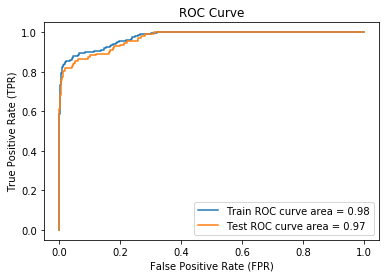

In [164]:
# roc curve for best estimator
plot_roc_curve(rs_model, X_train, X_test, y_train, y_test)

It looks pretty good. However, this result for our validation dataset. So, prediction in the final test set the important one.

## Part 3: Kaggle Competition

Now that we've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter.

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [165]:
mailout_test = pd.read_csv('Udacity_MAILOUT_052018_TEST.csv', sep=';')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [166]:
print(mailout_test.shape)
mailout_test.head()

(42833, 366)


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LETZTER_KAUF_BRANCHE,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,

In [175]:
def data_preprocessing_3(df, df_name = None):
    """
    Perform cleaning of demographics dataset by converting data types, 
    dropping missing values in columns and rows, re-encoding variables, 
    computing missing values, removing outliers, dropping correlated features and standardizing
    
    INPUT: 
        df: Demographic dataset (DataFrame)
        df_name: Name of dataframe (str)
    
    Output:
        df_clean: Cleaned dataset (DataFrame)
    """
    # Get copy of df
    df_clean = df.copy()
    
    # Drop columns from customer dataset, which are not found in azdias dataset 
    
    #Drop some columns with no description in attributes_values dataset
    cols_with_no_desc =['ALTERSKATEGORIE_FEIN','ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 
                     'ALTER_KIND4', 'ARBEIT','CJT_KATALOGNUTZER','CJT_TYP_1', 'CJT_TYP_2',
                     'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6','EXTSEL992', 
                     'FIRMENDICHTE', 'GEMEINDETYP', 'KBA13_ANTG1','KBA13_ANTG2', 'KBA13_ANTG3',
                        'KBA13_ANTG4', 'KBA13_BAUMAX',
        'KBA13_GBZ','KBA13_HHZ','KOMBIALTER', 'KONSUMZELLE', 'MOBI_RASTER', 'RT_KEIN_ANREIZ', 
        'RT_SCHNAEPPCHEN', 'RT_UEBERGROESSE', 'STRUKTURTYP', 'UMFELD_ALT', 'UMFELD_JUNG',
        'UNGLEICHENN_FLAG', 'VERDICHTUNGSRAUM', 'VHA', 'VHN', 'VK_DHT4A', 'VK_DISTANZ', 
        'VK_ZG11']

    df_clean.drop(columns=cols_with_no_desc,inplace=True)

    
    def get_unknown_repr(df):
        """Returns the representation (a list) of unknown values
        INPUT:
            df: dataframe of all attributes with unknown/missing codes
        OUTPUT:
            a dataframe with two columns, all attributes and the corresponding list of missing codes.
        """
        unknown_val = []
        for attrib in df['Attribute'].unique():
            val = df[df["Attribute"] == attrib]["Value"].astype(str).str.cat(sep=",").split(',')
            unknown_val.append(val)
    
        attributes_unknown_or_missing = pd.concat([pd.Series(df['Attribute'].unique()), pd.Series(unknown_val)], axis=1)
        attributes_unknown_or_missing.columns = ['attribute', 'missing_or_unknown']
 
        return attributes_unknown_or_missing



    def missing_to_nan(df):
        """A function to replace all unknown/missing values in dataframe df with np.nan
    
        INPUT: 
            df - Pandas dataframe
        OUTPUT:
            df - with all unknown values replaced with np.nan
        """
        unknown_df = get_unknown_repr(missing_or_unknown_dias)
        for item in range (len (unknown_df['missing_or_unknown'])): 
            column_name = unknown_df.iloc[item]['attribute'] #saving column name
            for i in range(0, len(unknown_df['missing_or_unknown'][item])):
                unknown_df['missing_or_unknown'][item][i] = int(unknown_df['missing_or_unknown'][item][i])
            df[column_name].replace (to_replace = unknown_df['missing_or_unknown'][item], value = np.NaN, regex = True, inplace = True)
            return df
    
    df_clean = missing_to_nan(df_clean)
    
     
    # Drop columns which involve >= 60% missing values
    df_clean.drop(columns= ['AGER_TYP','KK_KUNDENTYP'],inplace=True)
    
    
    #Engineer and re-encode features
    #convert datatypes in columns 18 and 19 to float
    #cols = ["CAMEO_DEUG_2015", "CAMEO_INTL_2015"]
    def fix_unknown(df):
        """
        Function to replace 'X', 'XX' in columns ['CAMEO_DEUG_2015', 'CAMEO_INTL_2015'] with np.nan 
    
        INPUT:
            df- dataframe in which the columns to be corrected exist.
        OUTPUT:
            df- dataframe with fixed column data types
        """
        cols = ["CAMEO_DEU_2015","CAMEO_DEUG_2015", "CAMEO_INTL_2015"]
    
        df[cols] = df[cols].replace({"X": np.nan, "XX": np.nan})
        df["CAMEO_DEUG_2015"] = df["CAMEO_DEUG_2015"].astype(float)
    
        return df

    df_clean = fix_unknown(df_clean)
    
    
    # Change dtype of EINGEFUEGT_AM column from object to datetime and extract only year
    df_clean["EINGEFUEGT_AM"]=pd.to_datetime(df_clean["EINGEFUEGT_AM"])
    df_clean["EINGEFUEGT_AM"]=pd.DatetimeIndex(df_clean["EINGEFUEGT_AM"]).year
      

   
    
   
    # getting dummy column for OST_WEST_KZ
    df_clean = df_clean.replace({'OST_WEST_KZ': {'W': 1, 'O': 0}})

    # Investigate "CAMEO_INTL_2015" and engineer two new variables.  
    # Wealth 
    def wealth(val):
        try:
    # In case value is NaN
            if pd.isnull(val):
                return np.nan
            else:
        # Return first digit
                return int(str(val)[0])
        except ValueError:
            return np.nan

# Life stage
    def lifestage(val):
        try:
    # In case value is NaN
            if pd.isnull(val):
                return np.nan
            else:
        # Return second digit
                return int(str(val)[1])
        except ValueError:
            return np.nan
        
        # Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
# Engineer wealth column
    df_clean['CAMEO_INTL_2015_WEALTH'] = df_clean['CAMEO_INTL_2015'].apply(wealth)

# Engineer life stage column
    df_clean['CAMEO_INTL_2015_LIFESTAGE'] = df_clean['CAMEO_INTL_2015'].apply(lifestage)


# Generation 
    generations = {0: [1, 2],  1: [3, 4], 2: [5, 6, 7], 3: [8, 9], 4: [10, 11, 12, 13], 5:[14, 15]} 

    def generation(val):
        try:
            for key, values in generations.items():
                if val in values:
                    return key
    # In case value is NaN
        except ValueError:
            return np.nan
    
# Movement 
    list_val = [1, 3, 5, 8, 10, 12, 14]

    def movement(val):
        try:
            if val in list_val:
                return 1
            else:
                return 0
    # In case value is NaN
        except ValueError:
            return np.nan
    
# Engineer generation column
    df_clean['PRAEGENDE_JUGENDJAHRE_GENERATION'] = df_clean['PRAEGENDE_JUGENDJAHRE'].apply(generation)

# Engineer movement column
    df_clean['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = df_clean['PRAEGENDE_JUGENDJAHRE'].apply(movement)

    #drop columns
    
    df_clean.drop(['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'],axis=1,inplace=True)

    
    # dropping columns that have too many features and the one with no description
    df_clean.drop(columns=["CAMEO_DEU_2015", "D19_LETZTER_KAUF_BRANCHE","LP_LEBENSPHASE_FEIN",'EINGEZOGENAM_HH_JAHR'], inplace=True)


    # Convert categorical column to encoded
    
    #df_clean=pd.get_dummies(df_clean, drop_first=True)
        
    # Impute missing values with mode value
    imputer = SimpleImputer(strategy='most_frequent')
    df_clean=pd.DataFrame(imputer.fit_transform(df_clean), columns = df_clean.columns)
    
    # Identify and remove 36 correlated features
    
    df_clean.drop(columns=['ANZ_STATISTISCHE_HAUSHALTE', 'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ONLINE_QUOTE_12',
                           'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM', 'D19_GESAMT_ONLINE_DATUM', 'D19_GESAMT_ONLINE_QUOTE_12',
                           'D19_KONSUMTYP_MAX', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_ANZ_24', 'D19_VERSAND_DATUM', 
                           'D19_VERSAND_ONLINE_DATUM', 'D19_VERSAND_ONLINE_QUOTE_12', 'KBA05_KRSAQUOT', 'KBA05_KRSHERST1',
                           'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_SEG2', 'KBA05_SEG5', 'KBA05_SEG6', 'KBA05_SEG9', 
                           'KBA05_ZUL4', 'KBA13_HALTER_40', 'KBA13_HALTER_55', 'KBA13_HALTER_66', 'KBA13_HERST_SONST',
                           'KBA13_KMH_250', 'KBA13_SITZE_5', 'KBA13_VW', 'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_GROB', 'LP_STATUS_GROB', 
                           'MIN_GEBAEUDEJAHR', 'ANREDE_KZ', 'CAMEO_INTL_2015_WEALTH', 'PRAEGENDE_JUGENDJAHRE_MOVEMENT'], inplace=True)
    
    

    # Standardization of dataset
    lnr=df_clean['LNR']
    scaler = StandardScaler()
    df_clean=pd.DataFrame(scaler.fit_transform(df_clean), columns = df_clean.columns)
    df_clean['LNR']=lnr
   
    # set index LNR column
    df_clean.set_index("LNR", inplace=True)



    return df_clean

In [176]:
mailout_test_clean=data_preprocessing_3(mailout_test)

In [183]:
print(mailout_test_clean.shape)
mailout_test_clean.head()

(42833, 286)


,AKT_DAT_KL,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,CJT_GESAMTTYP,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_OFFLINE_DATUM,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG3,KBA05_SEG4,KBA05_SEG7,KBA05_SEG8,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_6,KBA13_TOYOTA,KBA13_VORB_0,KBA13_VORB_1,KBA13_VORB_1_2,KBA13_VORB_2,KBA13_VORB_3,KKK,KONSUMNAEHE,LP_FAMILIE_FEIN,LP_STATUS_FEIN,MOBI_REGIO,NATIONALITAET_KZ,ONLINE_AFFINITAET,ORTSGR_KLS9,OST_WEST_KZ,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_GBZ,PLZ8_HHZ,REGIOTYP,RELAT_AB,RETOURTYP_BK_S,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT

In [184]:
# prediction by using previous model
y_test_pred=rs_model.predict(mailout_test_clean)

In [185]:
print(y_test_pred.shape)
y_test_pred

(42833,)


array([0.03674643, 0.02156349, 0.0030406 , ..., 0.00882244, 0.04047004,
       0.02360124], dtype=float32)

In [198]:
# create dataframe by using LNR column and predictions
kaggle_submission_df = pd.DataFrame(columns=['LNR','RESPONSE'])
kaggle_submission_df['LNR'] =mailout_test_clean.index.astype(int)
kaggle_submission_df['RESPONSE'] = y_test_pred
kaggle_submission_df.head()

,LNR,RESPONSE
0,1754,0.036746
1,1770,0.021563
2,1465,0.003041
3,1470,0.003866
4,1478,0.005980


In [200]:
print(kaggle_submission_df.shape)

(42833, 2)


In [199]:
kaggle_submission_df.to_csv('kaggle_submission.csv',index=False)